In [59]:
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from pca_plot import *

In [43]:
t2tchm13 = pd.read_csv('../data/t2tchm13_genes_pivot.bed', '\t', header=None)
anotation = pd.read_csv('../data/SGDP_anotation.csv', sep=',', encoding='latin-1')
names_t2t = pd.read_table("../data/t2tchm13_all_pivot_names.bed", header=None)
names_t2t = names_t2t[0]
t2tchm13.columns = names_t2t

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_31187/3236940915.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  t2tchm13 = pd.read_csv('../data/t2tchm13_genes_pivot.bed', '\t', header=None)


In [3]:
t2tchm13 = pd.read_csv('../data/t2tchm13_genes_pivot.bed', '\t', header=None)
liftovered = pd.read_csv('../cnvs_vst_chm13togh19_genes.bed', sep='\t', header=None)
liftovered 

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_31187/2240860230.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  t2tchm13 = pd.read_csv('../data/t2tchm13_genes_pivot.bed', '\t', header=None)


0         1         2     3     4     5     6     7     8     9    \
0      chr1    611215    621099  12.0  15.0  11.0  14.0  15.0  12.0  11.0   
1      chr1   1028488   1047364   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
2      chr1   1120435   1132115   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
3      chr1   1342800   1355005   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
4      chr1   1542553   1550949   2.0   2.0   1.0   1.0   2.0   1.0   2.0   
...     ...       ...       ...   ...   ...   ...   ...   ...   ...   ...   
10489  chrY  27770341  27792300   5.0   0.0   0.0   4.0   4.0   3.0   2.0   
10490  chrY  28112216  28122056   4.0   0.0   0.0   3.0   3.0   4.0   2.0   
10491  chrY  59233378  59253049   2.0   2.0   2.0   2.0   2.0   2.0   1.0   
10492  chrY  59253049  59270996   2.0   2.0   2.0   2.0   2.0   2.0   1.0   
10493  chrY  59318910  59330575   2.0   2.0   2.0   2.0   2.0   2.0   1.0   

       ...   262   263   264   265   266   267   268   269   270   271  
0      ...  15.0  13.0  14.0  14.0  14.0  12.0  15.0  11.0  13.0  16.0  
1      ...   1.0   2.0   2.0   2.0   2.0   2.0   1.0   2.0   1.0   1.0  
2      ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0  
3      ...   2.0   1.0   2.0   2.0   2.0   3.0   2.0   2.0   2.0   2.0  
4      ...   1.0   2.0   2.0   2.0   1.0   1.0   1.0   2.0   2.0   2.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
10489  ...   0.0   4.0   0.0   4.0   4.0   0.0   3.0   4.0   0.0   4.0  
10490  ...   0.0   3.0   0.0   4.0   4.0   0.0   3.0   3.0   0.0   4.0  
10491  ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0  
10492  ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0  
10493  ...   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0  

[10494 rows x 272 columns]

In [4]:
hg19 = pd.read_csv("../data/cnvator_data_sudmant_overlapped.csv")


hg19 = hg19.pivot_table(index=["Chr", "Start", "End"], 
                    columns='Sample_ID', 
                    values='RD').reset_index()


hg19['Chr'] = 'chr' + hg19['Chr'].astype(str)
hg19

Sample_ID   Chr      Start        End  LP6005441-DNA_A01  LP6005441-DNA_A03  \
0          chr1     228416     267160           2.089230           1.098060   
1          chr1     471226     471326           0.187758           0.795844   
2          chr1     712534     763301           1.594500           2.104280   
3          chr1     763301     763482                NaN                NaN   
4          chr1     769541     787076                NaN                NaN   
...         ...        ...        ...                ...                ...   
8645       chrX  154776475  154788811                NaN                NaN   
8646       chrX  154788811  154840186                NaN           0.563718   
8647       chrX  154789310  154826421                NaN           0.563718   
8648       chrX  154892549  154908191                NaN                NaN   
8649       chrX  154908191  154948137                NaN           0.532579   

Sample_ID  LP6005441-DNA_A04  LP6005441-DNA_A05  LP6005441-DNA_A06  \
0                   1.088959           1.945120           1.743018   
1                   0.089448           0.000136           0.002116   
2                        NaN                NaN                NaN   
3                        NaN                NaN                NaN   
4                        NaN                NaN                NaN   
...                      ...                ...                ...   
8645                     NaN                NaN                NaN   
8646                0.062768           0.118046           0.097334   
8647                0.062768           0.118046           0.097334   
8648                     NaN                NaN                NaN   
8649                     NaN                NaN                NaN   

Sample_ID  LP6005441-DNA_A08  LP6005441-DNA_A09  ...  SS6004471  SS6004472  \
0                   1.263408           1.821840  ...   1.991660   0.782568   
1                   0.001990           0.314463  ...   0.000102   0.076837   
2                        NaN                NaN  ...   2.375680   1.975707   
3                        NaN                NaN  ...        NaN        NaN   
4                        NaN                NaN  ...        NaN        NaN   
...                      ...                ...  ...        ...        ...   
8645                0.199081                NaN  ...        NaN        NaN   
8646                     NaN           0.096356  ...   0.014918        NaN   
8647                     NaN           0.096356  ...   0.014918        NaN   
8648                     NaN                NaN  ...        NaN        NaN   
8649                     NaN                NaN  ...        NaN   1.053203   

Sample_ID  SS6004473  SS6004474  SS6004475  SS6004476  SS6004477  SS6004478  \
0           1.862735   0.739641   1.551208   2.087340   0.971431   1.032574   
1           0.038285   0.003255   0.063427   0.000687   0.289939   0.088507   
2           2.407905   2.219840   2.307095   2.417060   2.417685   2.628050   
3                NaN        NaN        NaN        NaN        NaN        NaN   
4                NaN        NaN        NaN        NaN        NaN        NaN   
...              ...        ...        ...        ...        ...        ...   
8645             NaN        NaN   2.199430        NaN        NaN        NaN   
8646        0.120846        NaN   2.199430   0.167378        NaN        NaN   
8647        0.120846        NaN   2.199430   0.167378        NaN        NaN   
8648             NaN        NaN   2.199430        NaN        NaN        NaN   
8649             NaN   0.001702   1.048522        NaN   0.009885   0.001413   

Sample_ID  SS6004479  SS6004480  
0           1.820703   1.947480  
1           0.000452   0.000258  
2                NaN        NaN  
3                NaN        NaN  
4                NaN        NaN  
...              ...        ...  
8645             NaN        NaN  
8646        0.076623   0.315173  
8647        0.0766

In [5]:
## Getting CNVs from T2T that are in HG19 for at least 1 bp 
overlapped = []
for i in hg19.to_numpy():
    for j in liftovered.to_numpy():
        if i[0]==j[0]:
            if (i[1] <= j[1] <= i[2]) or (i[1] <= j[2] <= i[2]):
                overlapped.append(j)



In [6]:
t2thg19 = pd.DataFrame(overlapped)
t2thg19.columns = names_t2t
t2thg19

0     chr      START        END  LP6005441-DNA_A01  LP6005441-DNA_A03  \
0    chr1    6615578    6624117                2.0                2.0   
1    chr1    9854826    9867380                2.0                1.0   
2    chr1   10068173   10080921                2.0                2.0   
3    chr1   10627435   10642737                1.0                1.0   
4    chr1   10642737   10651256                2.0                2.0   
..    ...        ...        ...                ...                ...   
611  chrX  154689455  154703989                2.0                4.0   
612  chrX  154689455  154703989                2.0                4.0   
613  chrX  154907873  154926117                1.0                2.0   
614  chrX  154907873  154926117                1.0                2.0   
615  chrX  154929510  154973743                2.0                2.0   

0    LP6005441-DNA_A04  LP6005441-DNA_A05  LP6005441-DNA_A06  \
0                  2.0                2.0                2.0   
1                  2.0                2.0                2.0   
2                  2.0                2.0                2.0   
3                  1.0                2.0                1.0   
4                  2.0                2.0                2.0   
..                 ...                ...                ...   
611                5.0                2.0                2.0   
612                5.0                2.0                2.0   
613                2.0                1.0                1.0   
614                2.0                1.0                1.0   
615                2.0                2.0                2.0   

0    LP6005441-DNA_A08  LP6005441-DNA_A09  ...  LP6005677-DNA_D03  \
0                  2.0                2.0  ...                2.0   
1                  2.0                2.0  ...                2.0   
2                  1.0                2.0  ...                2.0   
3                  1.0                2.0  ...                1.0   
4                  2.0                2.0  ...                2.0   
..                 ...                ...  ...                ...   
611                2.0                2.0  ...                4.0   
612                2.0                2.0  ...                4.0   
613                1.0                1.0  ...                2.0   
614                1.0                1.0  ...                2.0   
615                1.0                1.0  ...                2.0   

0    LP6005677-DNA_E01  LP6005677-DNA_F01  LP6005677-DNA_G01  \
0                  2.0                2.0                2.0   
1                  1.0                2.0                2.0   
2                  2.0                2.0                2.0   
3                  1.0                1.0                1.0   
4                  2.0                2.0                2.0   
..                 ...                ...                ...   
611                2.0                4.0                2.0   
612                2.0                4.0                2.0   
613                1.0                2.0                1.0   
614                1.0                2.0                1.0   
615                2.0                2.0                2.0   

0    LP6007068-DNA_A01  LP6007069-DNA_A01  SS6004471  SS6004477  SS6004478  \
0                  2.0                2.0        2.0        2.0        2.0   
1                  1.0                2.0        2.0        2.0        1.0   
2                  2.0                2.0        2.0        1.0        2.0   
3                  1.0                1.0        1.0        1.0        1.0   
4                  2.0                2.0        2.0        2.0        2.0   
..                 ...                ...        ...        ...        ...   
611                2.0                4.0        2.0        3.0        4.0   
612                2.0                4.0        2.0        3.0        4.0   
613                1.0                2.0        1.0  

In [65]:
t2thg19[t2thg19['chr'] =='chr8']

0     chr      START        END  LP6005441-DNA_A01  LP6005441-DNA_A03  \
503  chr8   11651489   11659585                2.0                2.0   
504  chr8   12829218   12837504                1.0                1.0   
505  chr8   14030528   14042489                2.0                2.0   
506  chr8   14051140   14061868                2.0                2.0   
507  chr8   14067277   14078801                2.0                2.0   
508  chr8   15409309   15419615                2.0                2.0   
509  chr8   15987481   15995922                1.0                2.0   
510  chr8   18563854   18572931                2.0                2.0   
511  chr8   22176748   22205412                2.0                2.0   
512  chr8   23007543   23018276                2.0                3.0   
513  chr8   23064693   23075766                6.0                6.0   
514  chr8   23082881   23104282                2.0                2.0   
515  chr8   25351014   25360282                2.0                2.0   
516  chr8   32353419   32364580                2.0                2.0   
517  chr8   38975726   38993953                2.0                2.0   
518  chr8   39028102   39043712                2.0                2.0   
519  chr8   39045203   39068669                2.0                2.0   
520  chr8   39068669   39079331                2.0                2.0   
521  chr8   39093277   39103767                2.0                2.0   
522  chr8   39103767   39113932                2.0                2.0   
523  chr8   48438757   48447866                2.0                2.0   
524  chr8   62384034   62393335                2.0                2.0   
525  chr8   63848730   63859146                2.0                2.0   
526  chr8   75321309   75333822                2.0                2.0   
527  chr8   92158103   92169685                2.0                2.0   
528  chr8   98677892   98686689                2.0                2.0   
529  chr8   98742083   98750743                2.0                2.0   
530  chr8  104695053  104709217                2.0                2.0   
531  chr8  104709217  104722483                2.0                2.0   
532  chr8  104905259  104914858                2.0                2.0   
533  chr8  113792078  113801437                2.0                2.0   
534  chr8  117830129  117840509                2.0                2.0   
535  chr8  124898016  124916605                2.0                2.0   
536  chr8  146279083  146292692                2.0                2.0   

0    LP6005441-DNA_A04  LP6005441-DNA_A05  LP6005441-DNA_A06  \
503                2.0                2.0                2.0   
504                2.0                1.0                1.0   
505                2.0                2.0                2.0   
506                2.0                2.0                2.0   
507                2.0                1.0                2.0   
508                2.0                2.0                2.0   
509                2.0                2.0                2.0   
510                2.0                2.0                2.0   
511                2.0                2.0                2.0   
512                2.0                2.0                2.0   
513                6.0                7.0                6.0   
514                2.0                2.0                2.0   
515                2.0                2.0                2.0   
516                2.0                2.0                2.0   
517                2.0                2.0                2.0   
518                2.0                2.0                2.0   
519                2.0                2.0                2.0   
520                2.0                2.0                2.0   
521                2.0                2.0                2.0   
522                2.0                2.0                2.0   
523                2.0                2.0                2.0   
524                2.0              

In [52]:
#t2thg19
feautures = pd.DataFrame()
feautures['Sample'] = anotation['3-Illumina_ID']
feautures['Region'] = anotation['10-Region']
feautures['Population'] = anotation['8-Population_ID']

features = feautures.set_index('Sample')#
features = features.merge(t2thg19.T, left_index=True, right_index=True, how='inner')
features = features.iloc[:,0:2]
features = features.reset_index()
features = features.sort_values(by='index')
features = features.set_index('index')
features



Region    Population
index                                       
LP6005441-DNA_A01  WestEurasia        Adygei
LP6005441-DNA_A03      Oceania  Bougainville
LP6005441-DNA_A04      America       Piapoco
LP6005441-DNA_A05  WestEurasia        French
LP6005441-DNA_A06  WestEurasia       Bergamo
...                        ...           ...
LP6007069-DNA_A01  WestEurasia         Crete
SS6004471               Africa         Mbuti
SS6004477              Oceania    Australian
SS6004478              Oceania    Australian
SS6004480               Africa         Dinka

[269 rows x 2 columns]

In [53]:
from scipy import stats
#final_cnv = final_cnv.iloc[new]
final = t2thg19.iloc[:,3:284]
counts = final
counts = counts.fillna(2)

#counts = counts[counts.columns.intersection(counts_a.columns)]

#counts = counts.drop(columns=['LP6005592-DNA_G03',
#                     'LP6005443-DNA_E10',
#                     'LP6005442-DNA_E04'])

counts = counts.T
counts = counts.sort_index()
counts

0    1    2    3    4    5    6    7    8    9    ...  606  \
0                                                                    ...        
LP6005441-DNA_A01  2.0  2.0  2.0  1.0  2.0  2.0  2.0  1.0  2.0  1.0  ...  1.0   
LP6005441-DNA_A03  2.0  1.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  1.0  ...  2.0   
LP6005441-DNA_A04  2.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0   
LP6005441-DNA_A05  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  1.0   
LP6005441-DNA_A06  2.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  1.0   
...                ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
LP6007069-DNA_A01  2.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0   
SS6004471          2.0  2.0  2.0  1.0  2.0  2.0  1.0  2.0  2.0  2.0  ...  1.0   
SS6004477          2.0  2.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  1.0  ...  1.0   
SS6004478          2.0  1.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  1.0  ...  2.0   
SS6004480          2.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  1.0   

                   607  608  609  610  611  612  613  614  615  
0                                                               
LP6005441-DNA_A01  1.0  1.0  1.0  1.0  2.0  2.0  1.0  1.0  2.0  
LP6005441-DNA_A03  2.0  2.0  2.0  2.0  4.0  4.0  2.0  2.0  2.0  
LP6005441-DNA_A04  2.0  2.0  2.0  2.0  5.0  5.0  2.0  2.0  2.0  
LP6005441-DNA_A05  1.0  1.0  1.0  1.0  2.0  2.0  1.0  1.0  2.0  
LP6005441-DNA_A06  1.0  1.0  1.0  1.0  2.0  2.0  1.0  1.0  2.0  
...                ...  ...  ...  ...  ...  ...  ...  ...  ...  
LP6007069-DNA_A01  2.0  2.0  2.0  2.0  4.0  4.0  2.0  2.0  1.0  
SS6004471          1.0  1.0  1.0  1.0  2.0  2.0  1.0  1.0  1.0  
SS6004477          1.0  1.0  1.0  1.0  3.0  3.0  1.0  1.0  2.0  
SS6004478          2.0  2.0  2.0  2.0  4.0  4.0  2.0  2.0  2.0  
SS6004480          1.0  1.0  1.0  1.0  2.0  2.0  1.0  1.0  2.0  

[269 rows x 616 columns]

In [62]:
#PCA

#x = StandardScaler().fit_transform(counts)
pca = PCA(n_components=10)
pca_results = pca.fit_transform(counts)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2', 'component_3', 'component_4',
                                  'component_5',
                                  'component_6',
                                  'component_7',
                                  'component_8',
                                  'component_9',
                                   'component_10'
                                  ],
                          index=features.index)




df_pca = features.merge(df_pca, left_index=True, right_index=True)
df_pca

Region    Population  component_1  component_2  \
index                                                                    
LP6005441-DNA_A01  WestEurasia        Adygei    -9.983520     1.531600   
LP6005441-DNA_A03      Oceania  Bougainville    13.365127     0.926745   
LP6005441-DNA_A04      America       Piapoco     7.325593     4.369959   
LP6005441-DNA_A05  WestEurasia        French    -4.311920    -0.382857   
LP6005441-DNA_A06  WestEurasia       Bergamo   -15.432587    -2.585262   
...                        ...           ...          ...          ...   
LP6007069-DNA_A01  WestEurasia         Crete     9.226627    -3.554779   
SS6004471               Africa         Mbuti    -8.191776    -8.401595   
SS6004477              Oceania    Australian    -5.124074    -3.263558   
SS6004478              Oceania    Australian    30.410824    -4.407474   
SS6004480               Africa         Dinka    -9.720847    -5.119592   

                   component_3  component_4  component_5  component_6  \
index                                                                   
LP6005441-DNA_A01     0.842843     0.355192     0.714020    -0.024882   
LP6005441-DNA_A03     0.600610    -1.671640    -0.559414    -0.058458   
LP6005441-DNA_A04    -0.949433     2.773863    -1.693030    -1.107792   
LP6005441-DNA_A05    -0.188594    -0.090255     3.094323     0.382252   
LP6005441-DNA_A06    -3.497421     2.866853     1.058184    -1.375349   
...                        ...          ...          ...          ...   
LP6007069-DNA_A01    -0.336183    -0.209332    -1.239032    -5.977849   
SS6004471            -0.120630     6.945234     0.498536    -0.093958   
SS6004477            -2.875956     1.511479     2.438357    -4.040637   
SS6004478            -1.642140     0.511231     3.806679    -4.616285   
SS6004480            -3.120480     1.963029     1.913035    -2.828444   

                   component_7  component_8  component_9  component_10  
index                                                                   
LP6005441-DNA_A01    -0.437438    -0.845000    -0.779579     -1.617032  
LP6005441-DNA_A03    -2.022323     0.850817    -0.531749      0.404324  
LP6005441-DNA_A04    -1.197487    -0.384998    -1.986105     -1.105208  
LP6005441-DNA_A05    -1.712330    -0.378148     1.514262     -0.501079  
LP6005441-DNA_A06    -1.998763     1.074218     0.803423     -0.496170  
...                        ...          ...          ...           ...  
LP6007069-DNA_A01     1.936232    -0.391393    -0.473662     -0.028996  
SS6004471             5.977574    -3.114012    -0.123196     -1.512811  
SS6004477             2.345519    -1.439699    -2.015926      0.609973  
SS6004478             5.179577    -0.925624    -2.099242      1.143304  
SS6004480            -0.622661    -0.513036    -2.961385      1.411072  

[269 rows x 12 columns]

In [63]:
pca.explained_variance_ratio_

array([0.66278619, 0.08760449, 0.02953661, 0.0180011 , 0.01498056,
       0.01206148, 0.01060704, 0.00942093, 0.00766748, 0.00602682])

               Population  component_1  component_2  component_3  component_4  \
Region                                                                          
WestEurasia        Adygei    -9.983520     1.531600     0.842843     0.355192   
Oceania      Bougainville    13.365127     0.926745     0.600610    -1.671640   
America           Piapoco     7.325593     4.369959    -0.949433     2.773863   
WestEurasia        French    -4.311920    -0.382857    -0.188594    -0.090255   
WestEurasia       Bergamo   -15.432587    -2.585262    -3.497421     2.866853   
...                   ...          ...          ...          ...          ...   
WestEurasia         Crete     9.226627    -3.554779    -0.336183    -0.209332   
Africa              Mbuti    -8.191776    -8.401595    -0.120630     6.945234   
Oceania        Australian    -5.124074    -3.263558    -2.875956     1.511479   
Oceania        Australian    30.410824    -4.407474    -1.642140     0.511231   
Africa              Dinka   

/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = matplotlib.pyplot.figure(


               Population  component_1  component_2  component_3  component_4  \
Region                                                                          
WestEurasia        Adygei    -9.983520     1.531600     0.842843     0.355192   
Oceania      Bougainville    13.365127     0.926745     0.600610    -1.671640   
America           Piapoco     7.325593     4.369959    -0.949433     2.773863   
WestEurasia        French    -4.311920    -0.382857    -0.188594    -0.090255   
WestEurasia       Bergamo   -15.432587    -2.585262    -3.497421     2.866853   
...                   ...          ...          ...          ...          ...   
WestEurasia         Crete     9.226627    -3.554779    -0.336183    -0.209332   
Africa              Mbuti    -8.191776    -8.401595    -0.120630     6.945234   
Oceania        Australian    -5.124074    -3.263558    -2.875956     1.511479   
Oceania        Australian    30.410824    -4.407474    -1.642140     0.511231   
Africa              Dinka   

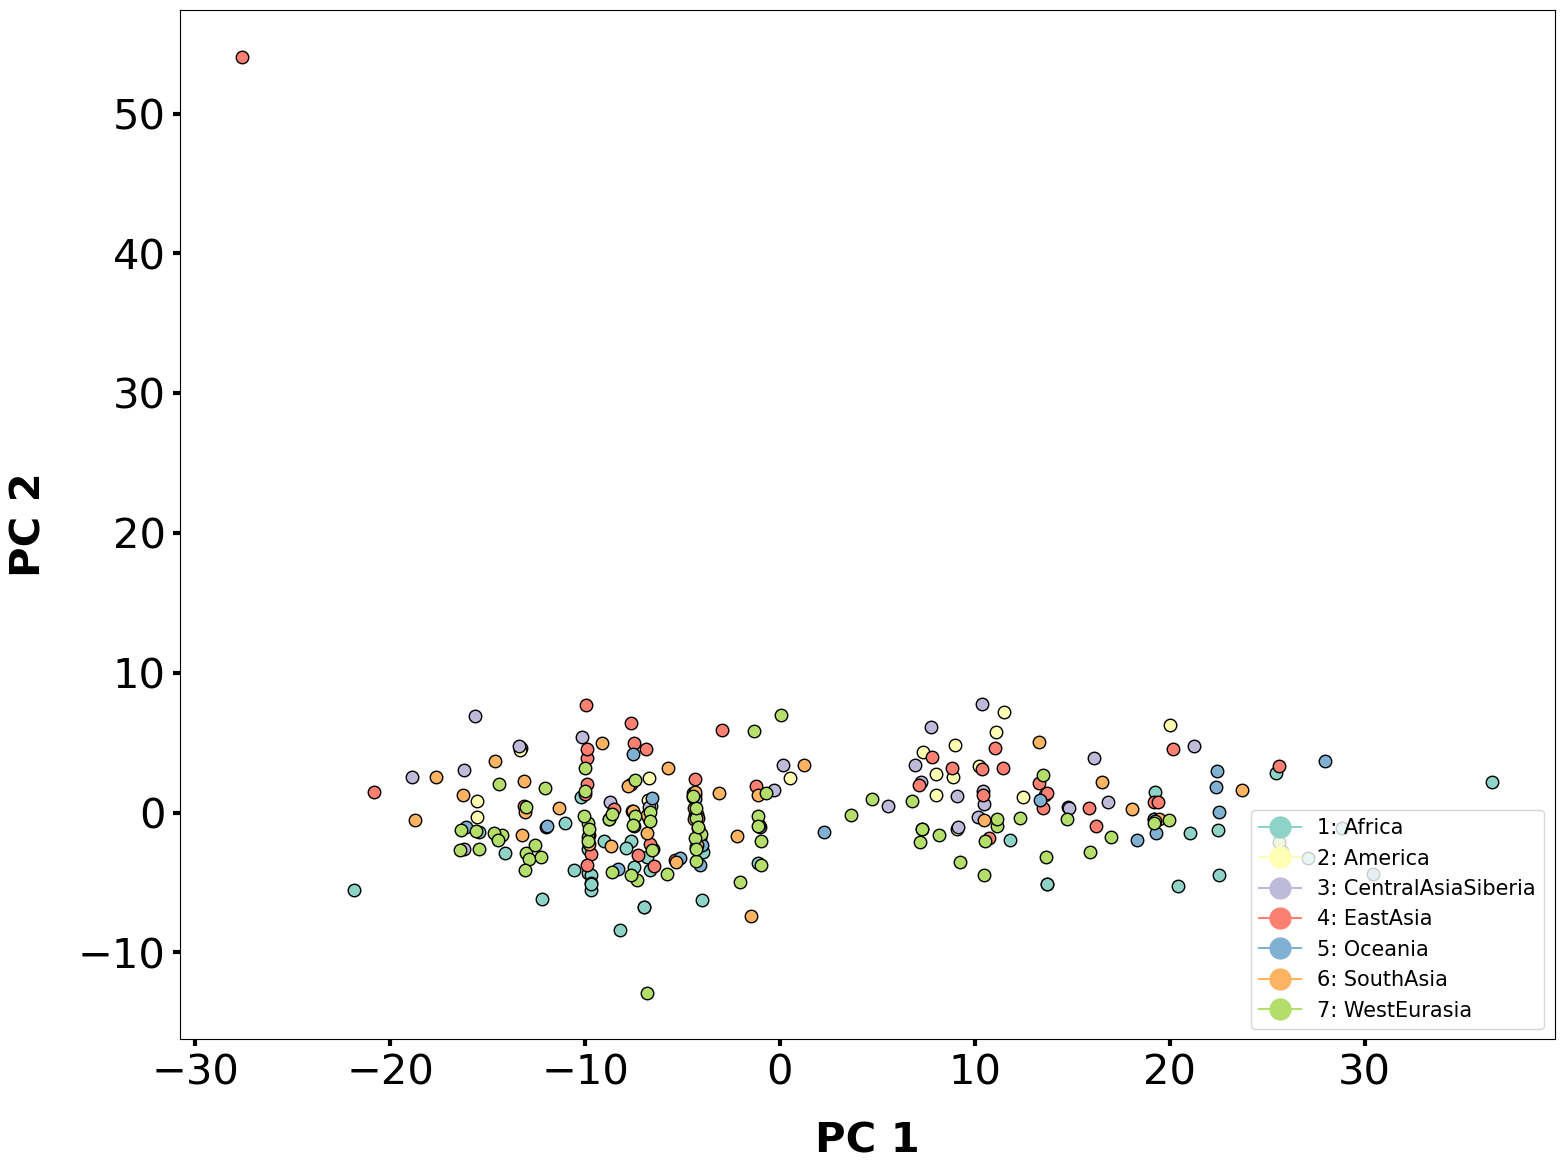

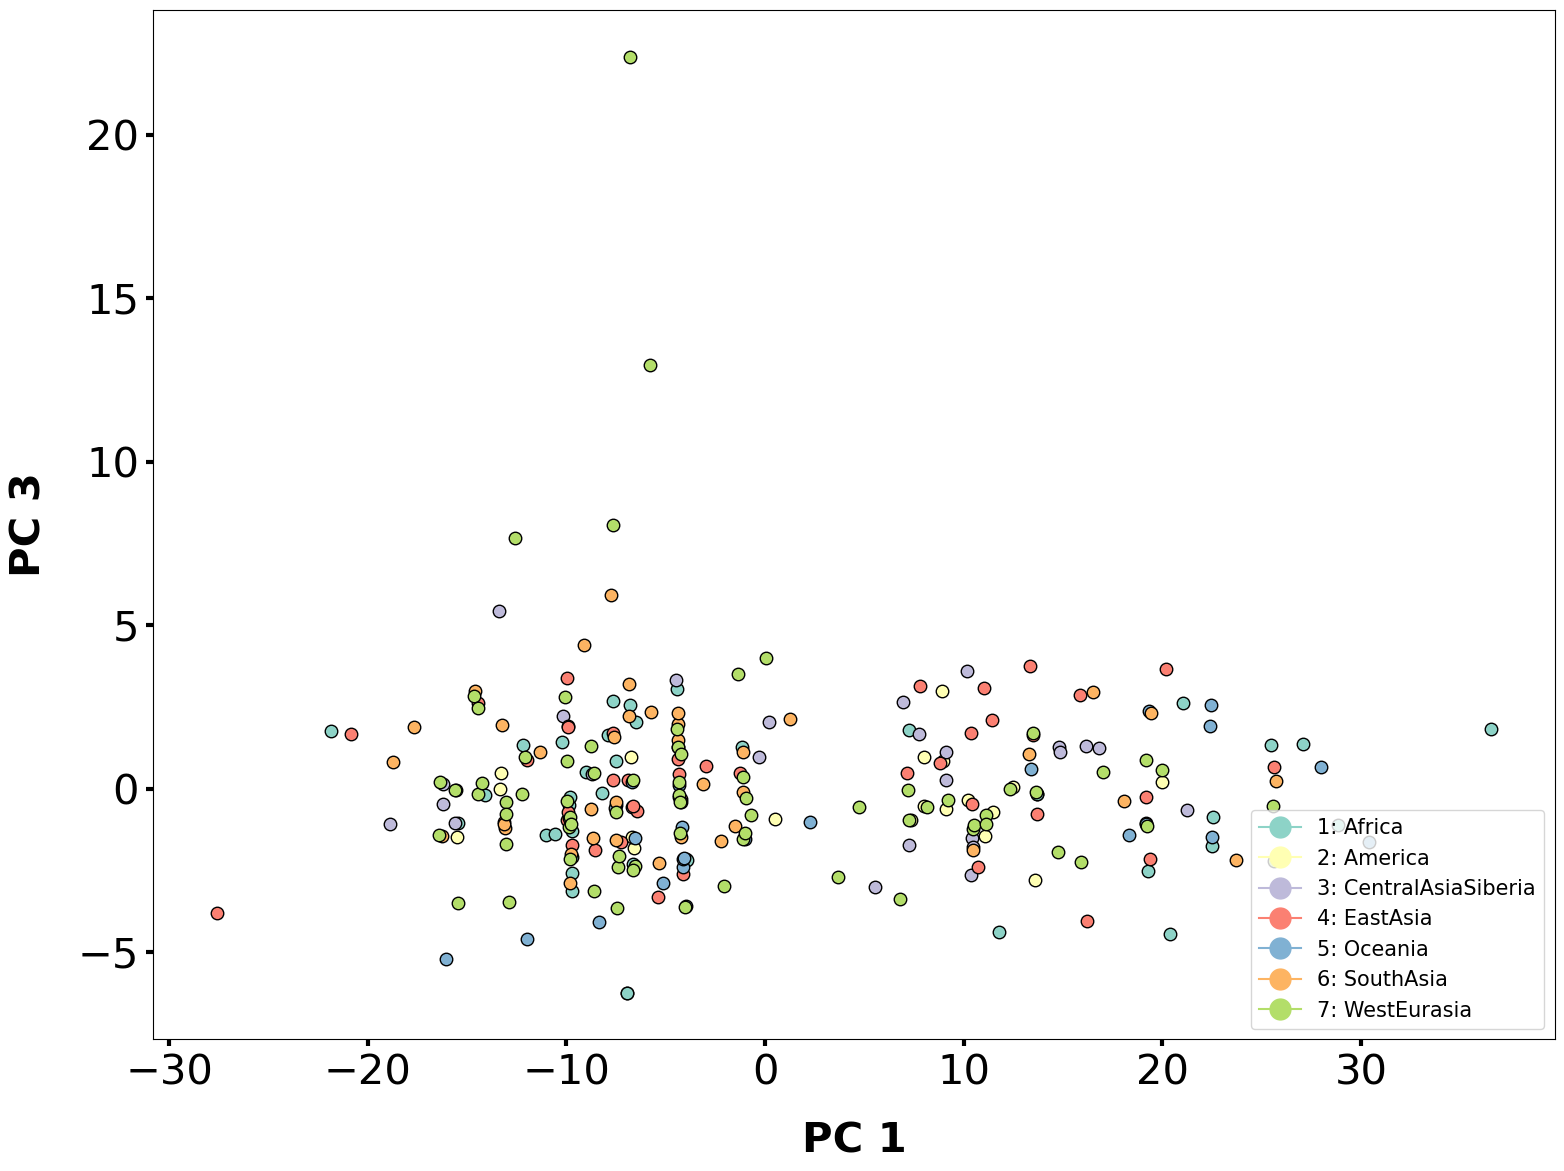

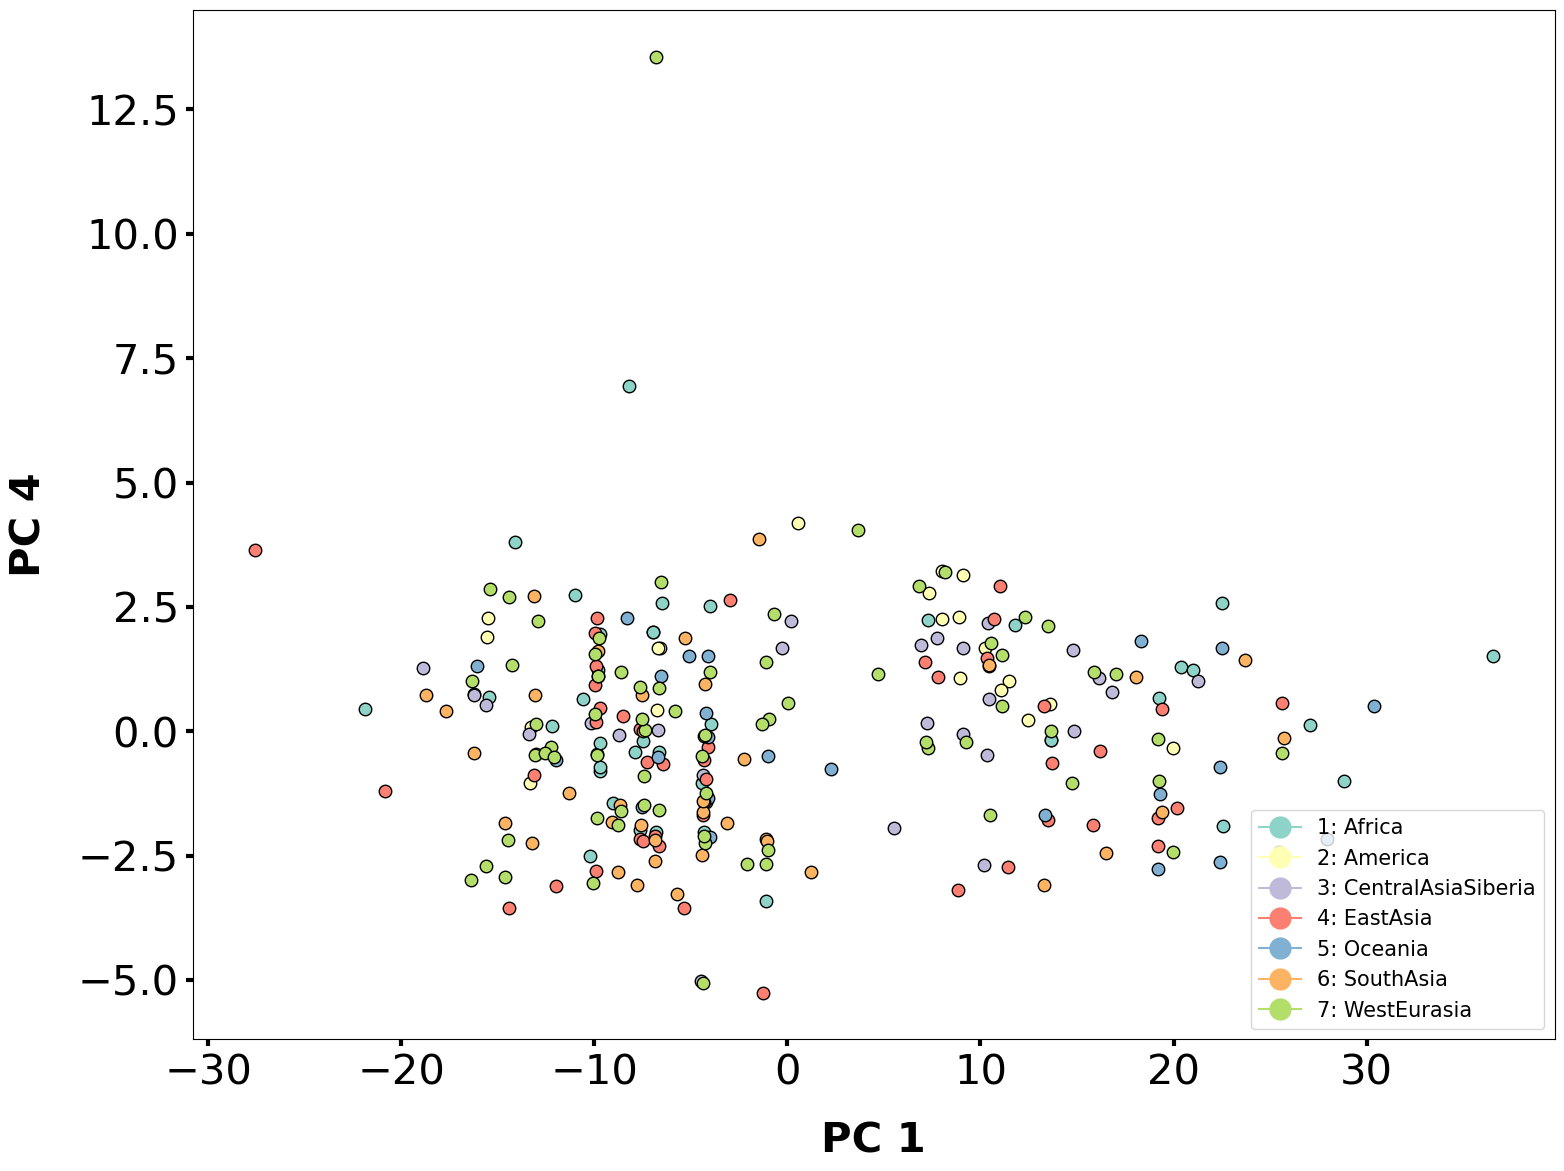

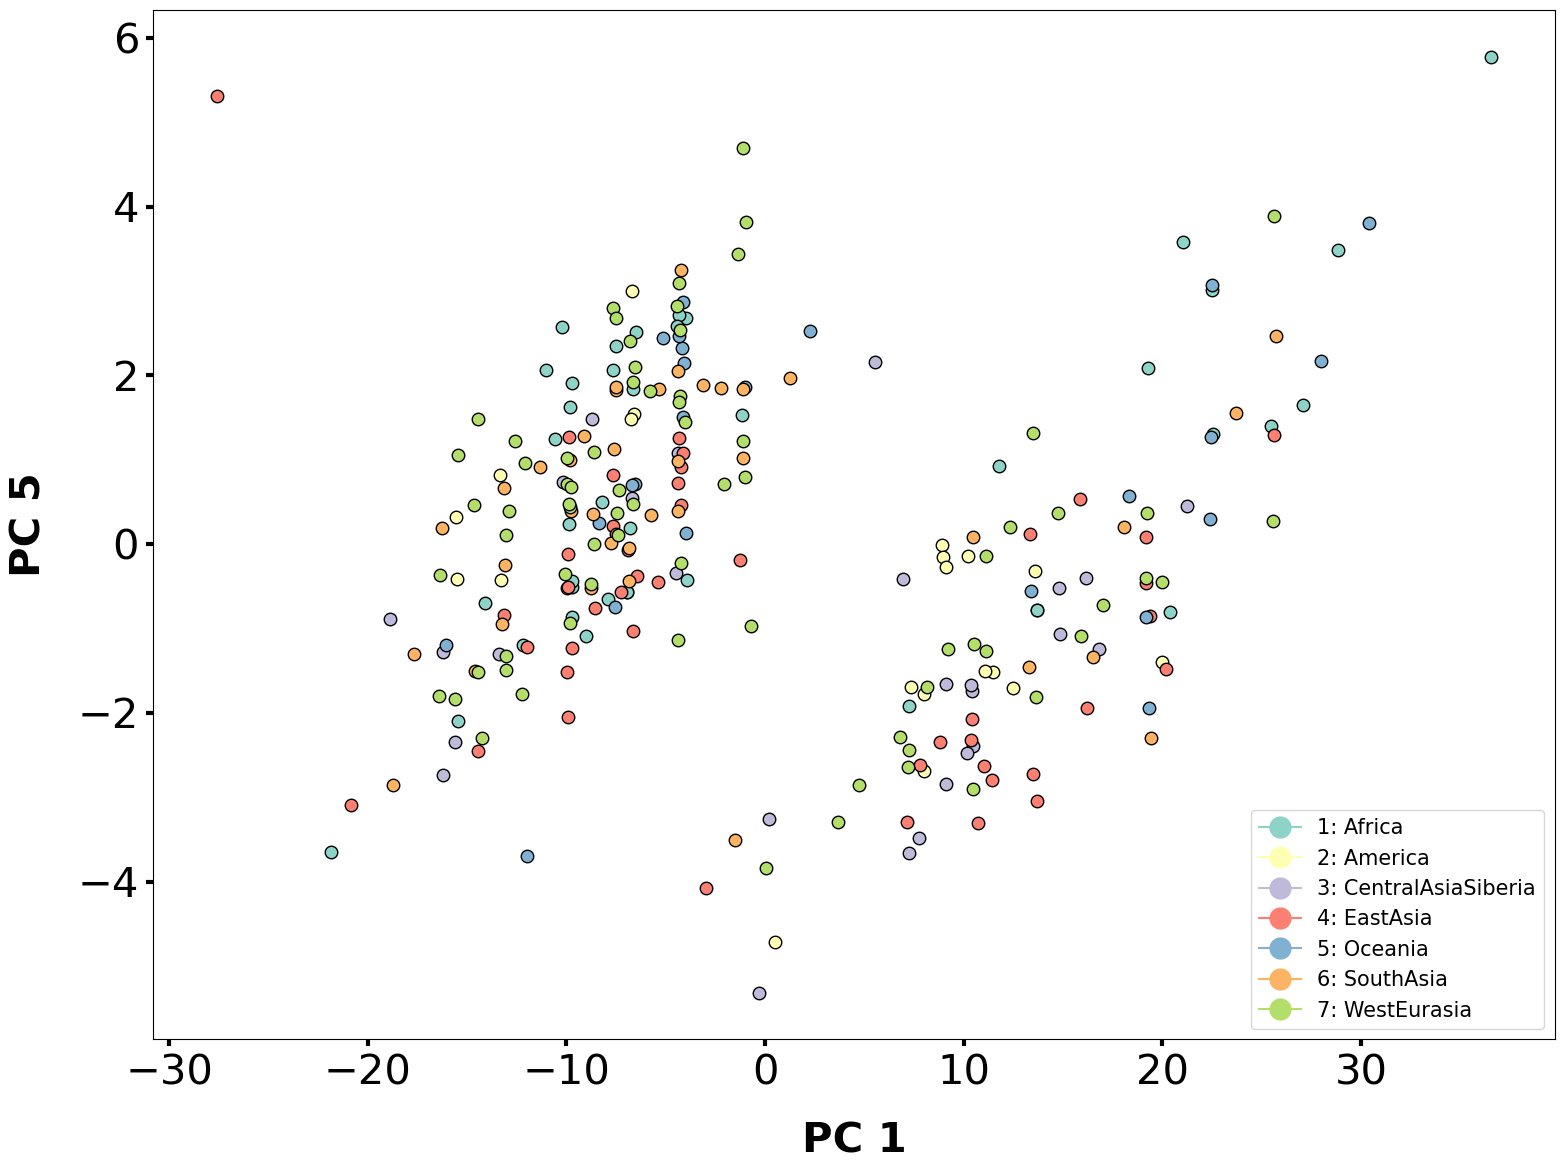

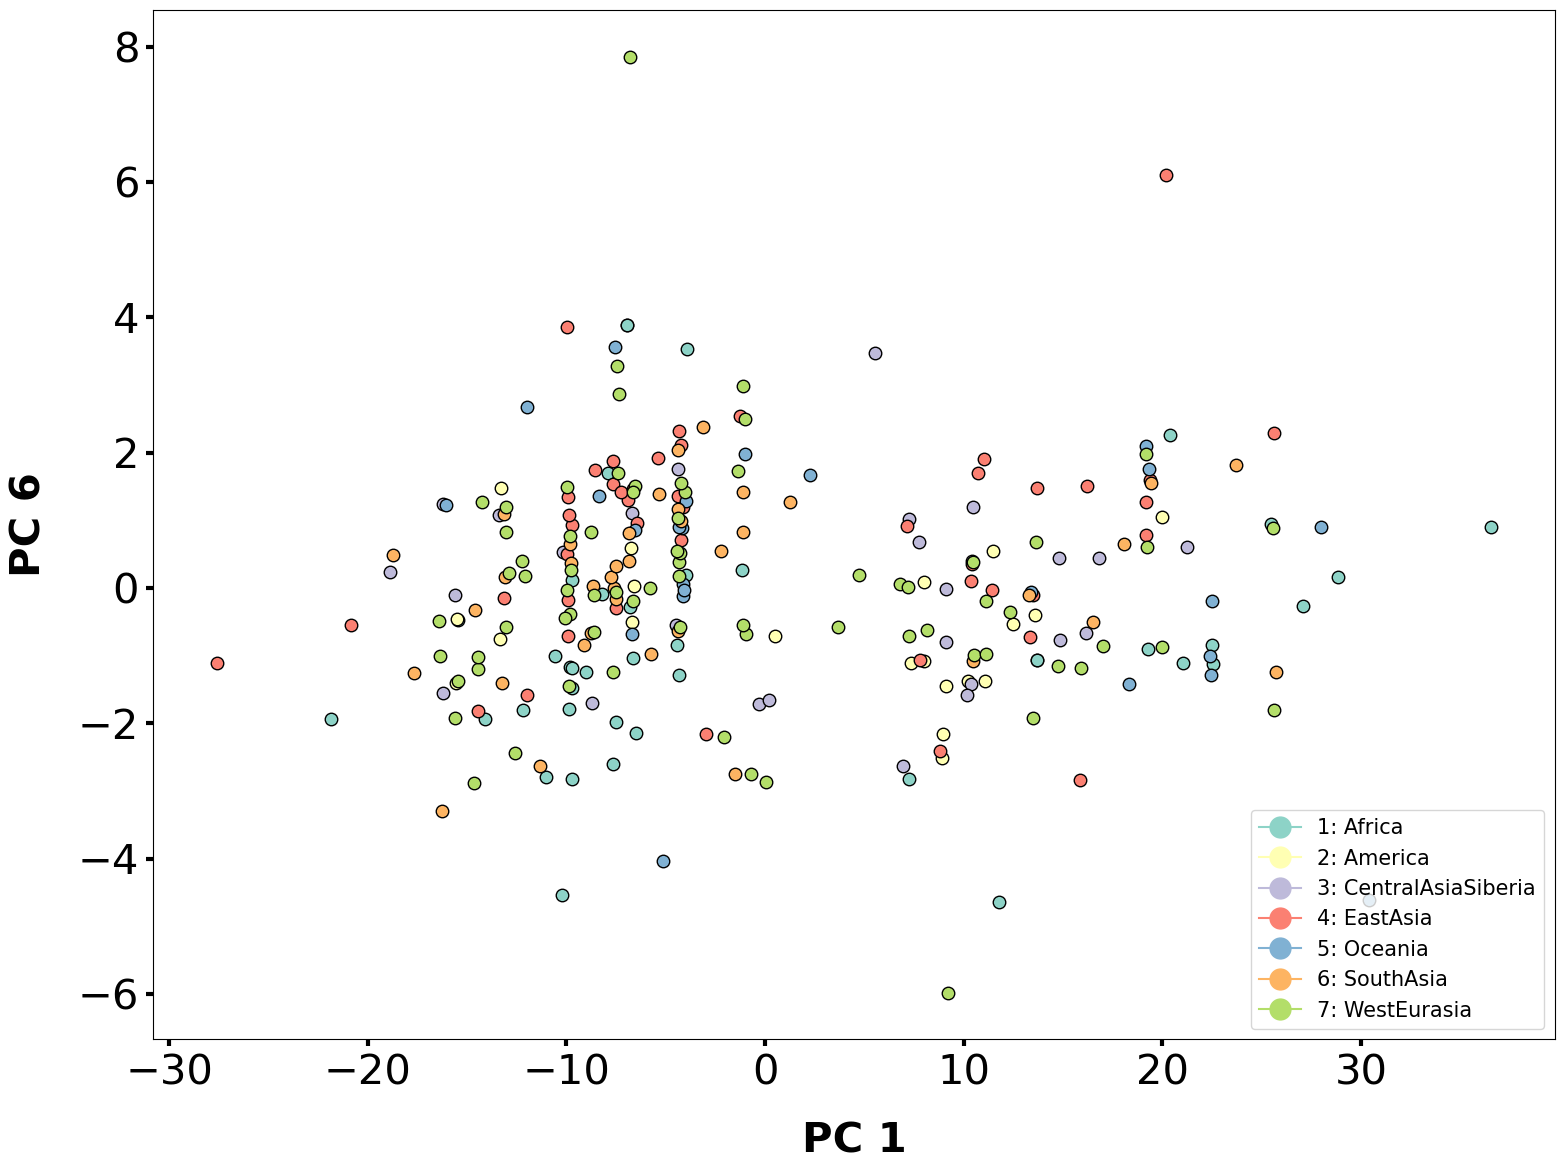

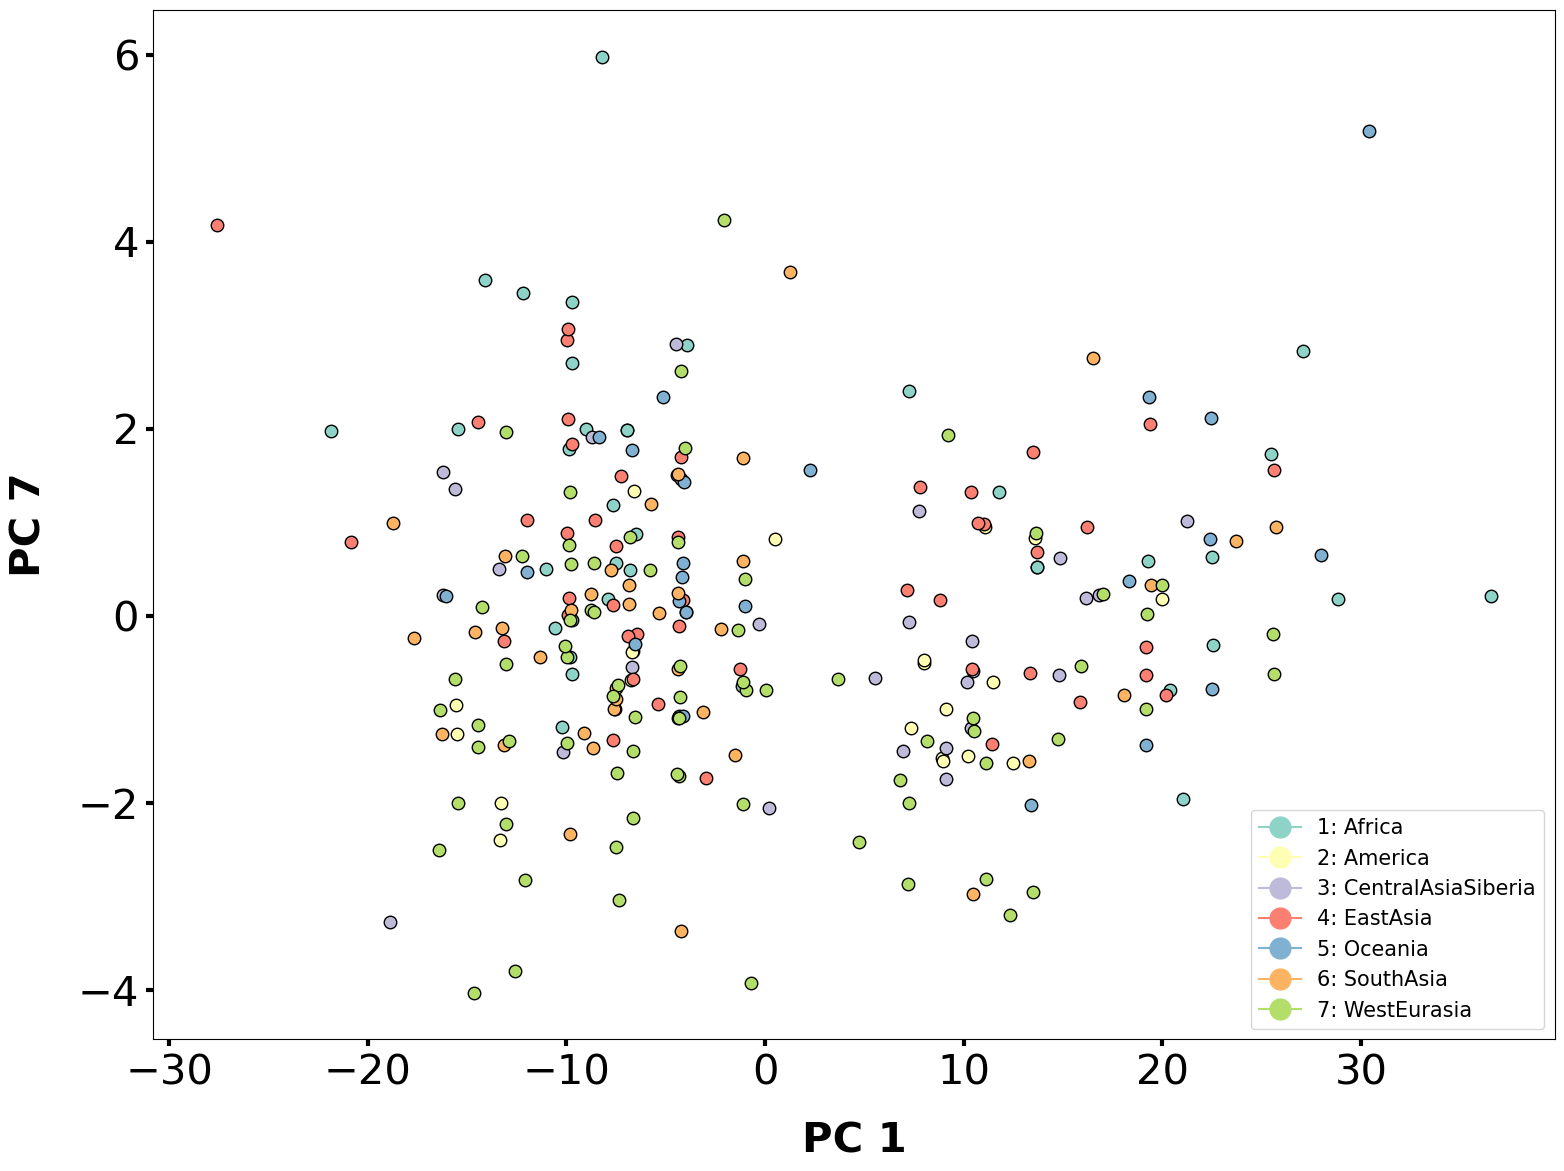

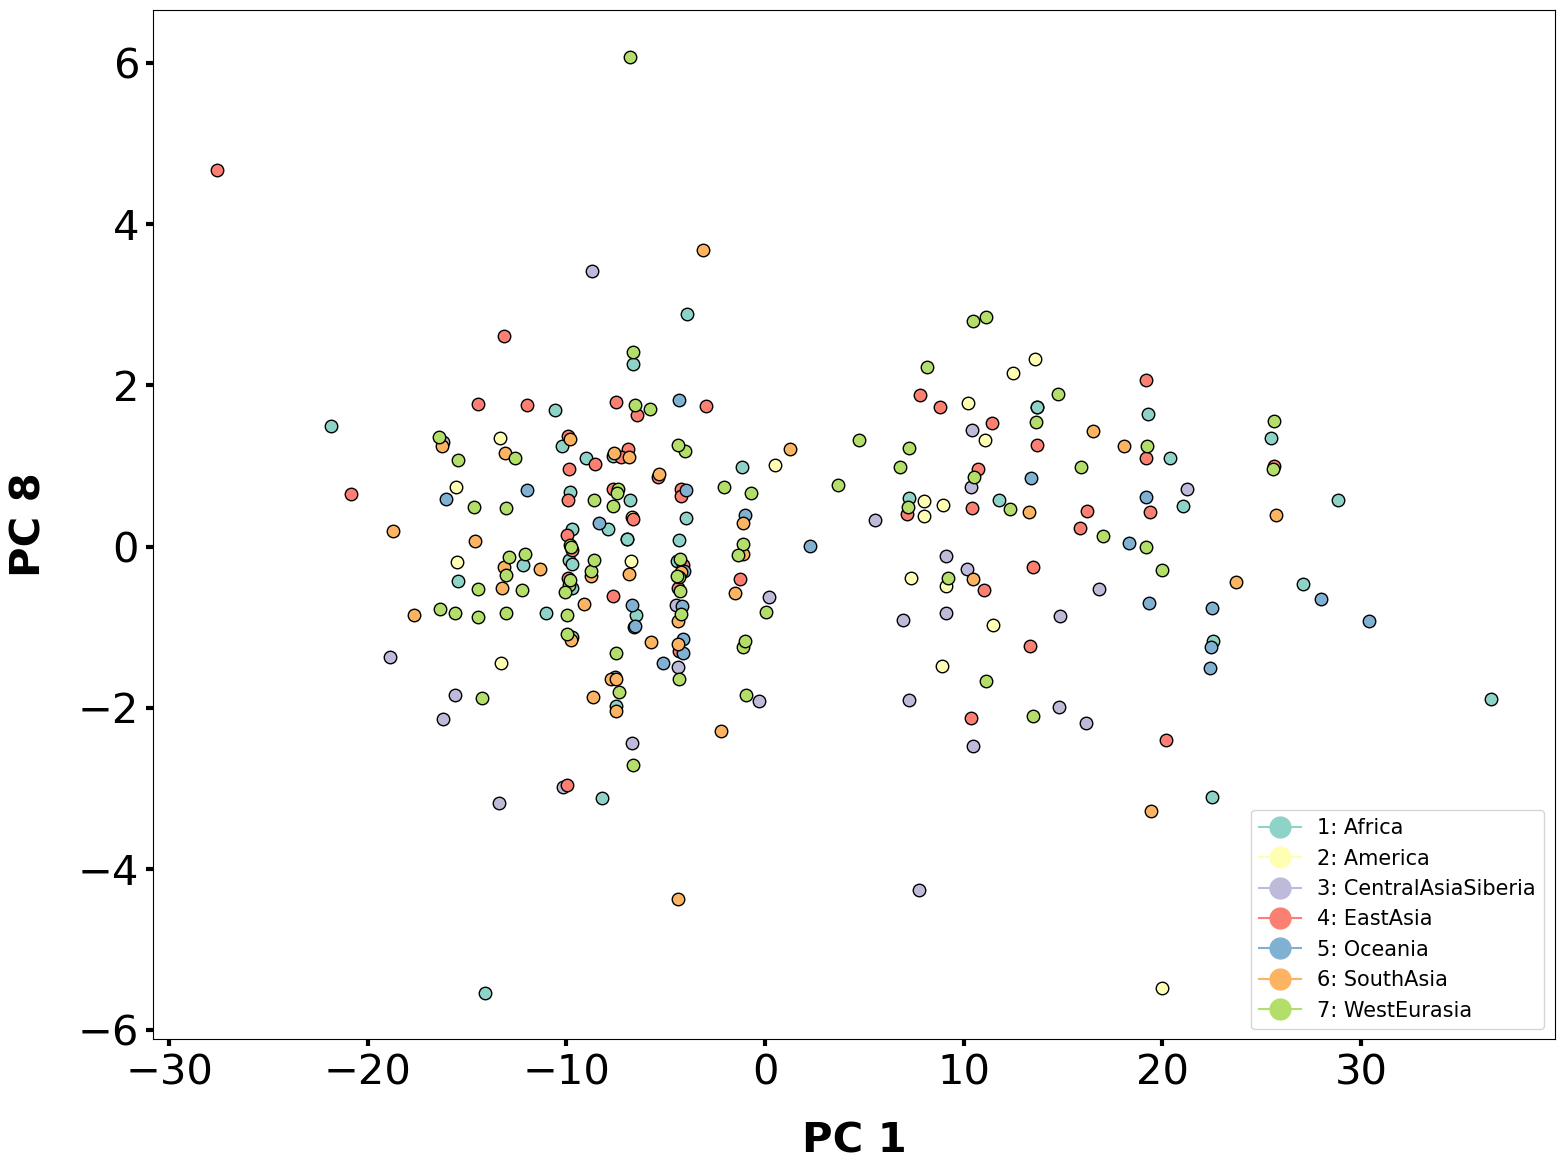

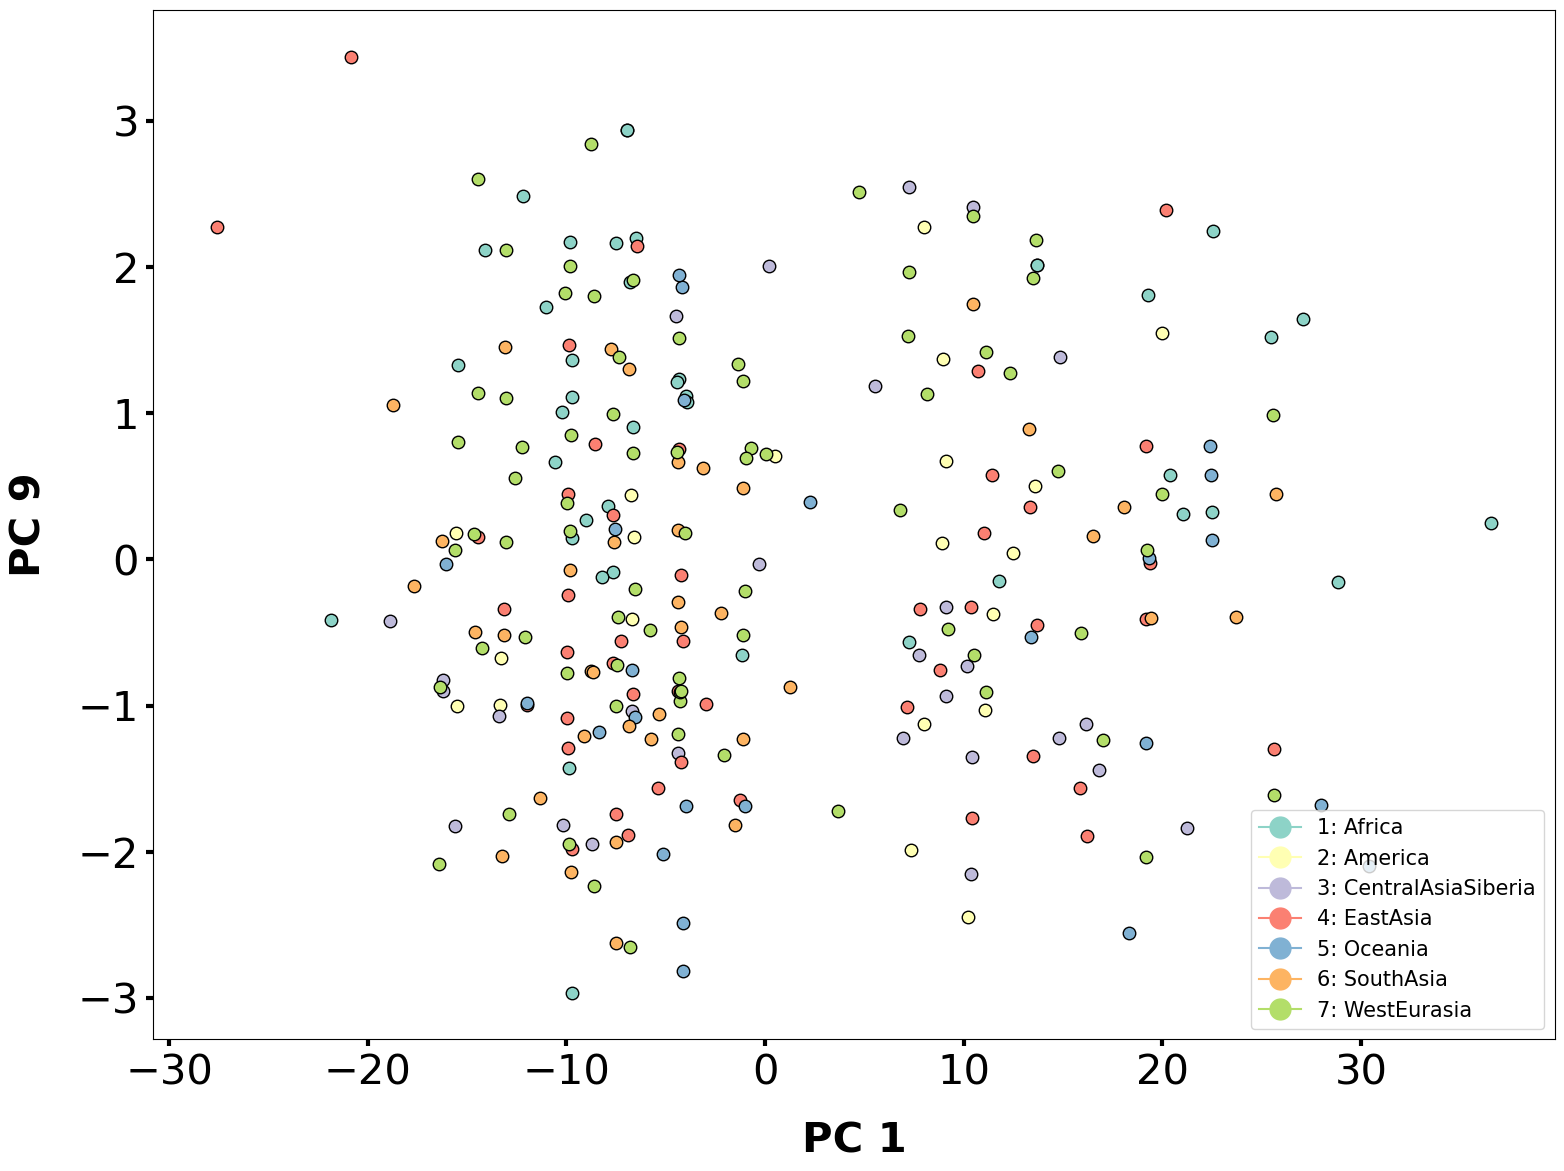

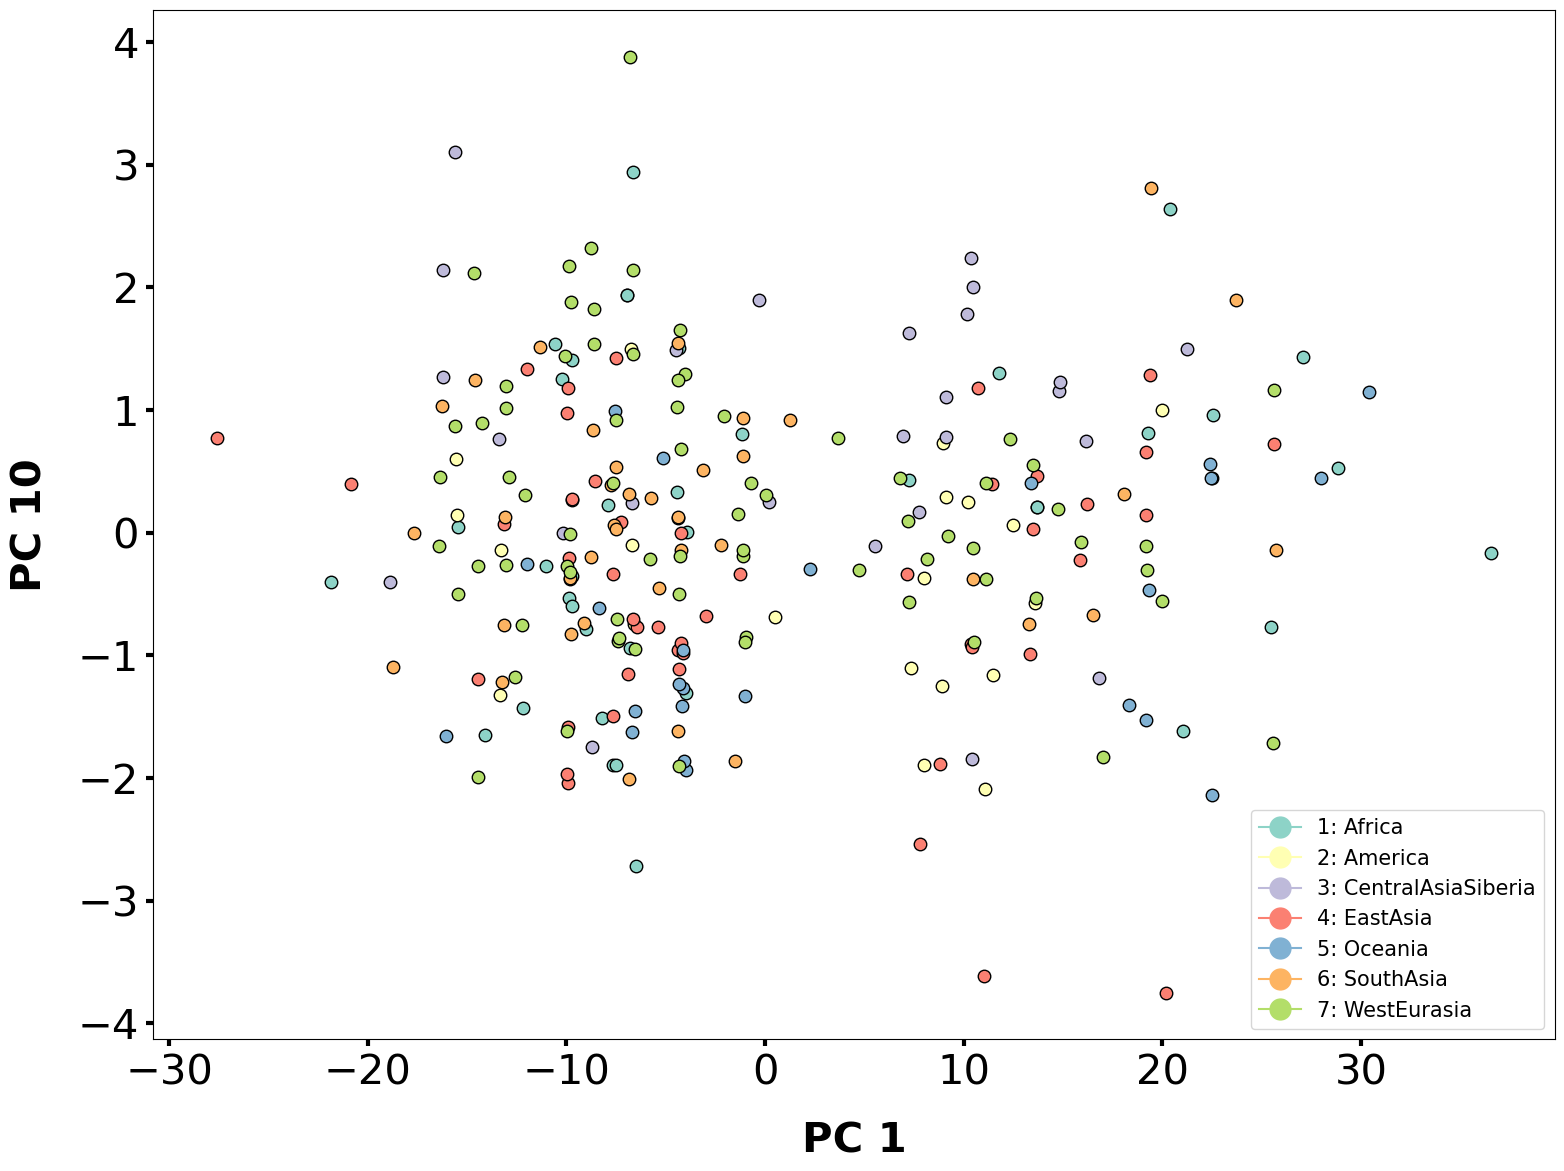

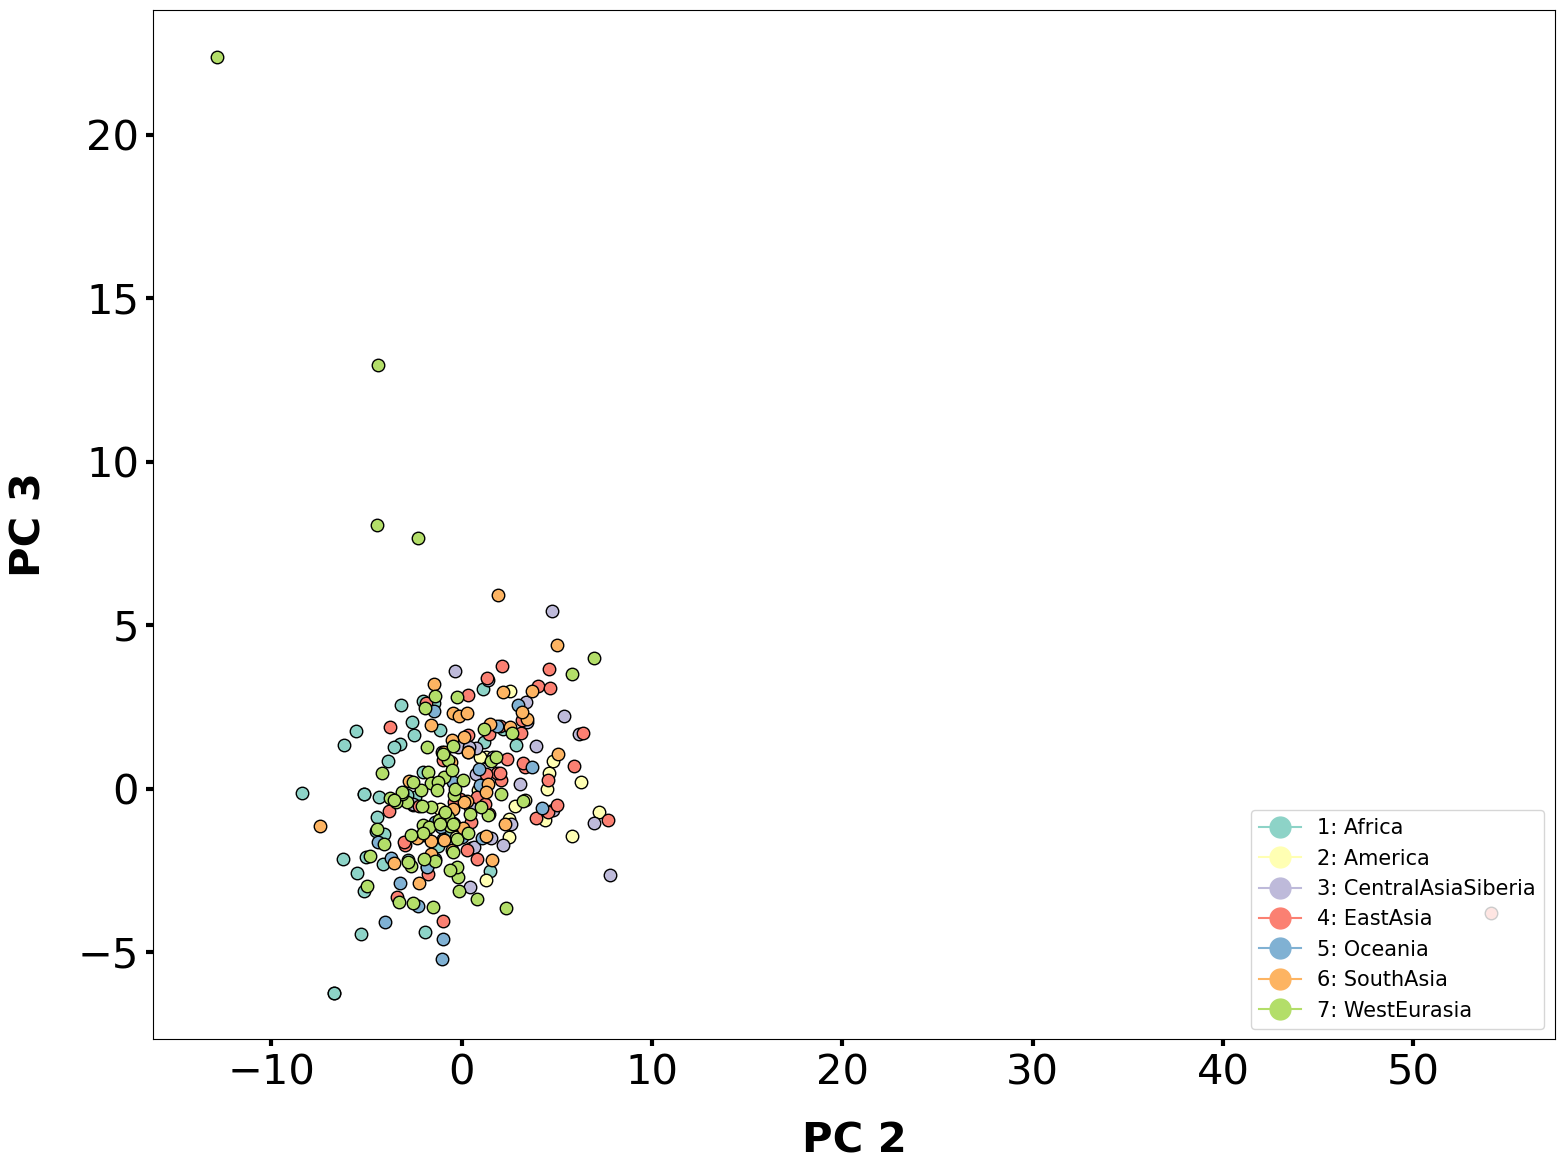

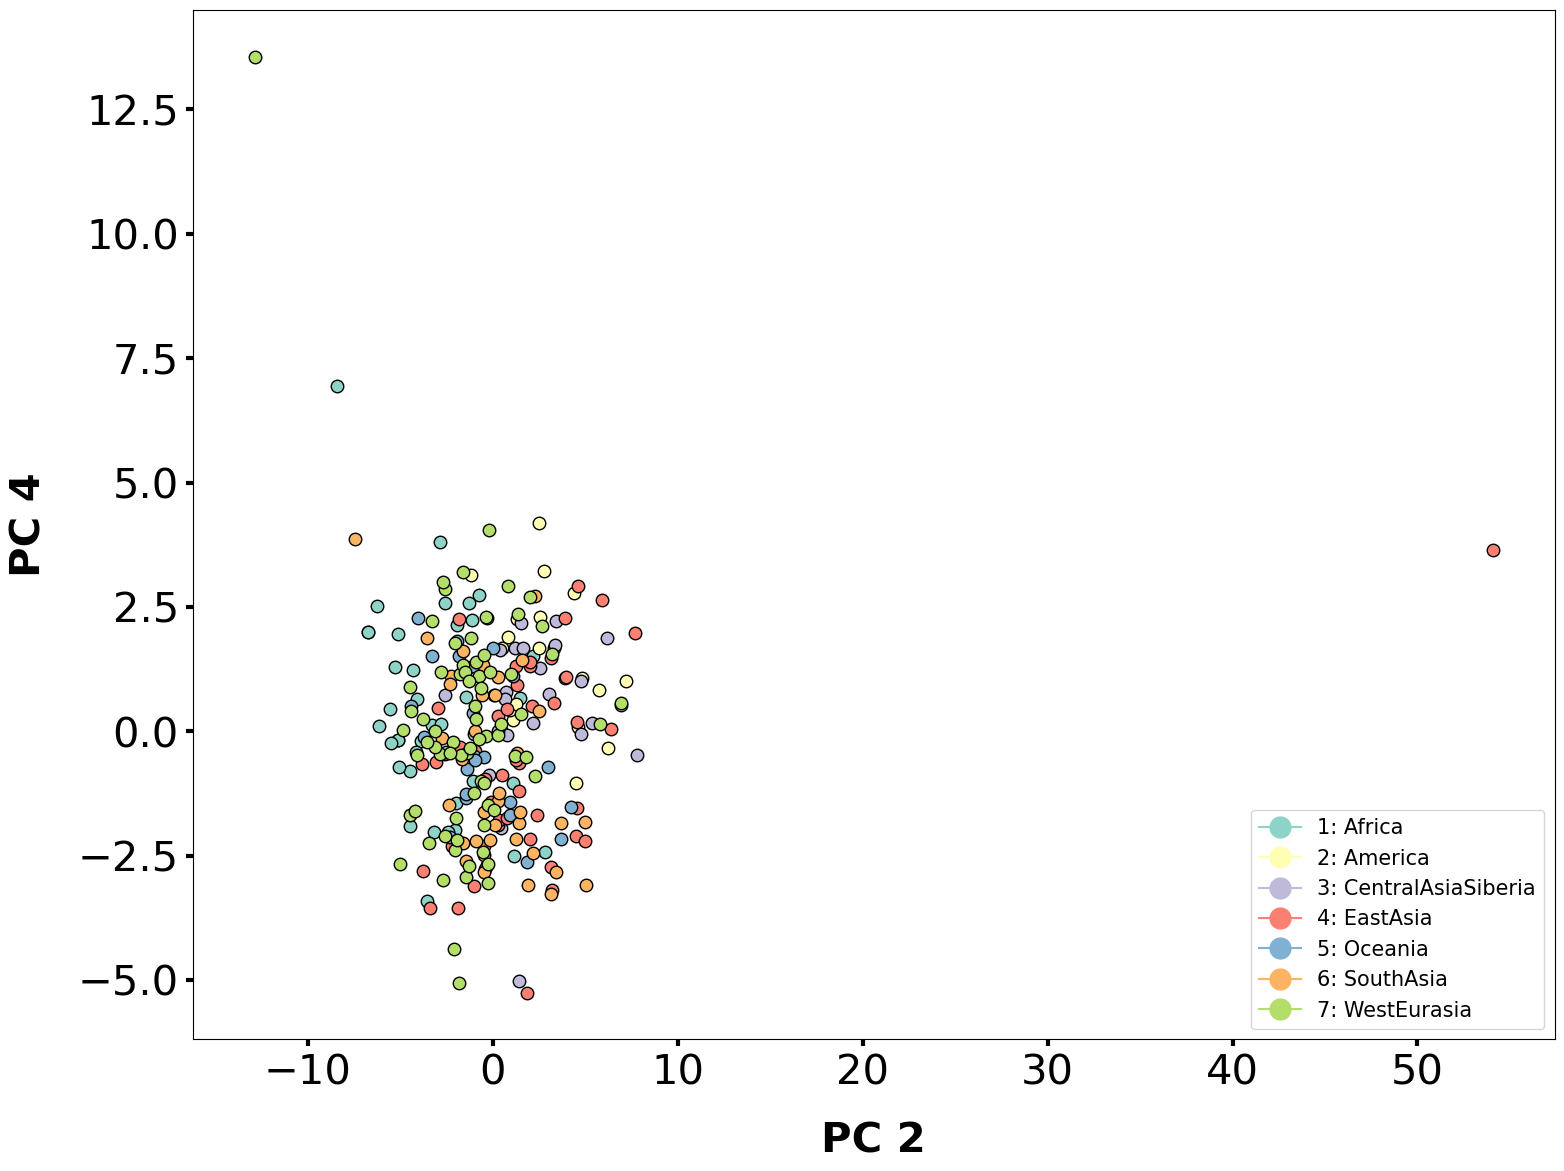

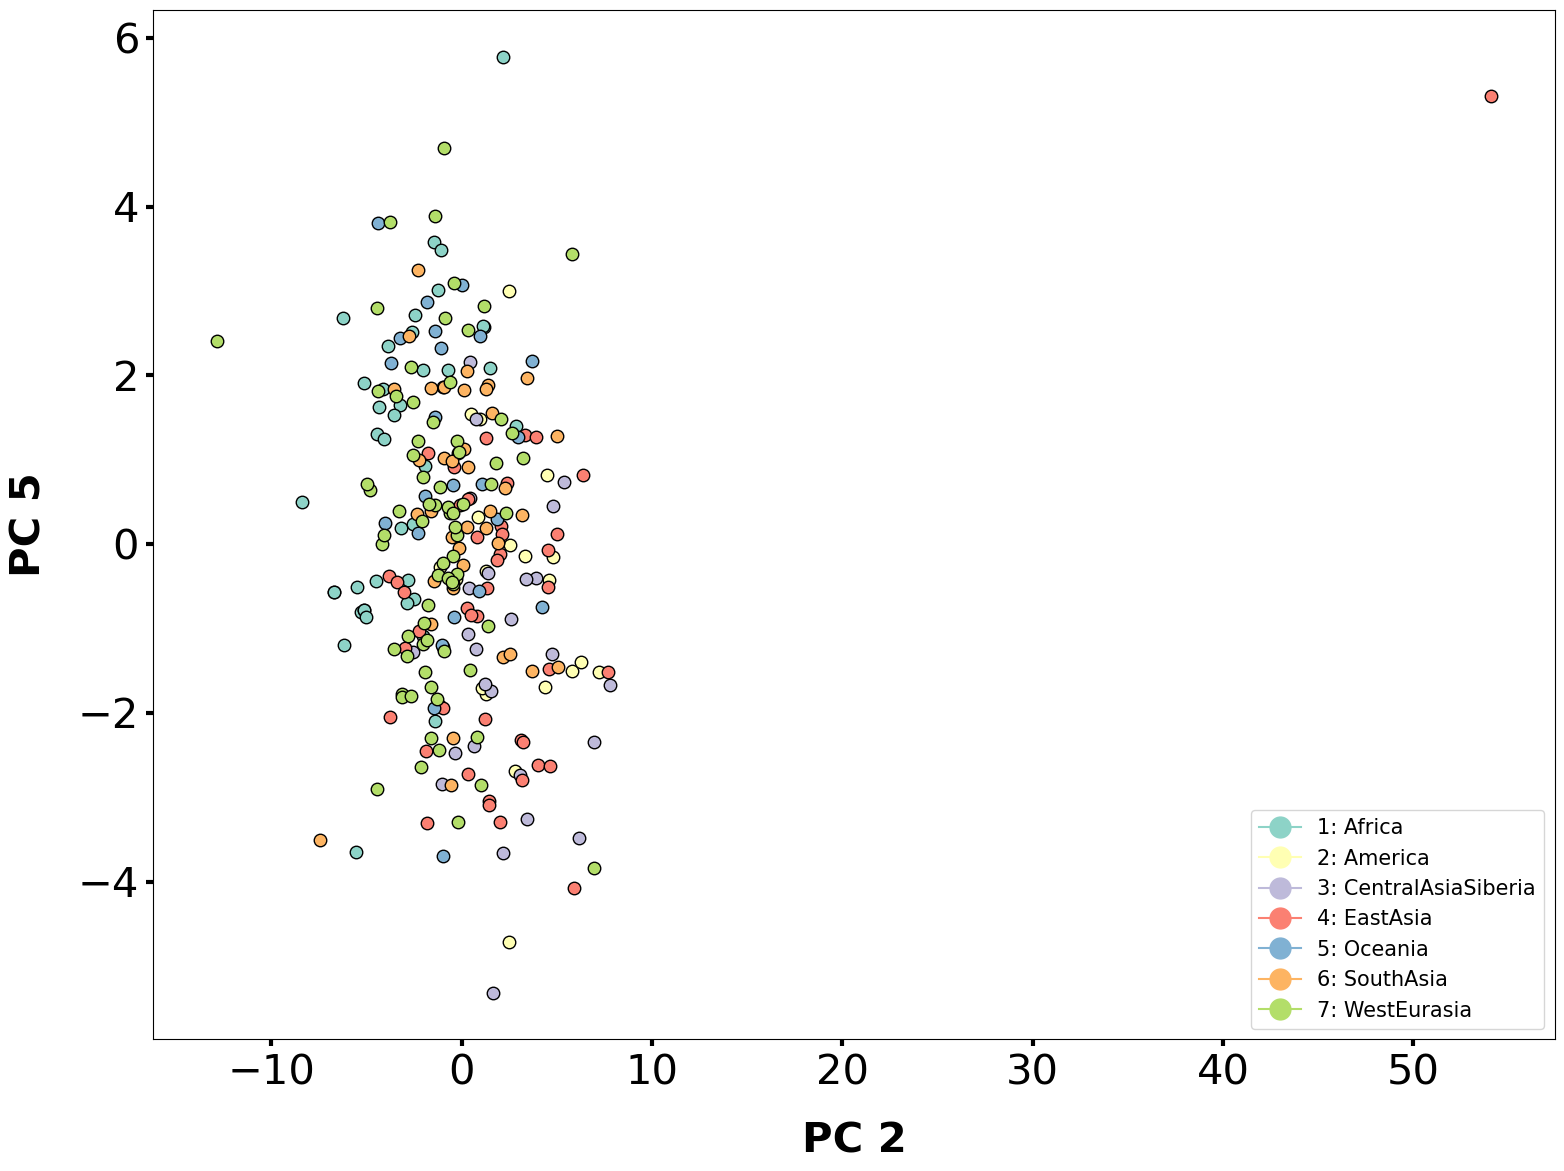

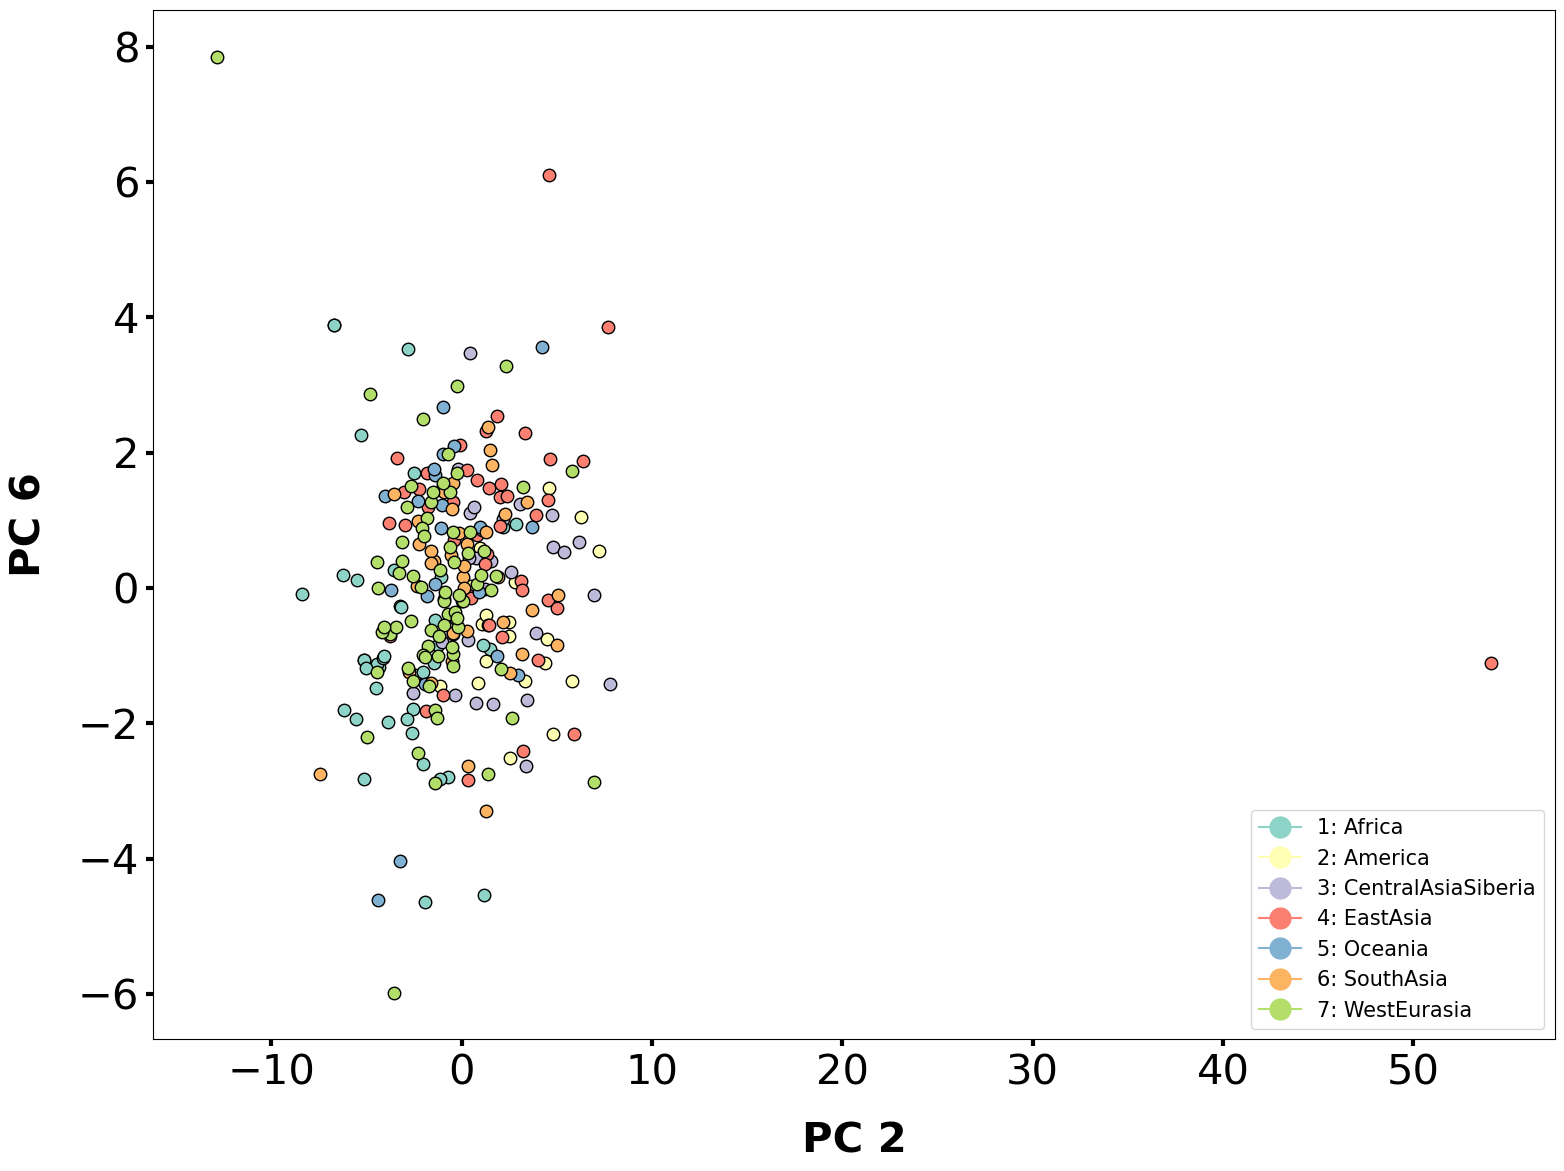

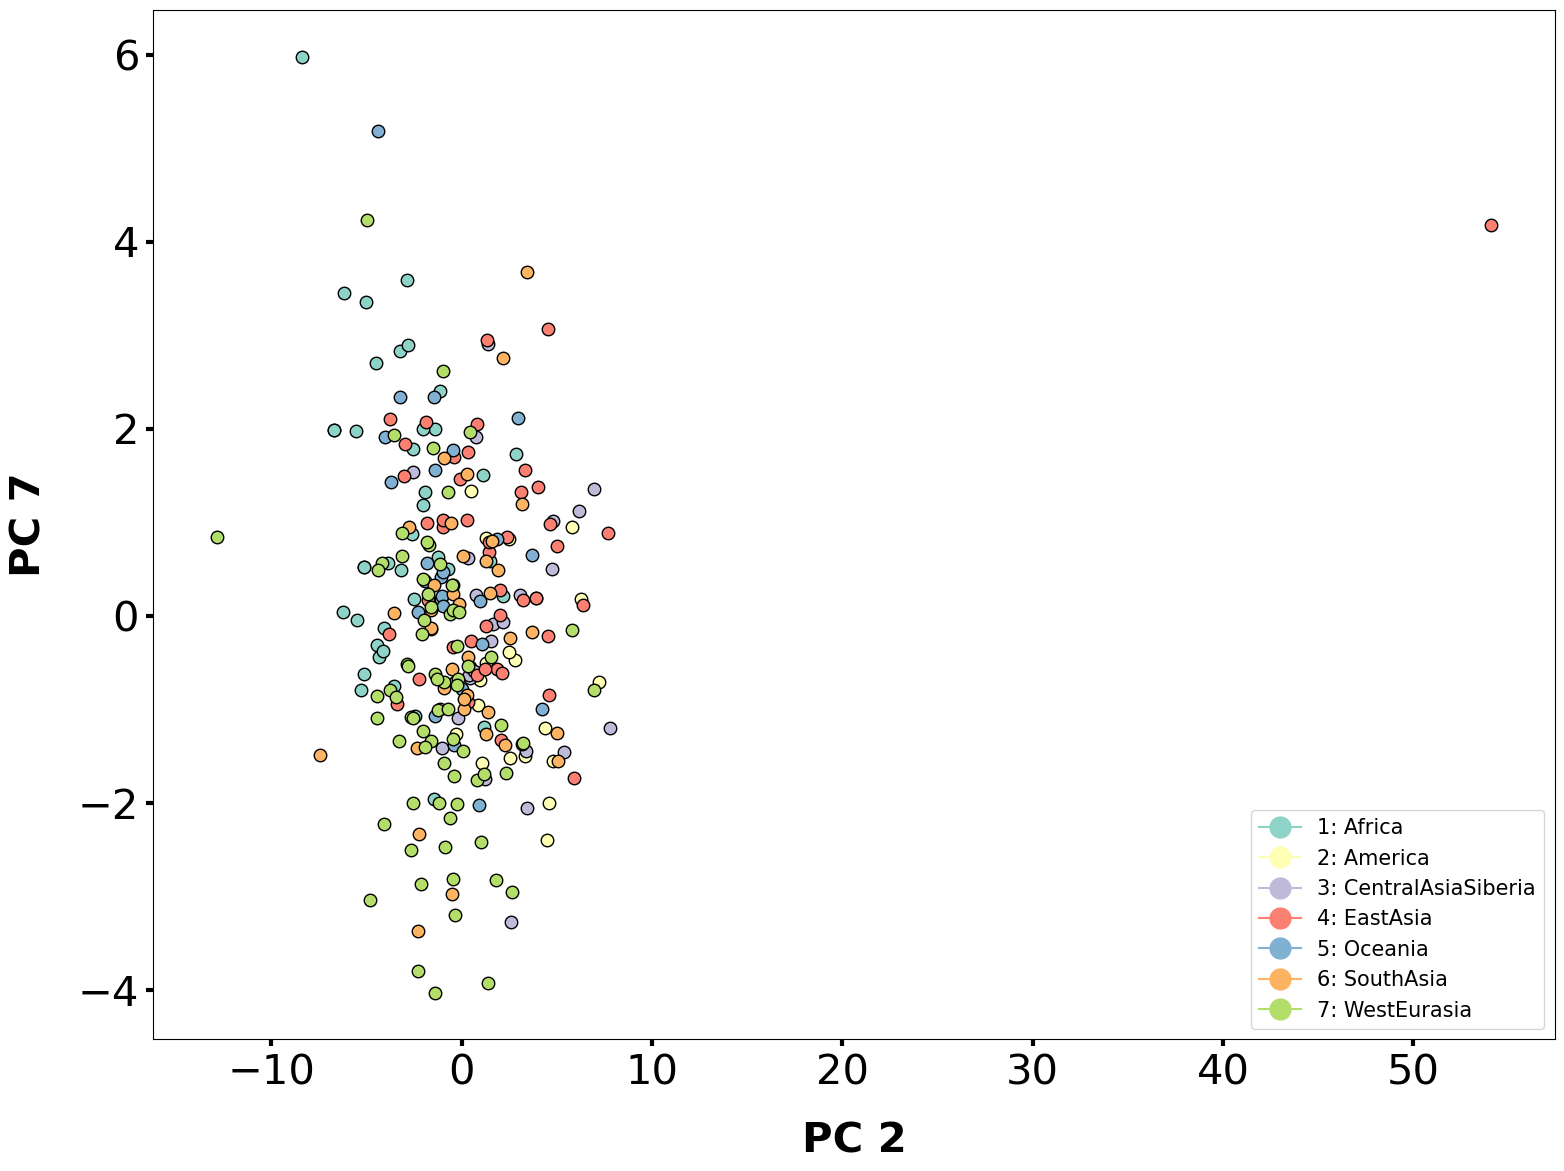

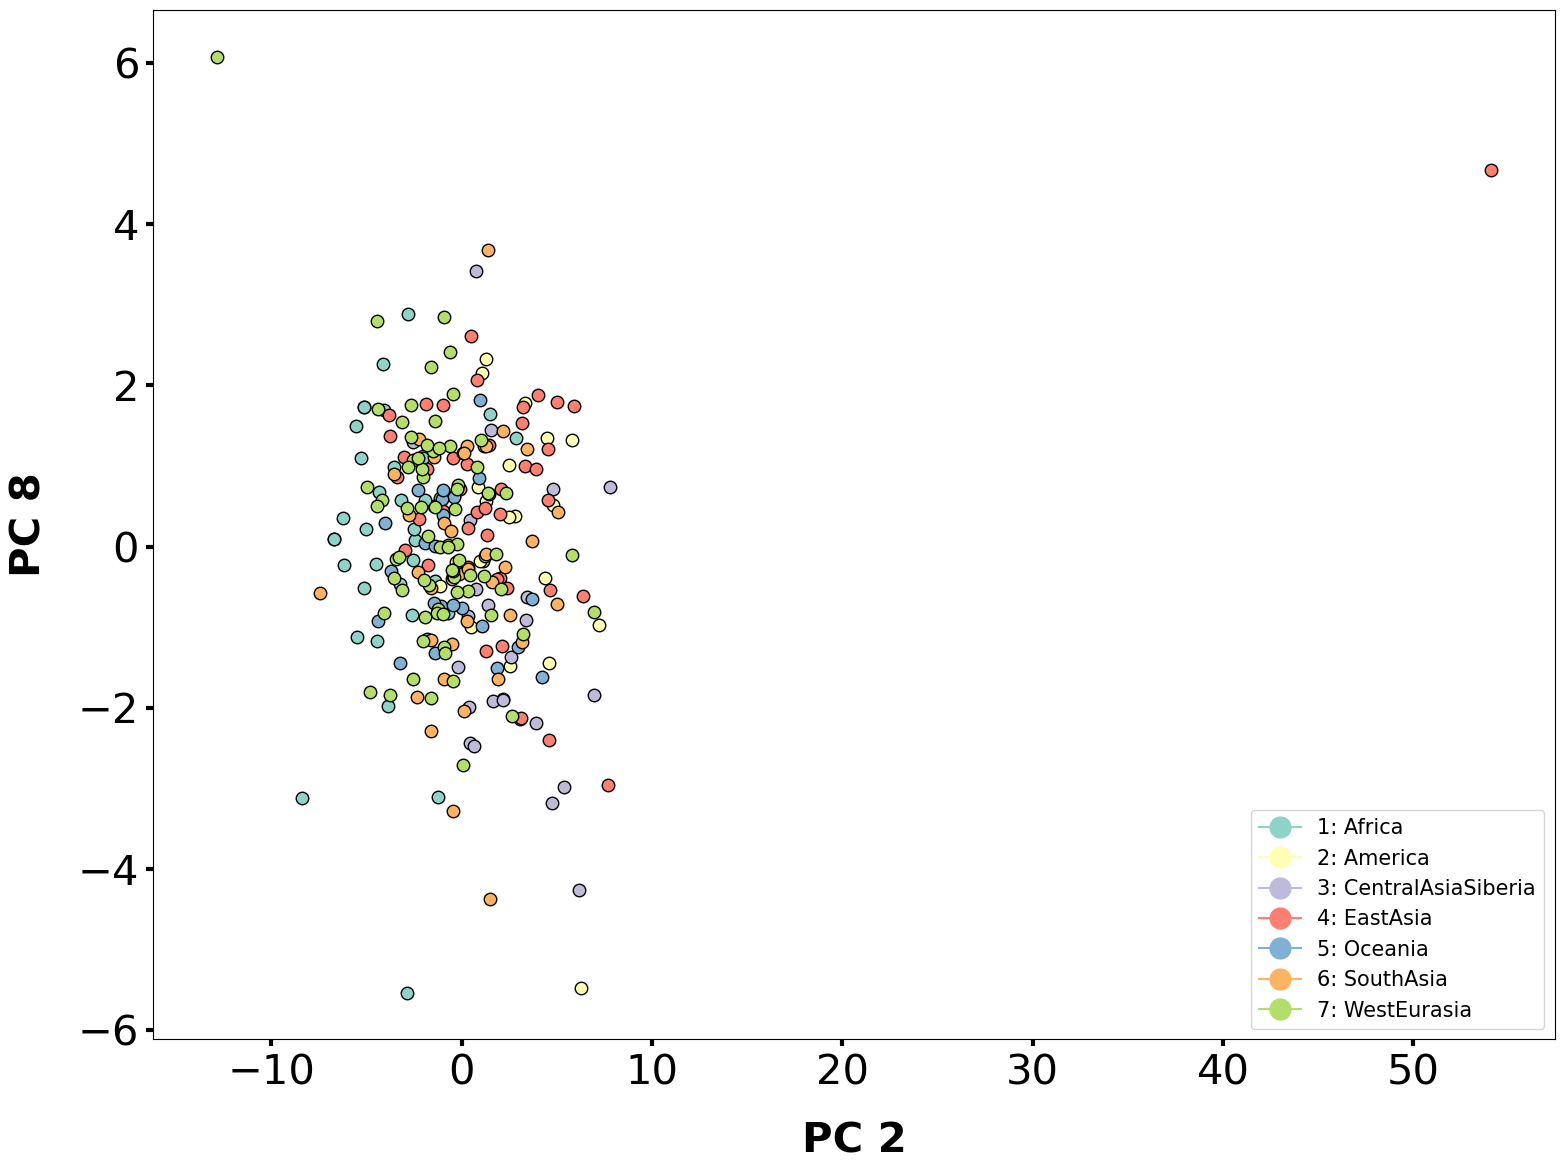

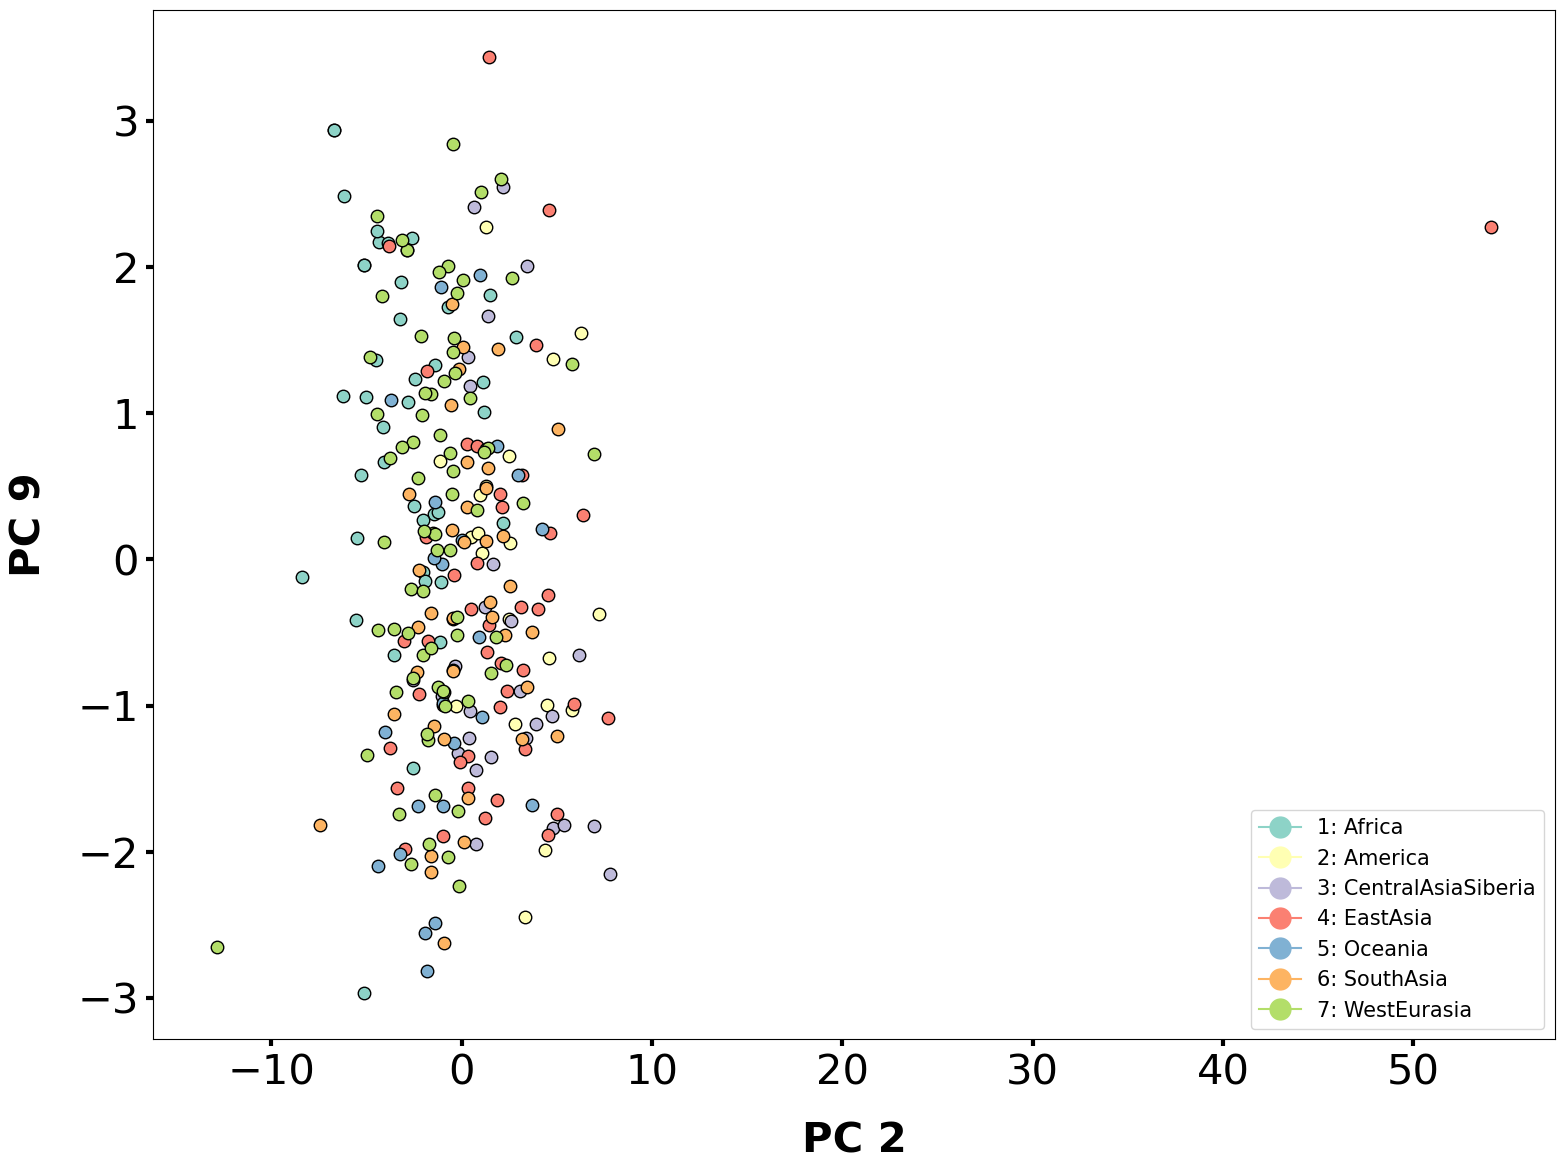

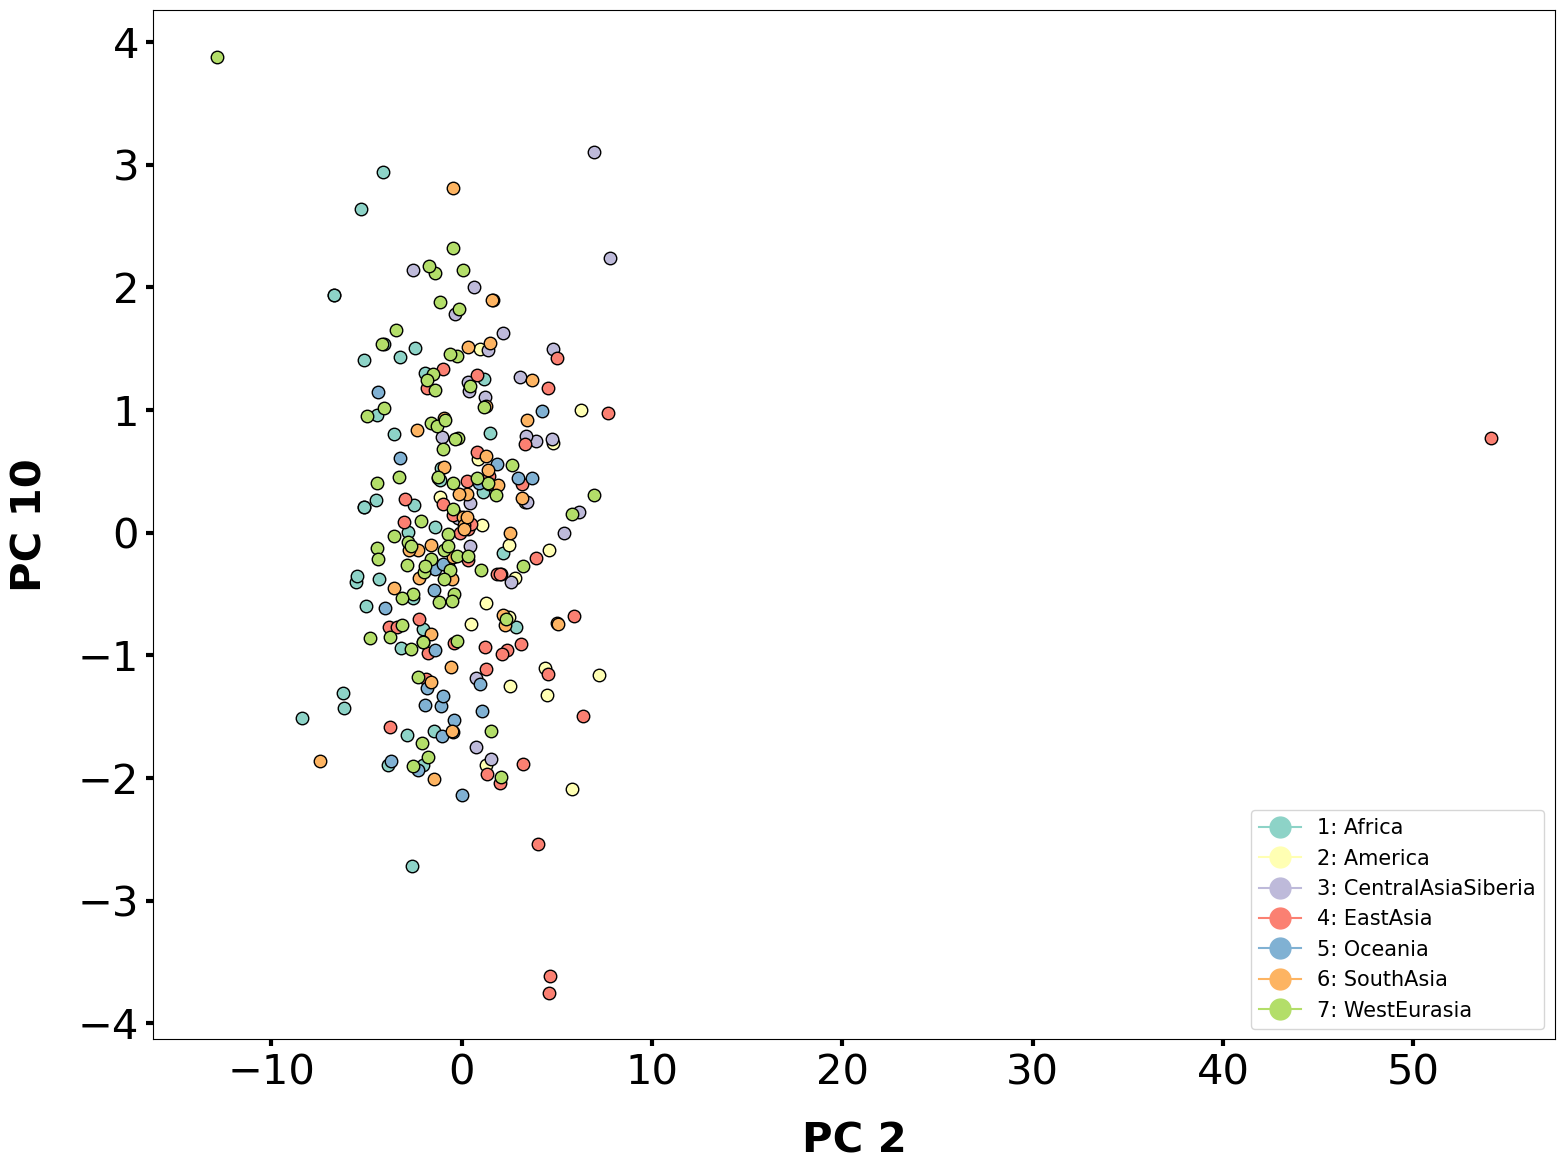

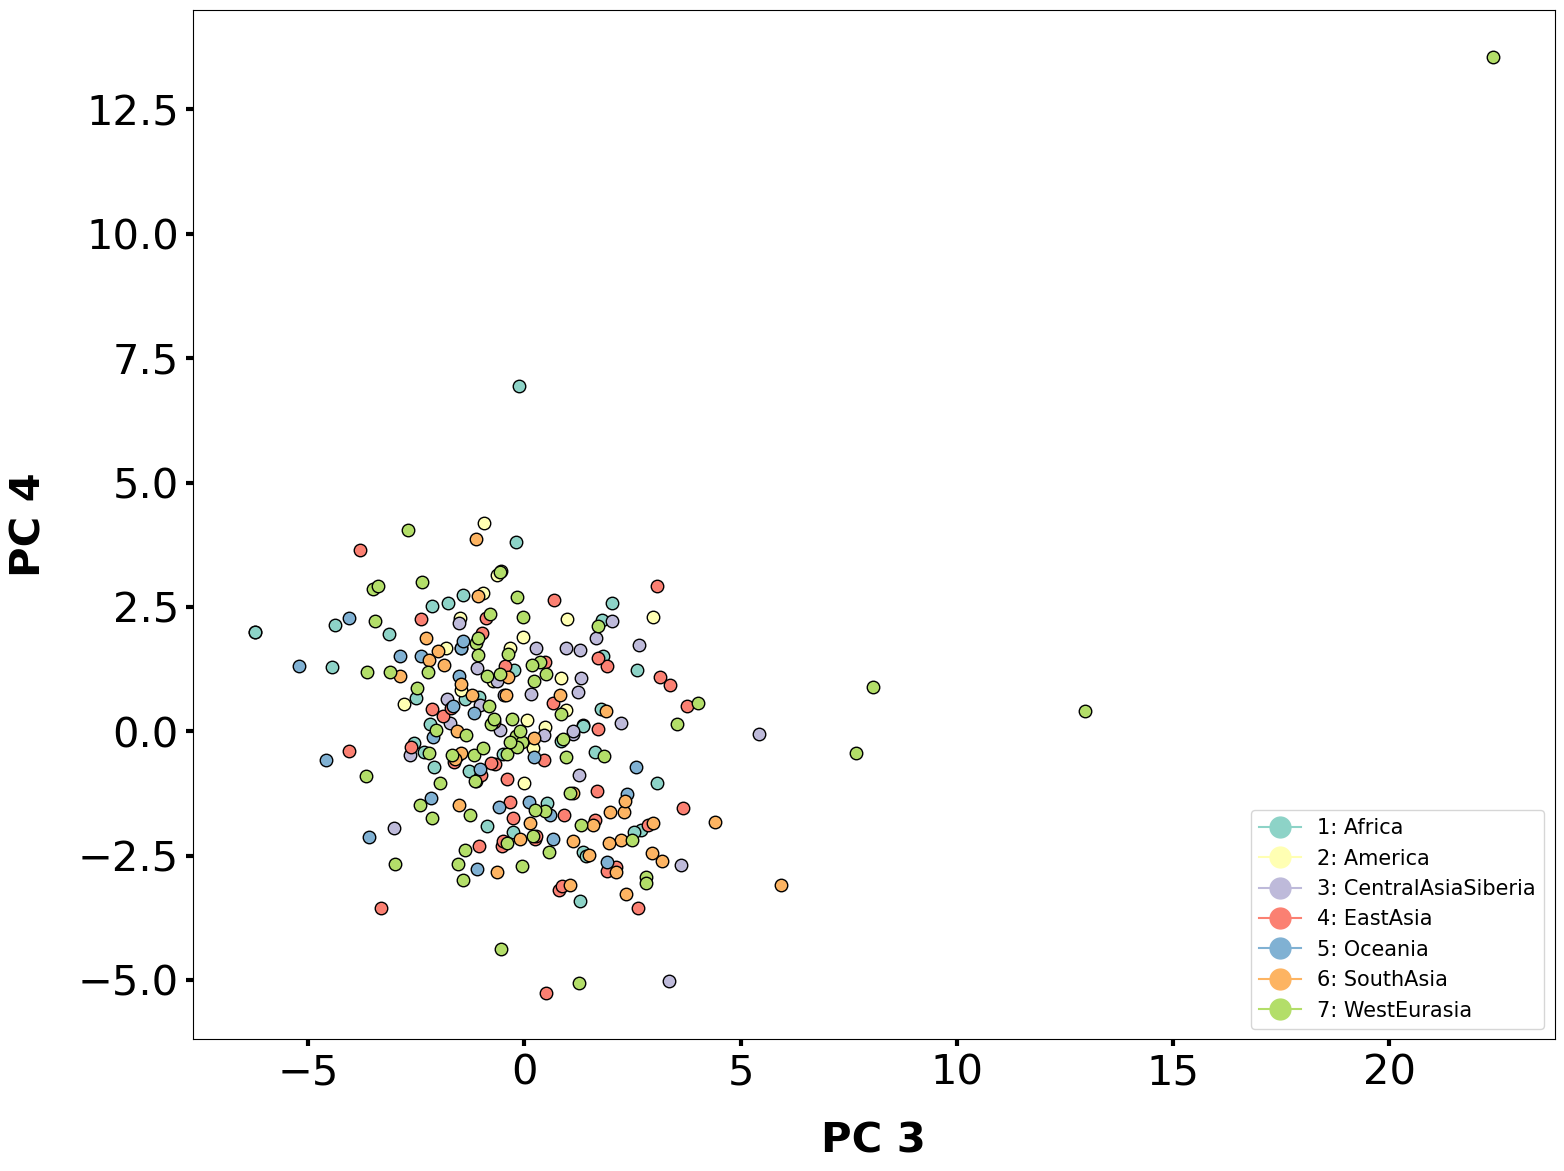

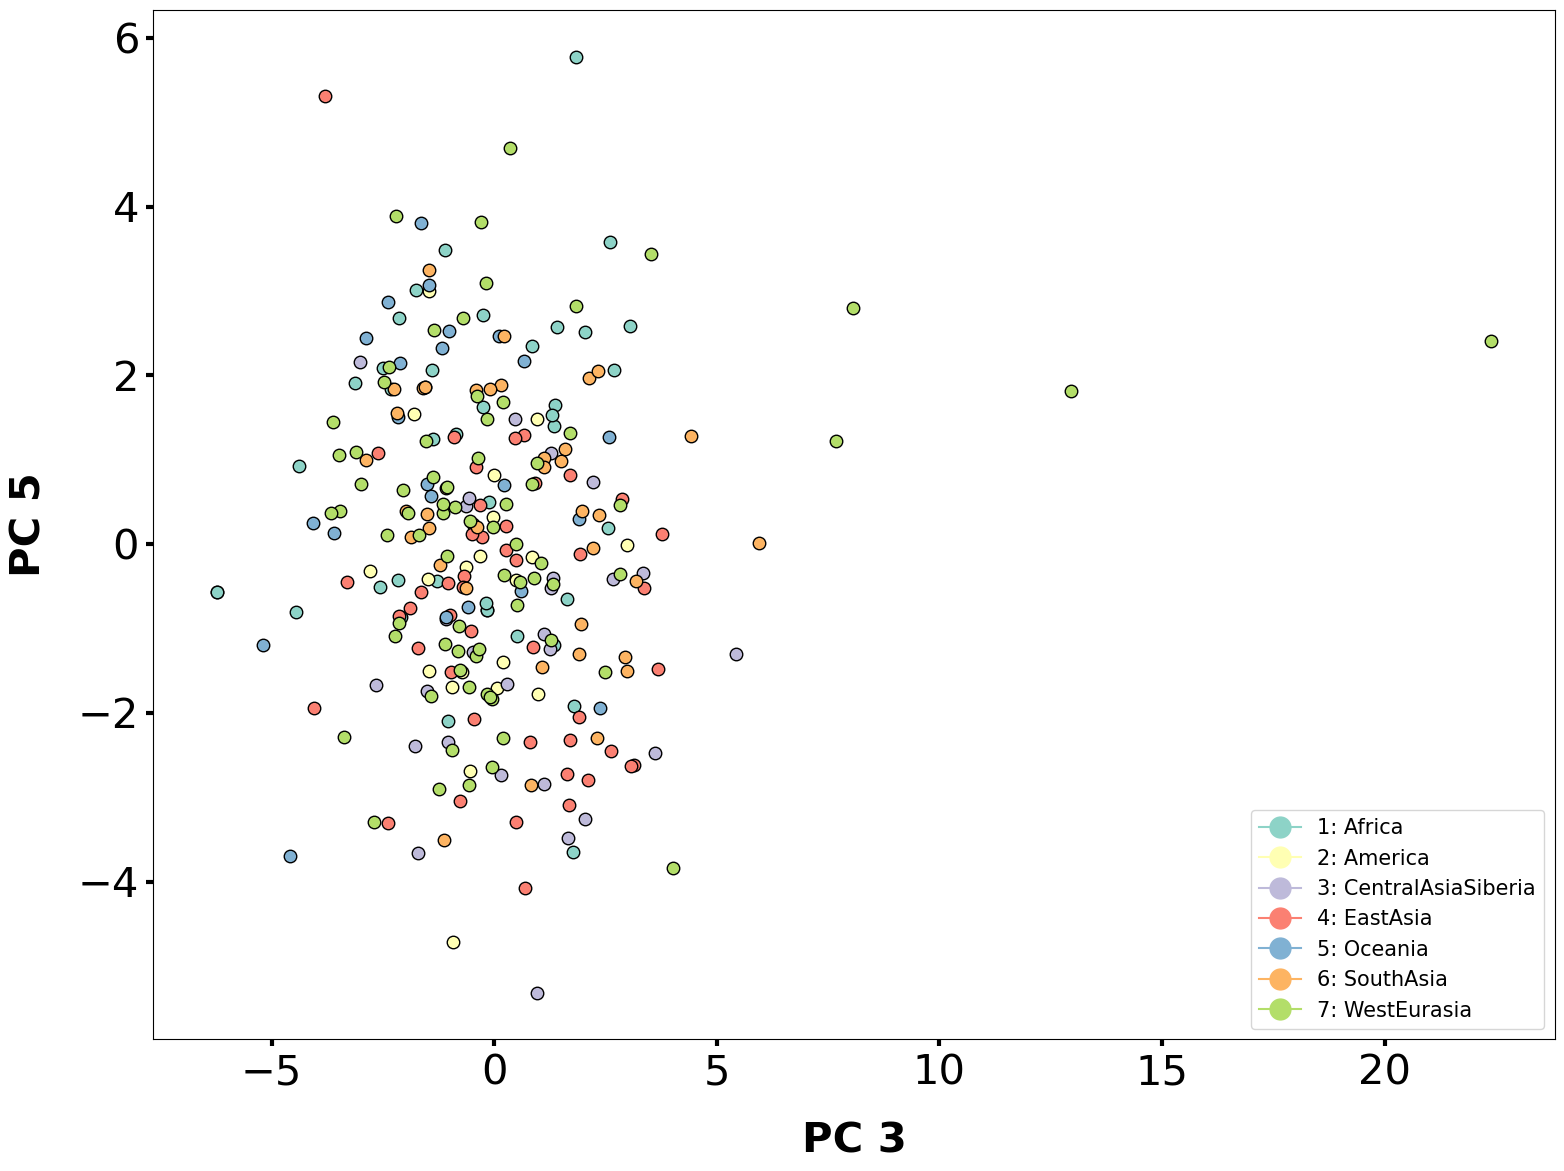

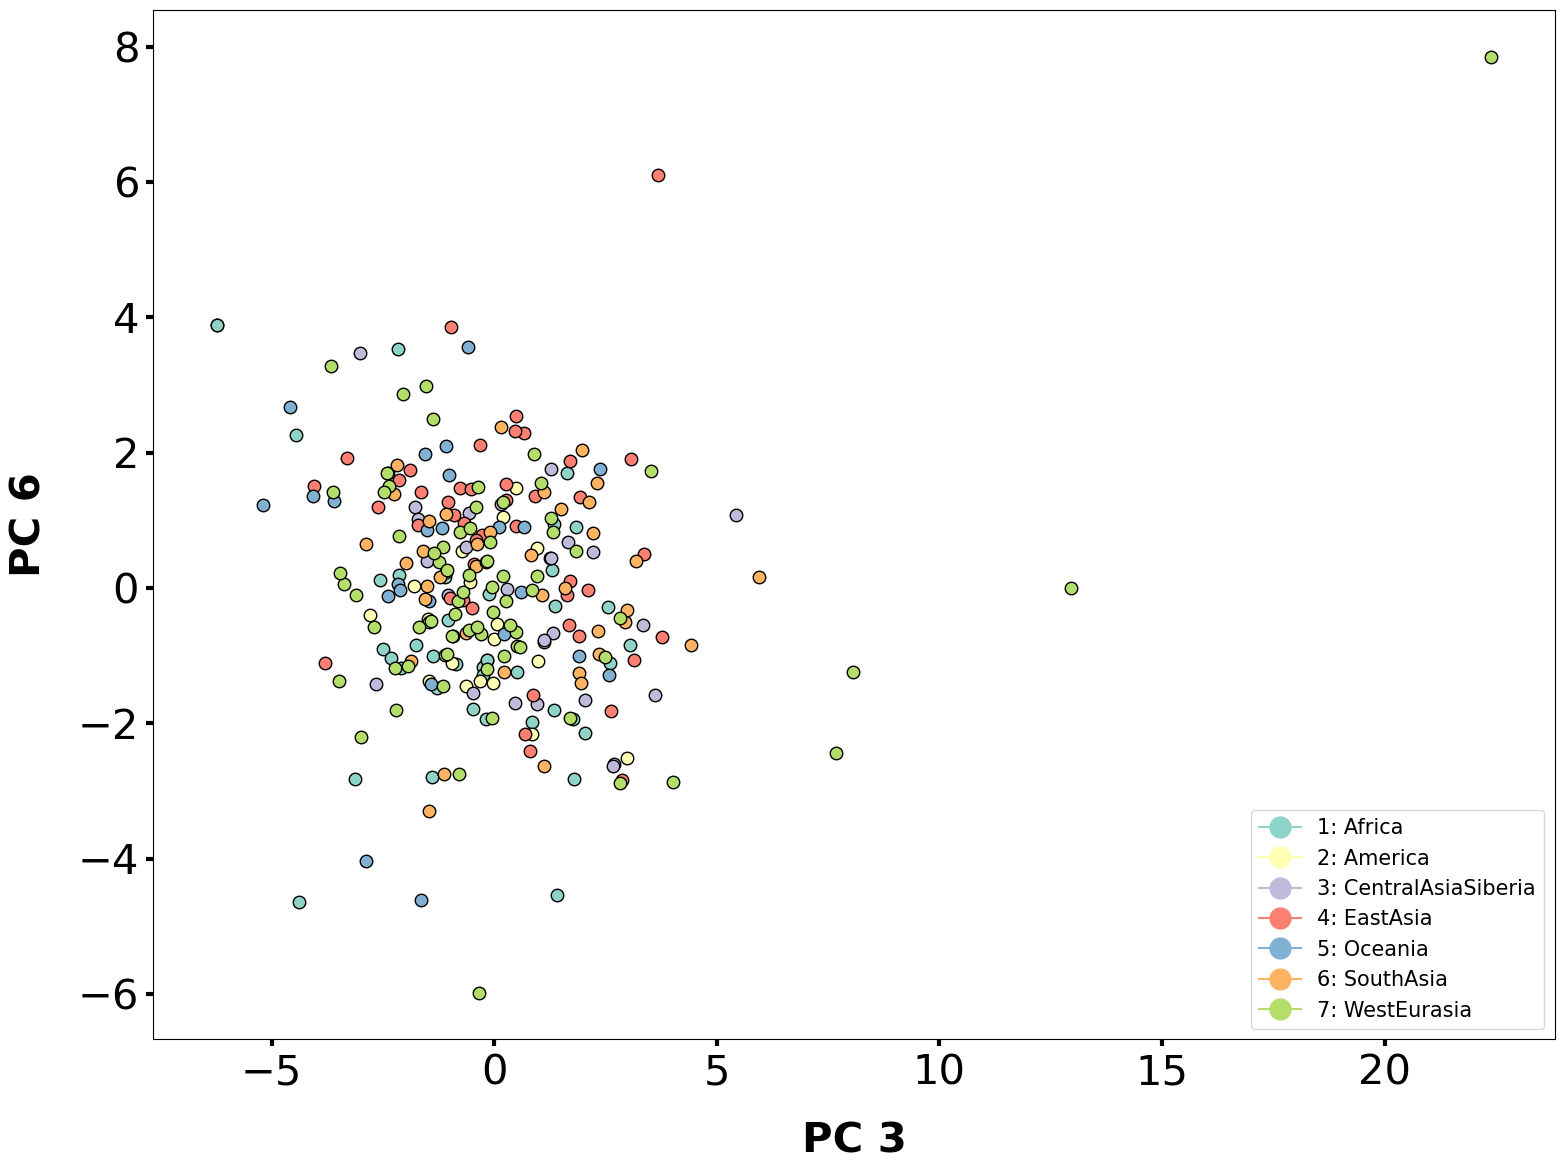

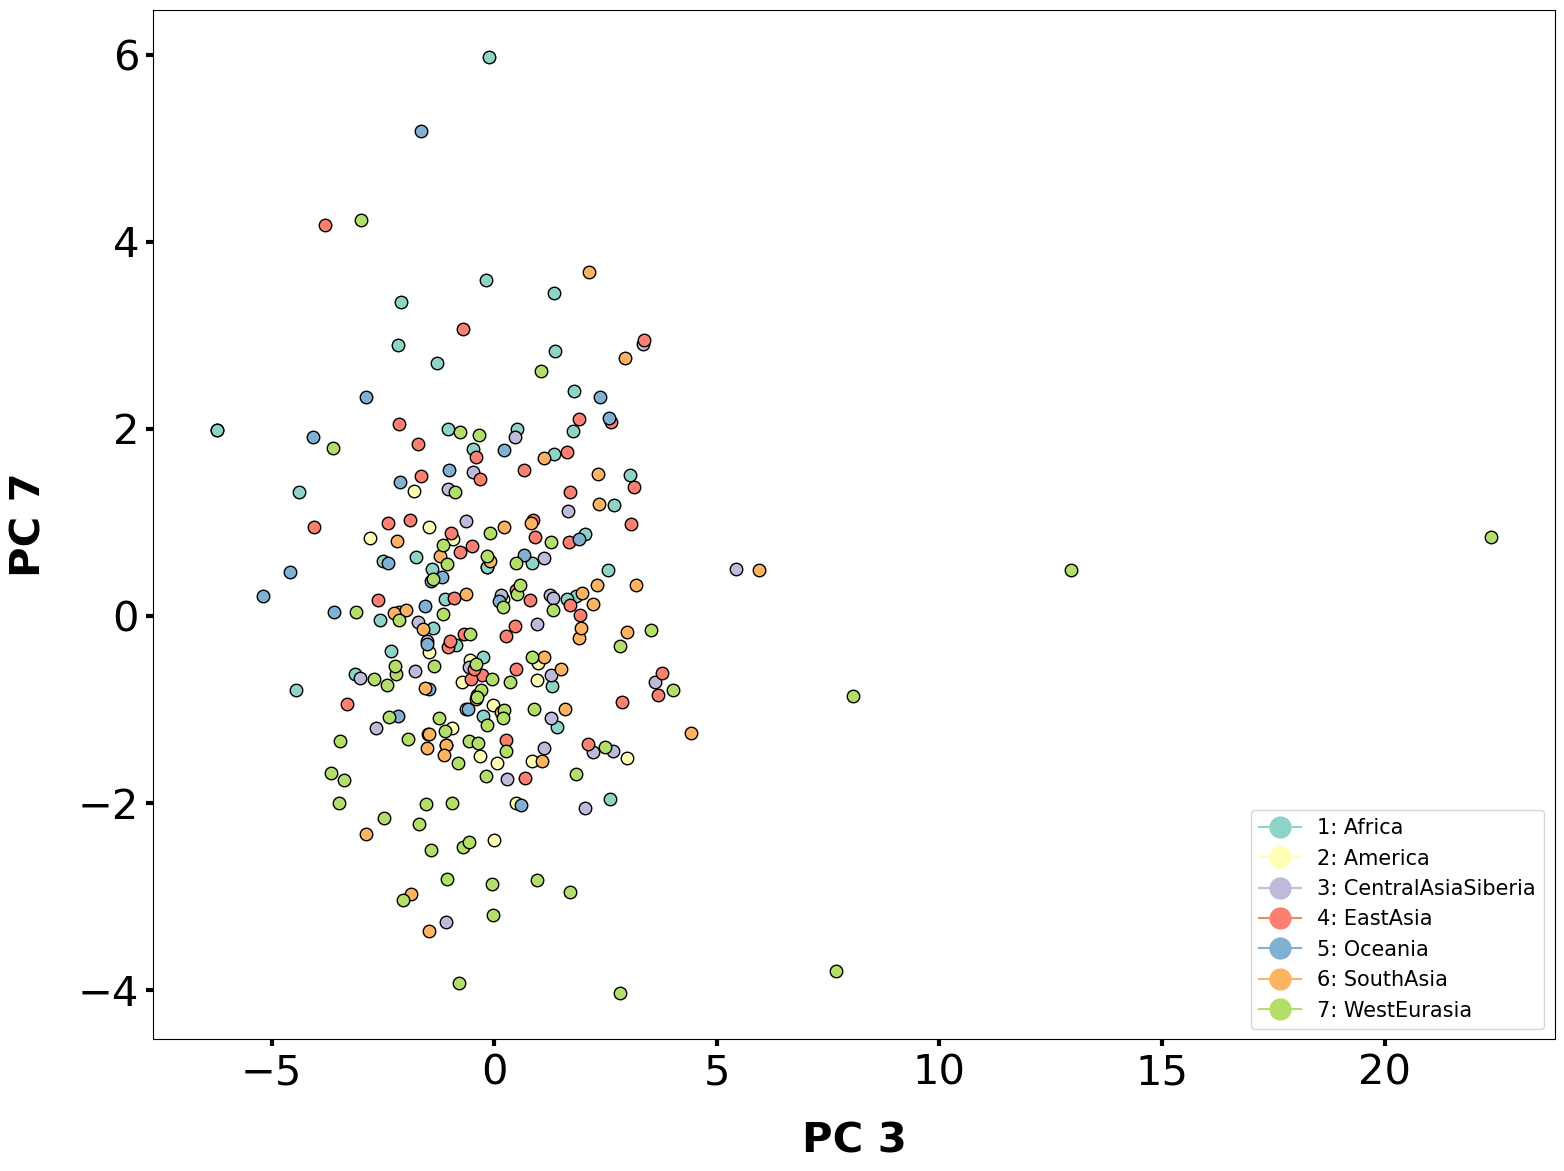

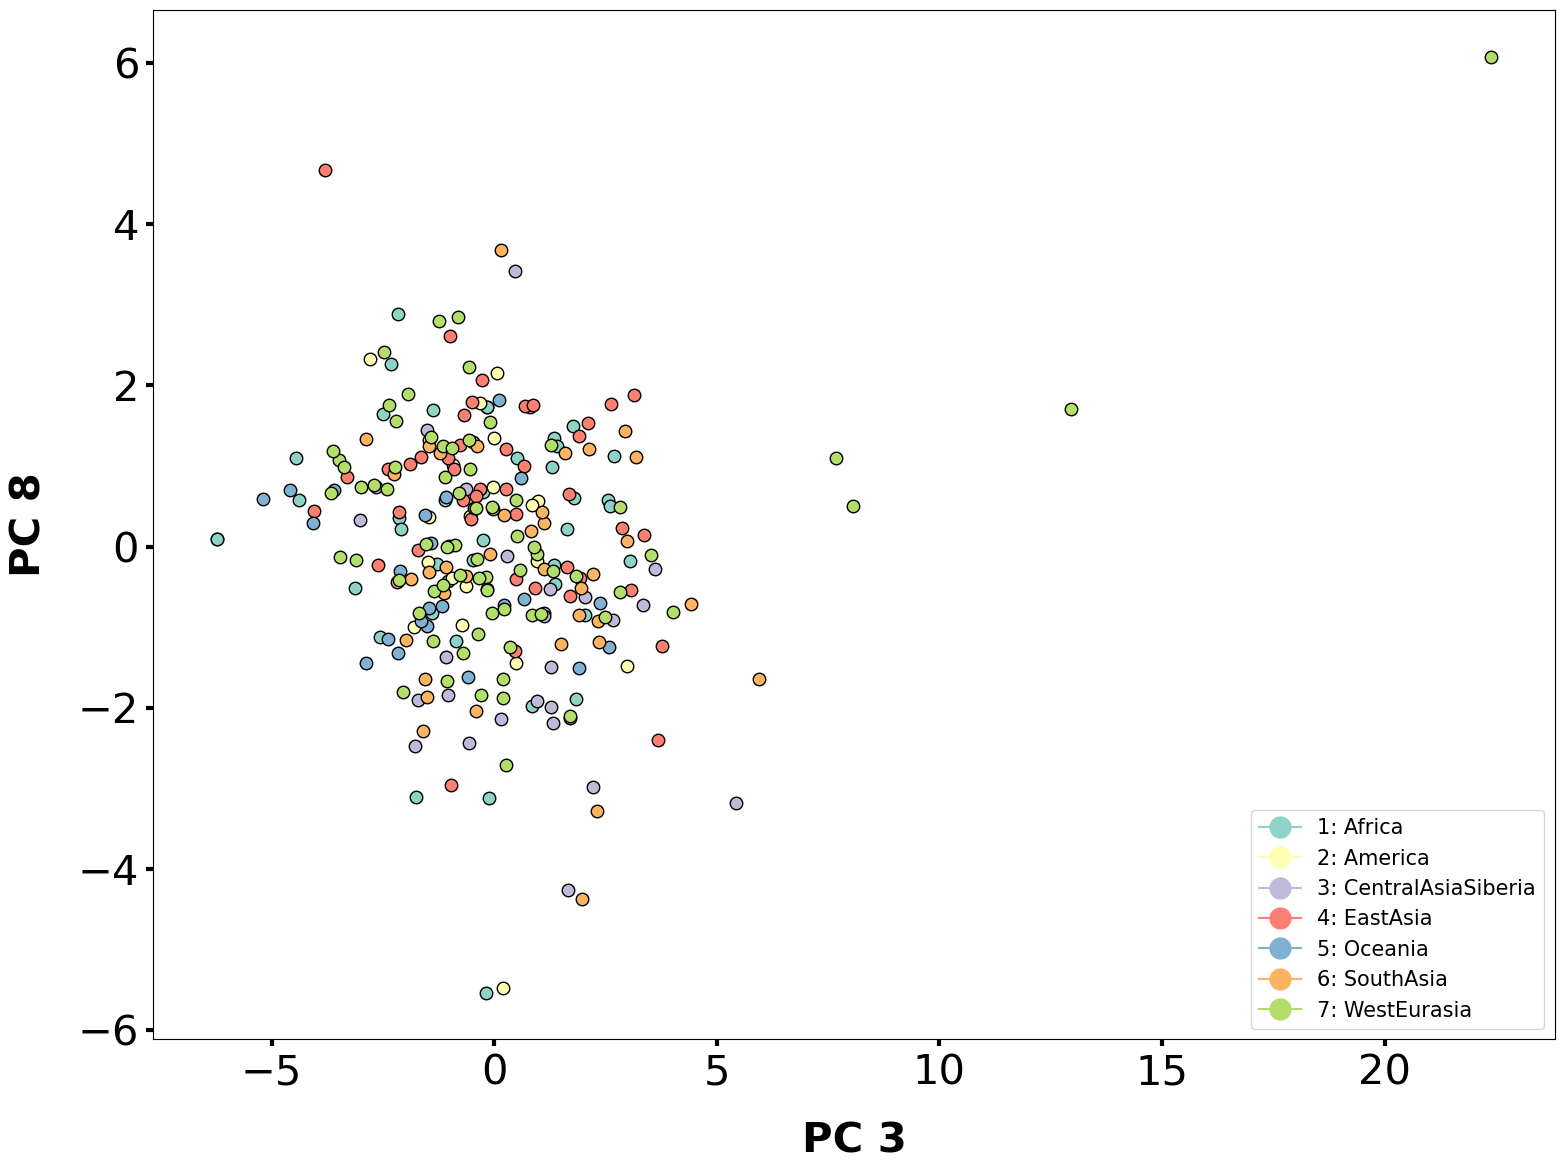

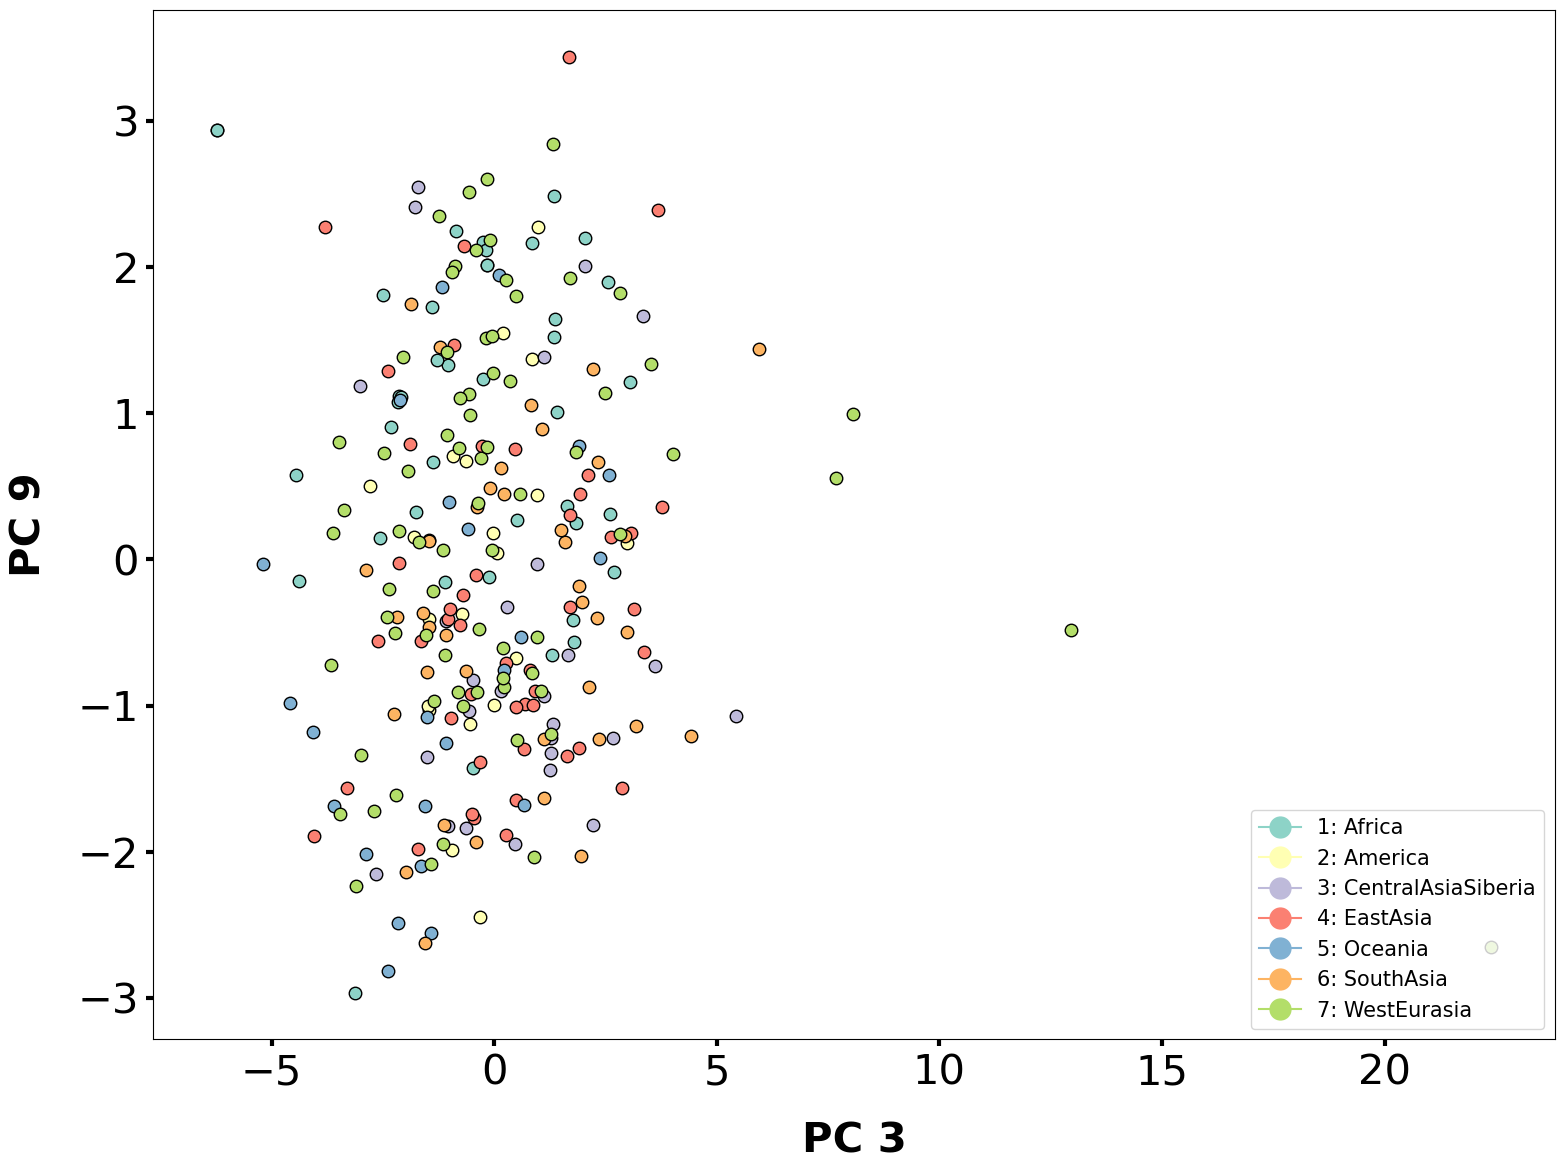

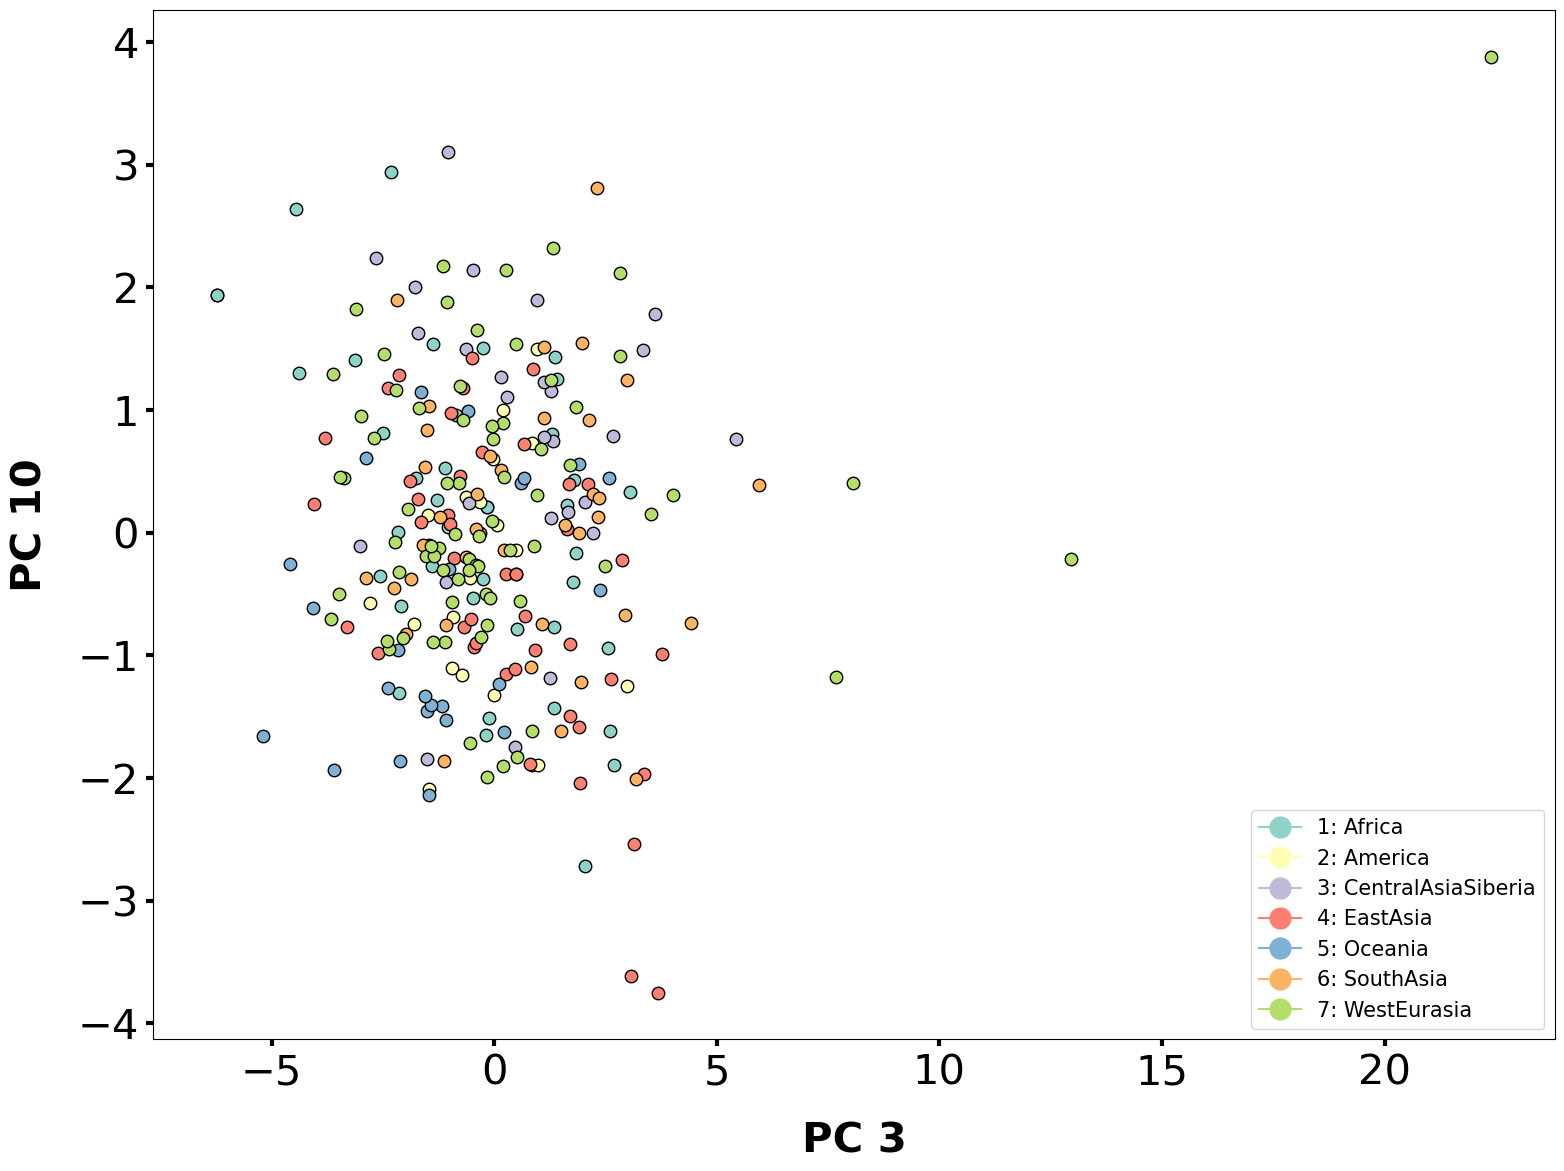

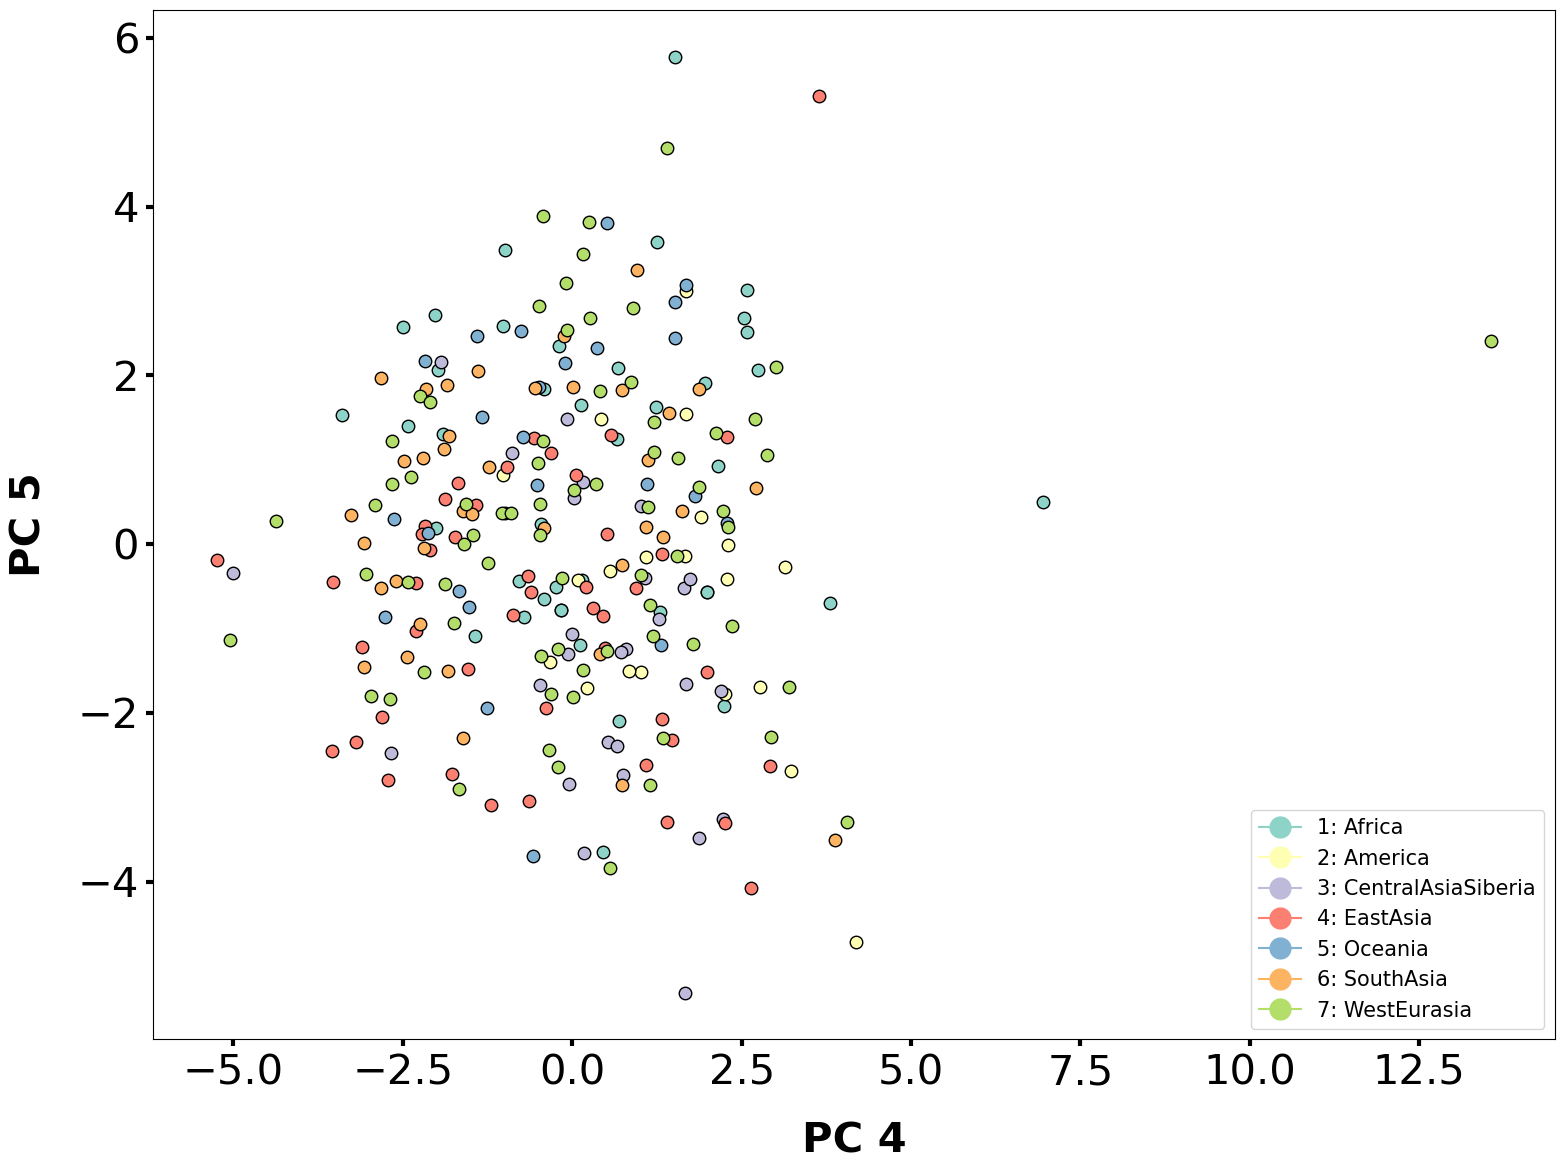

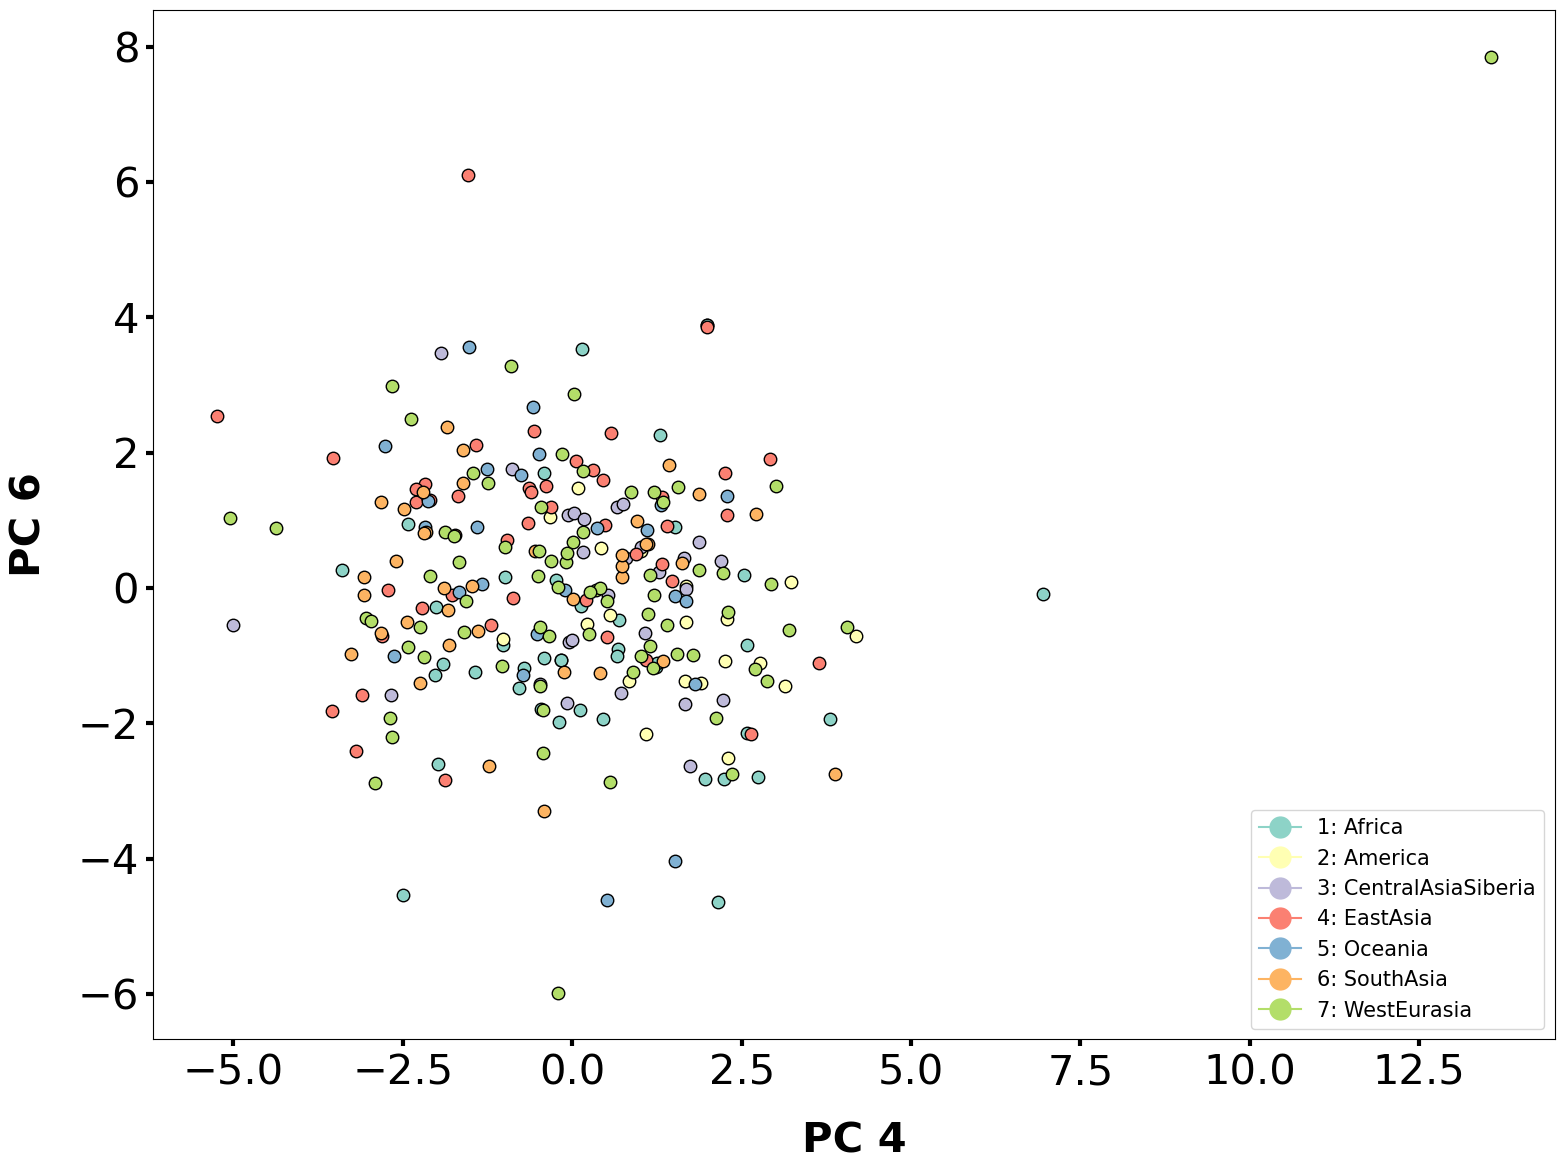

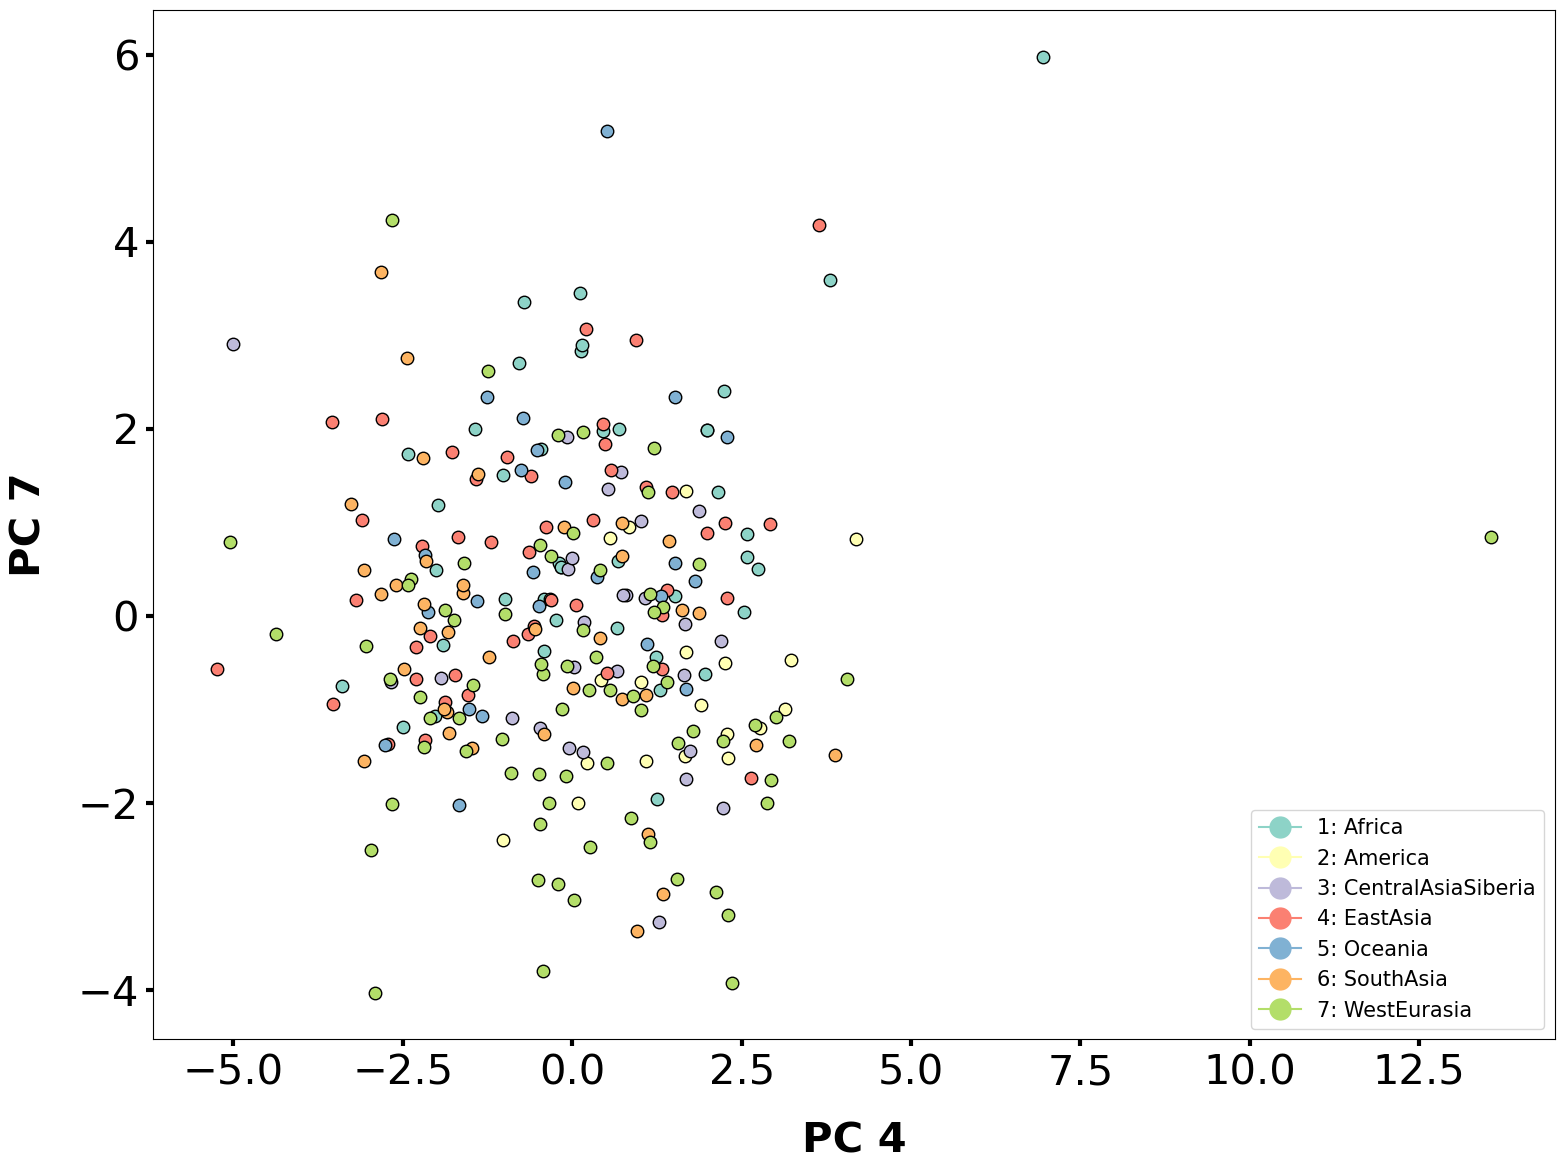

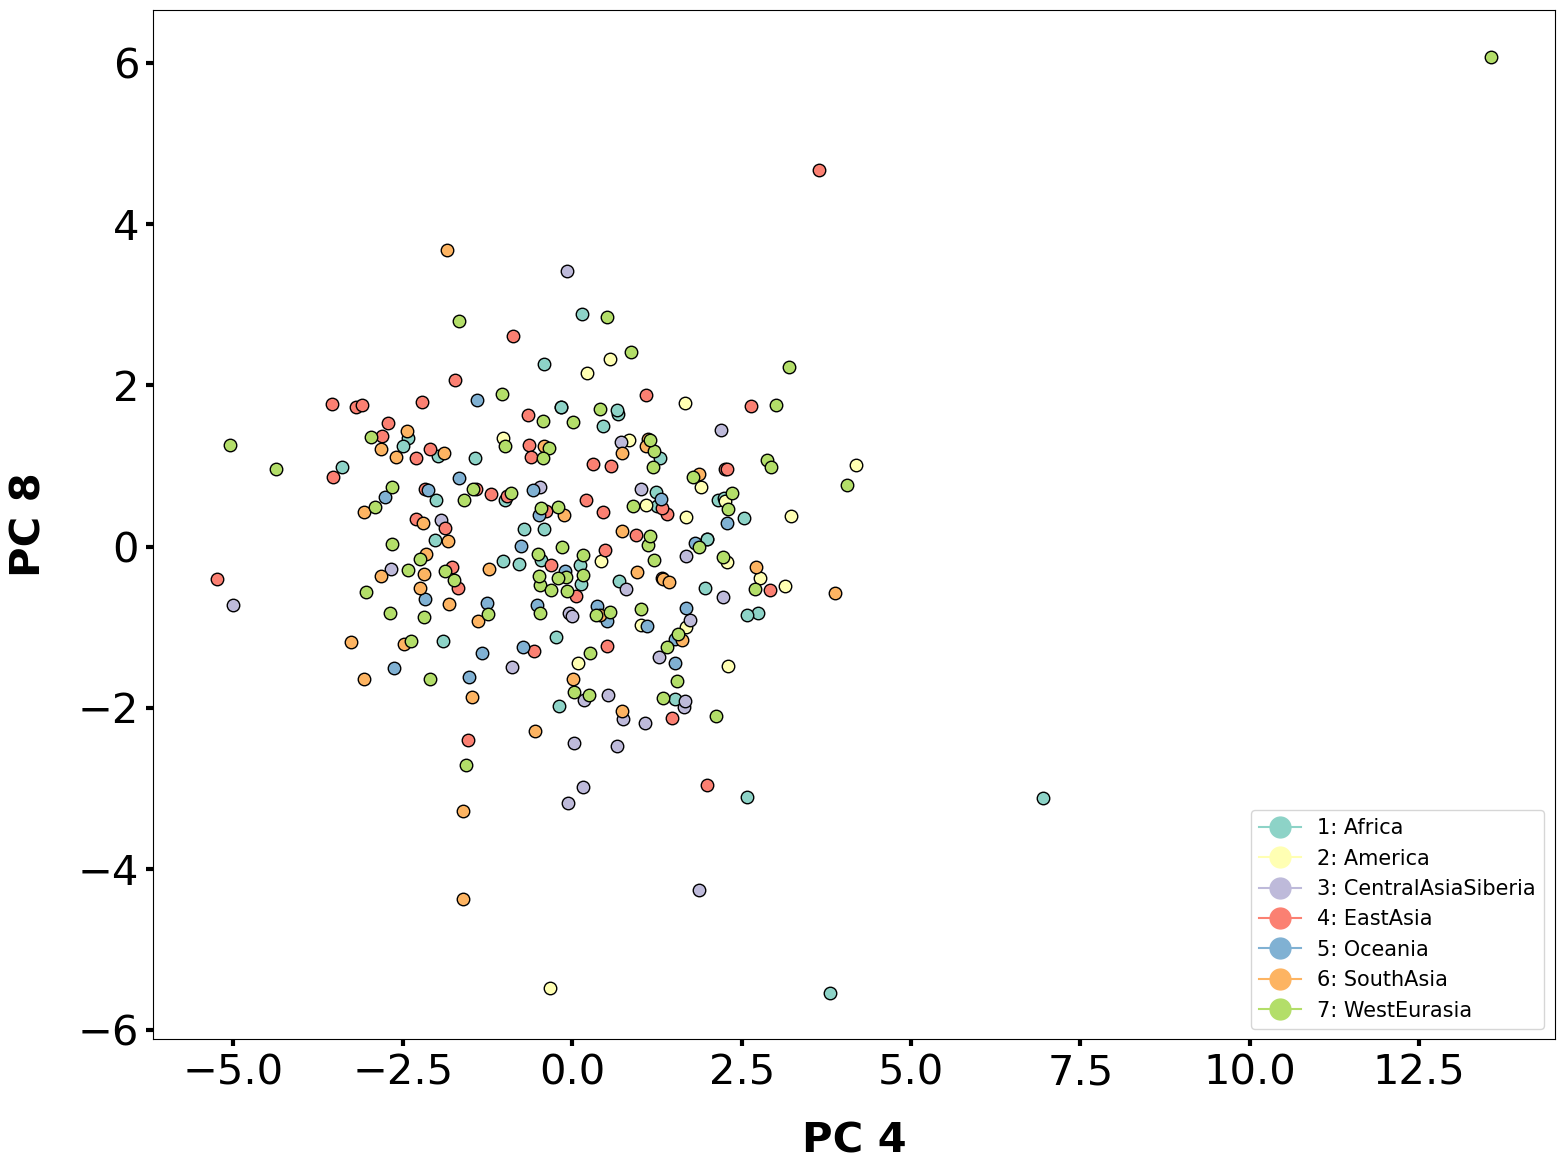

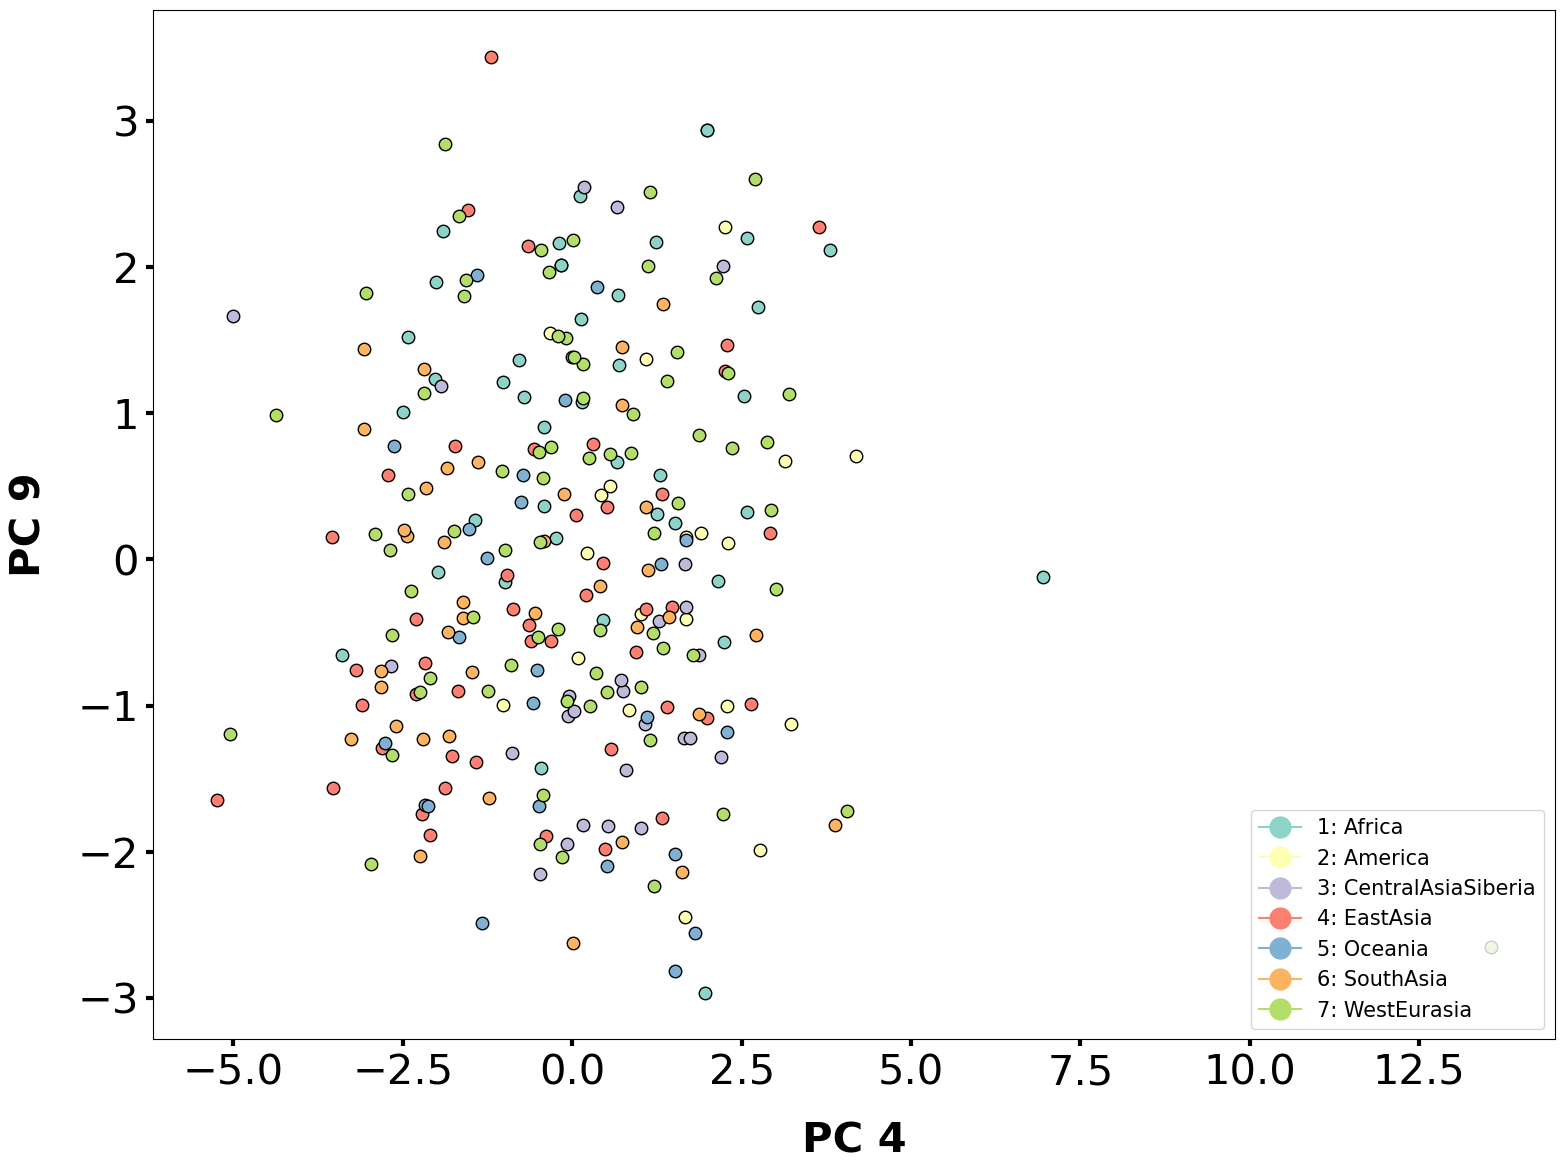

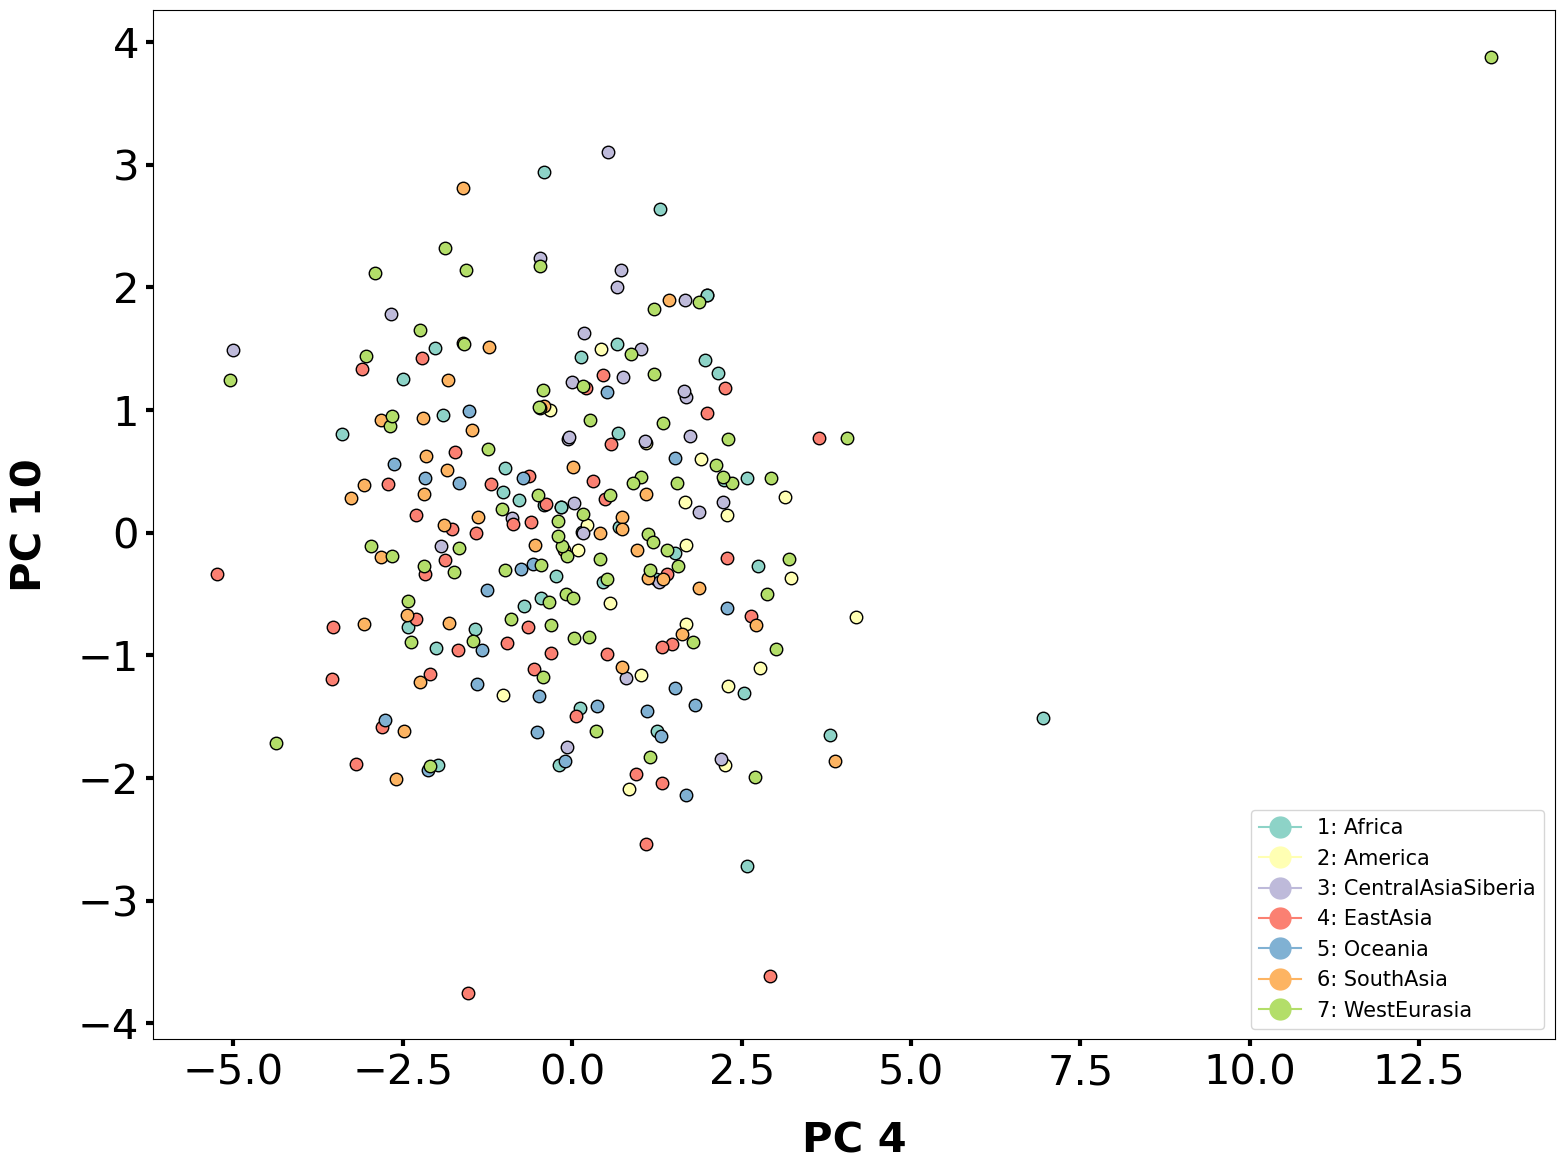

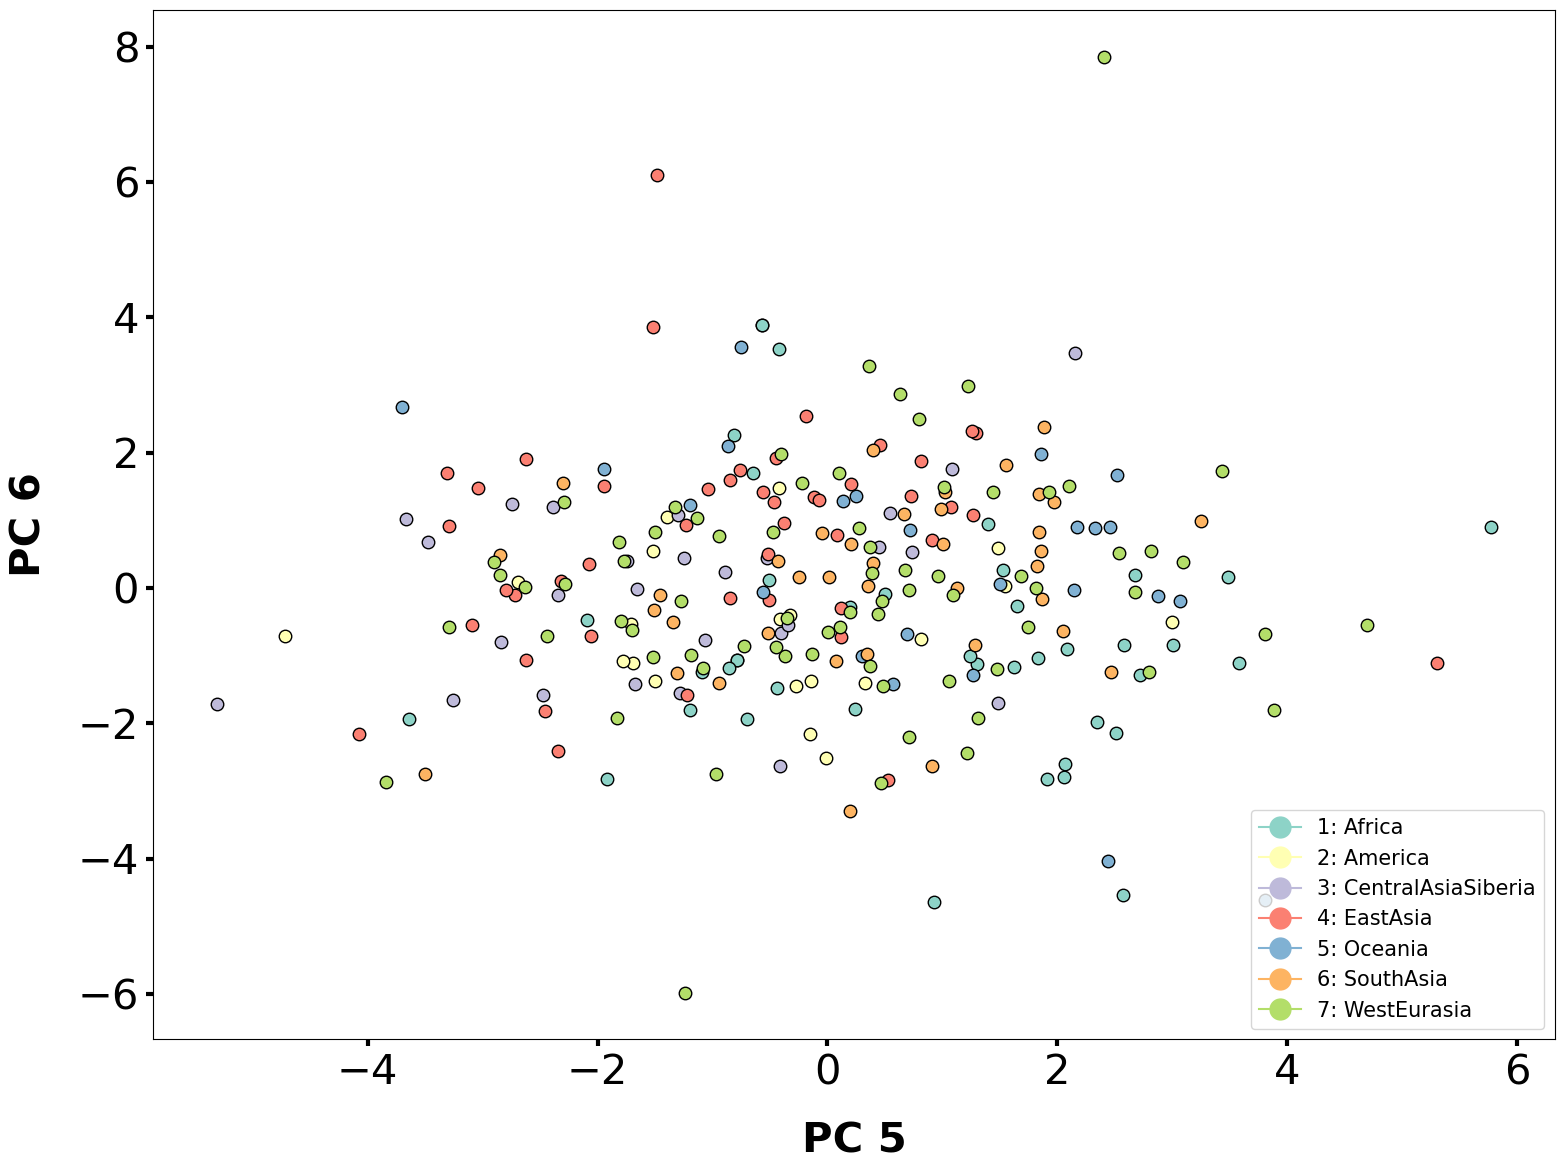

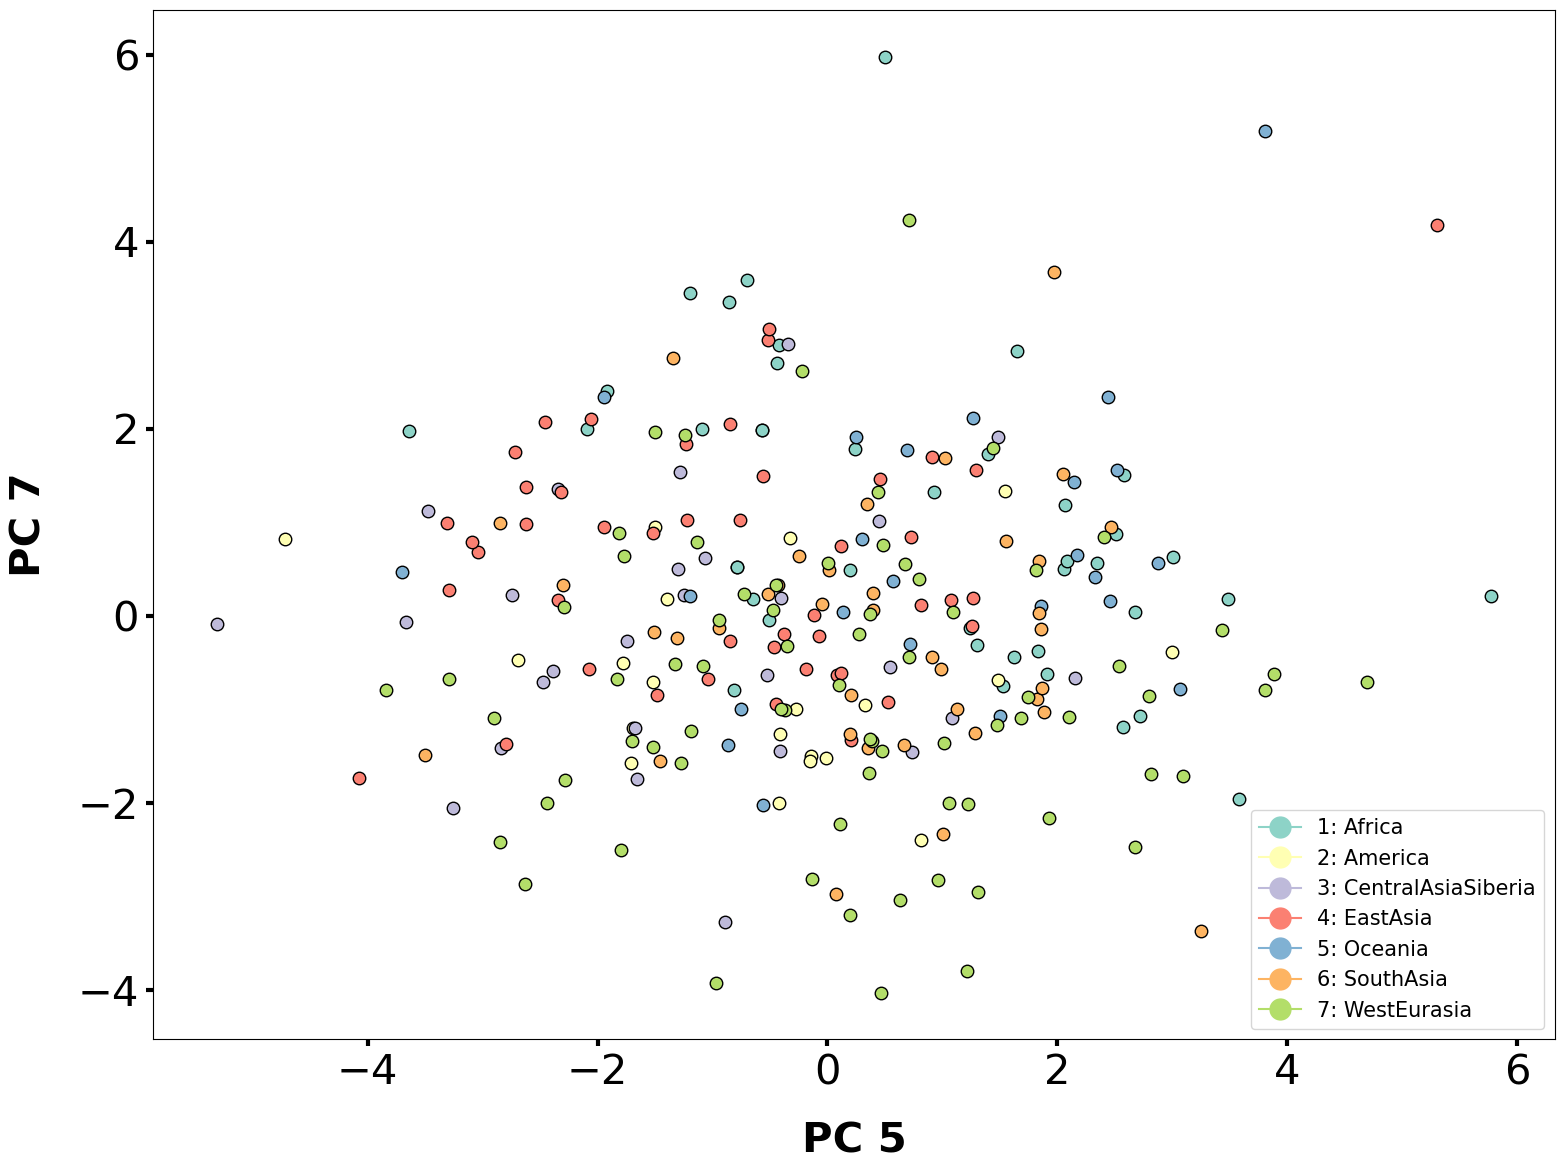

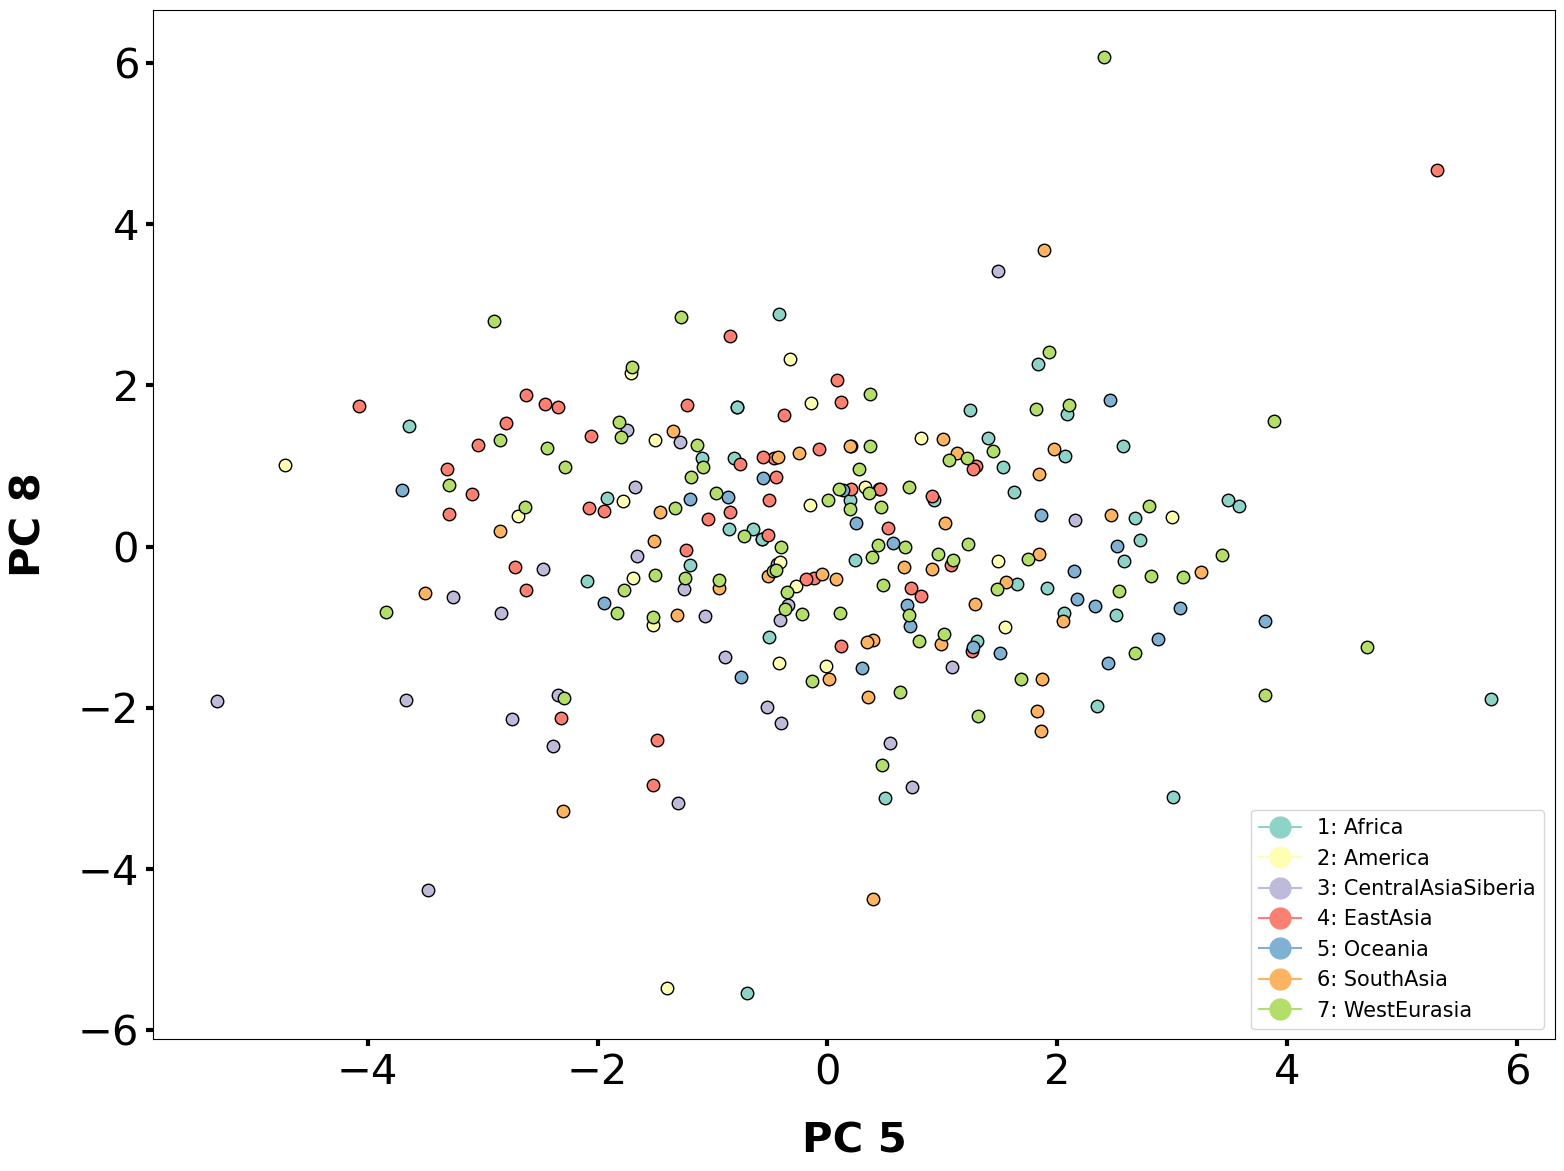

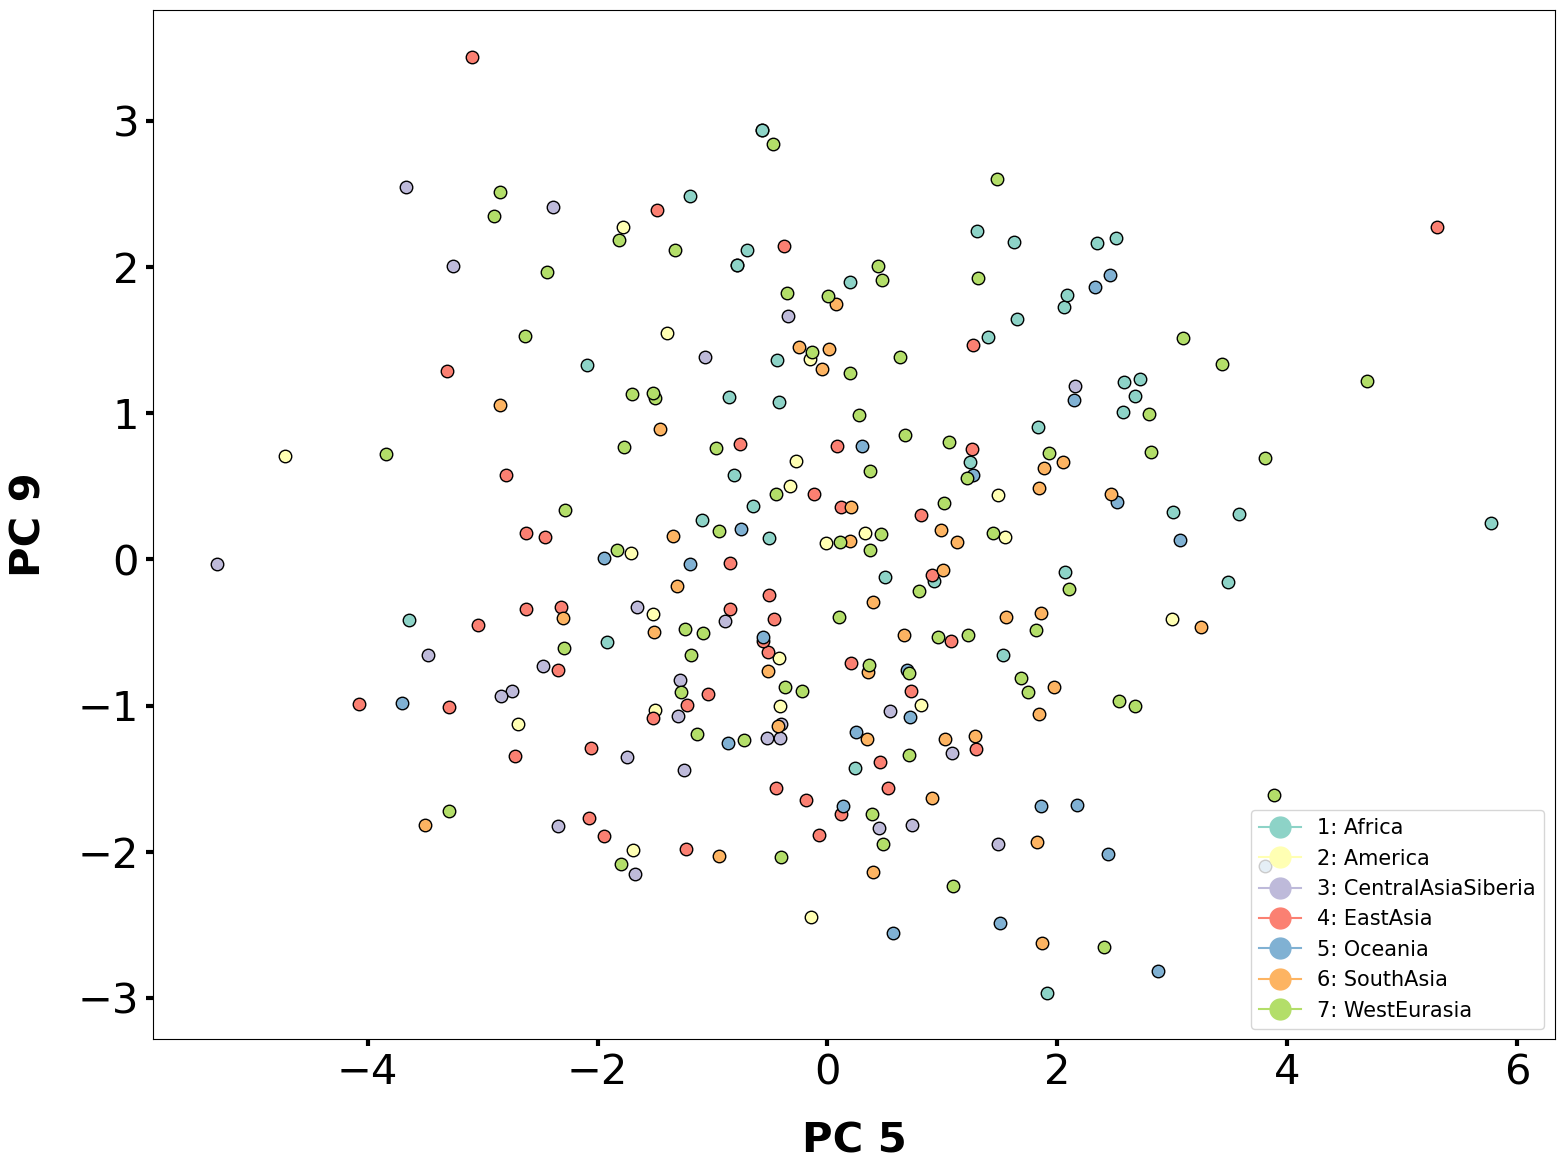

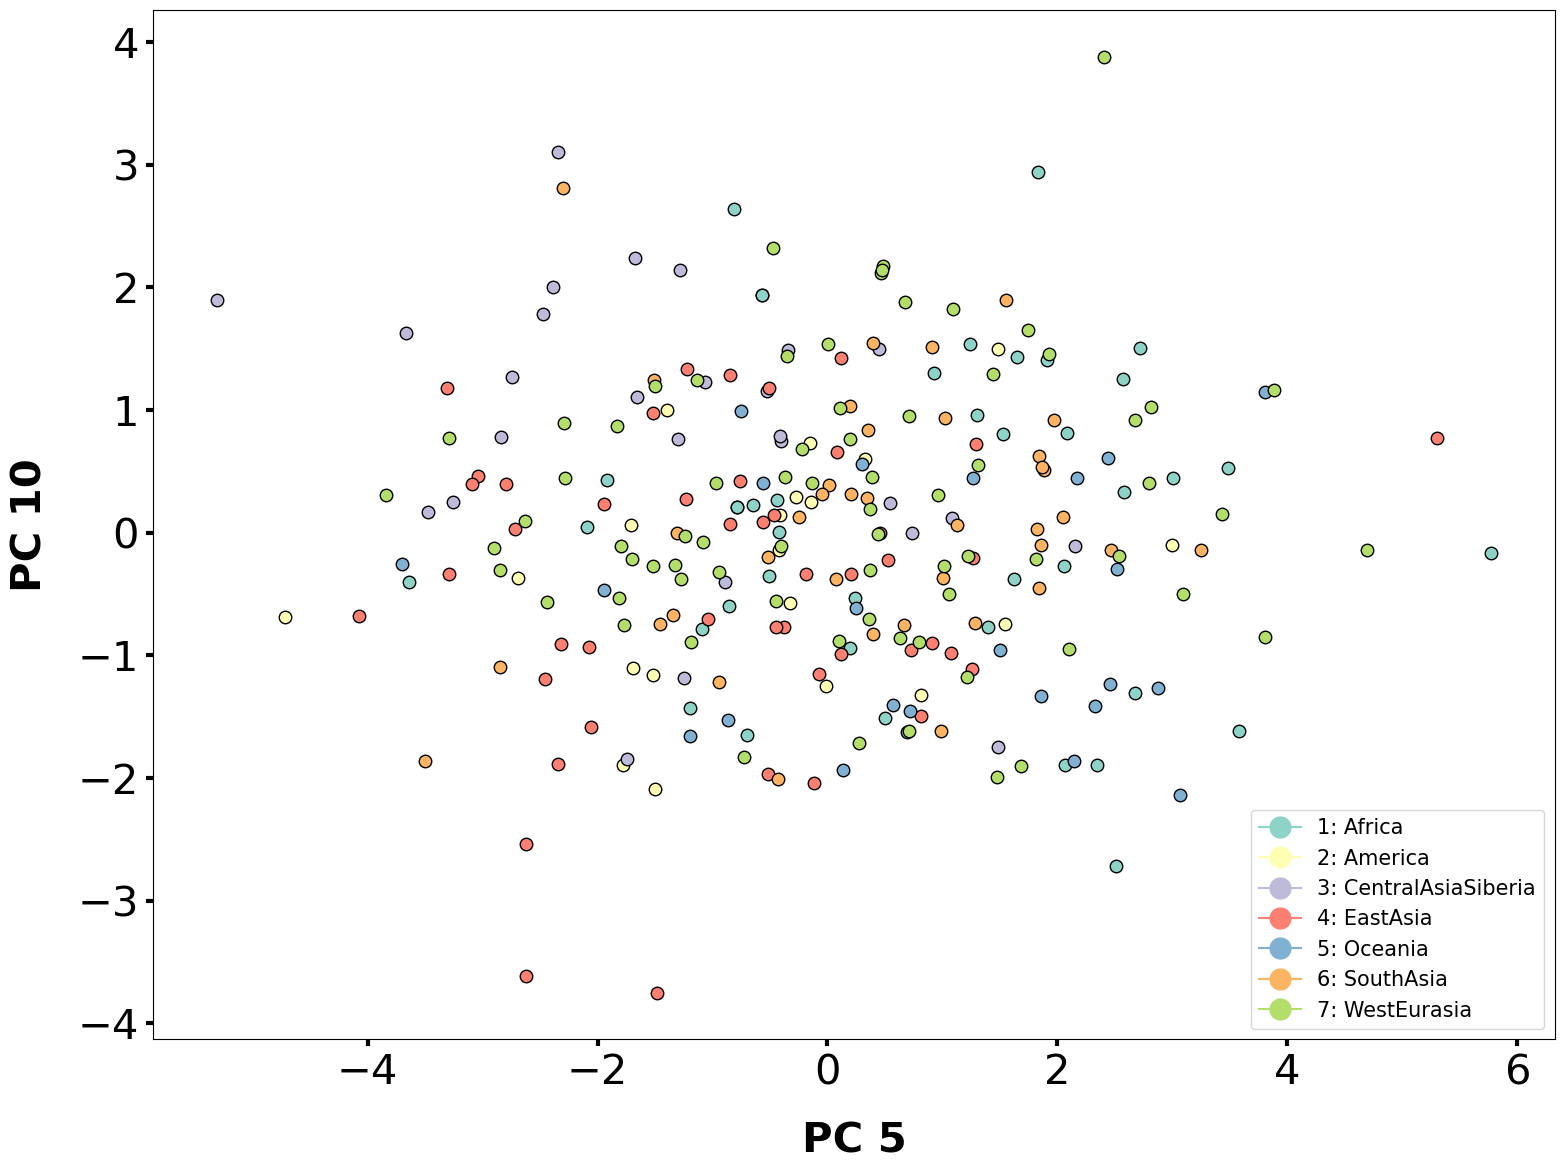

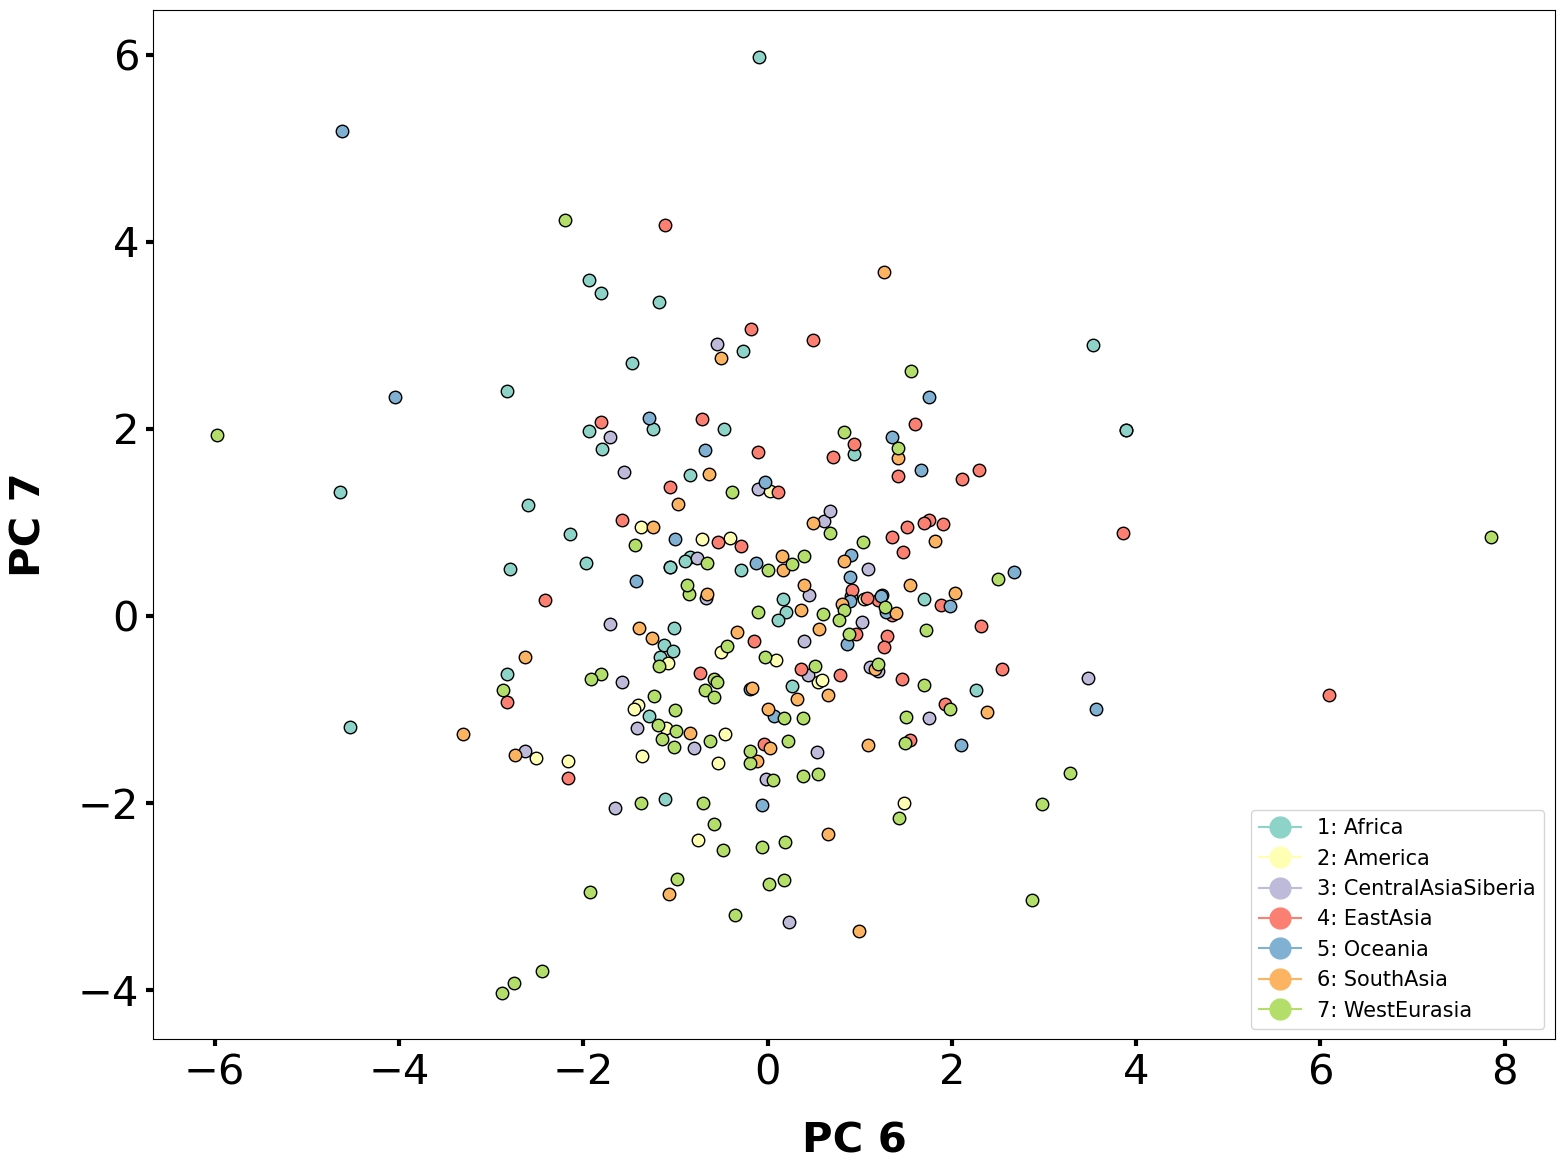

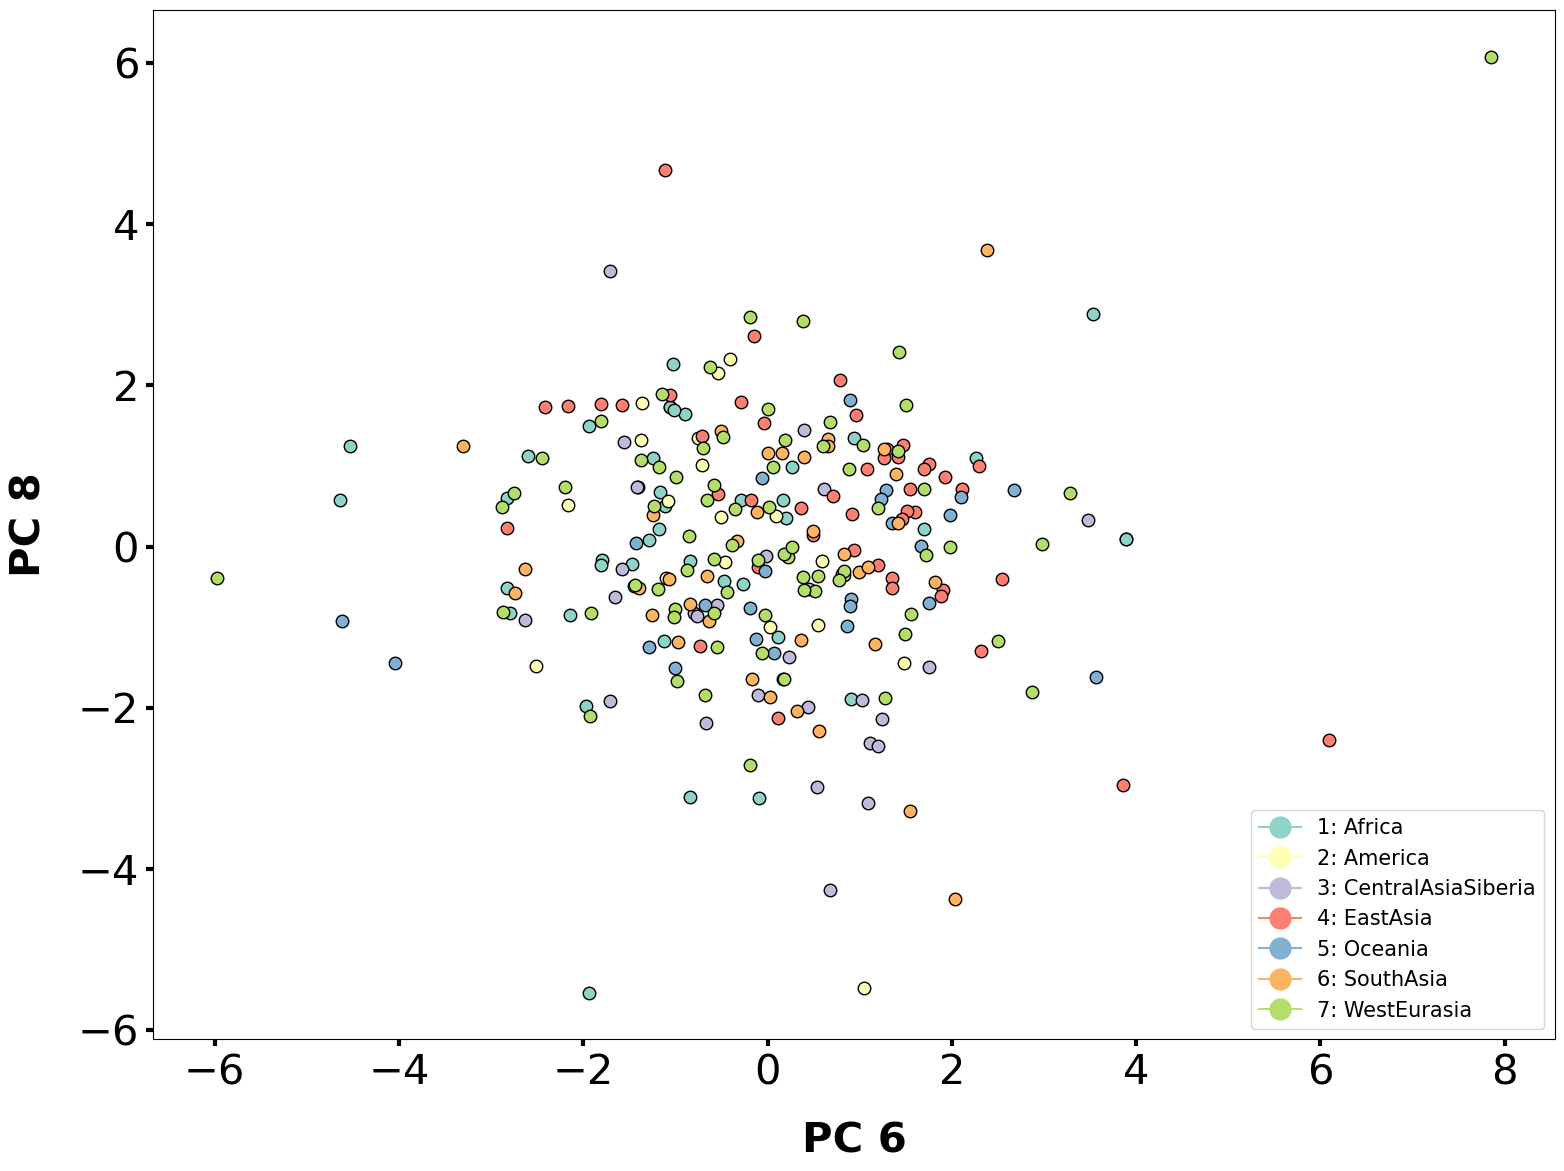

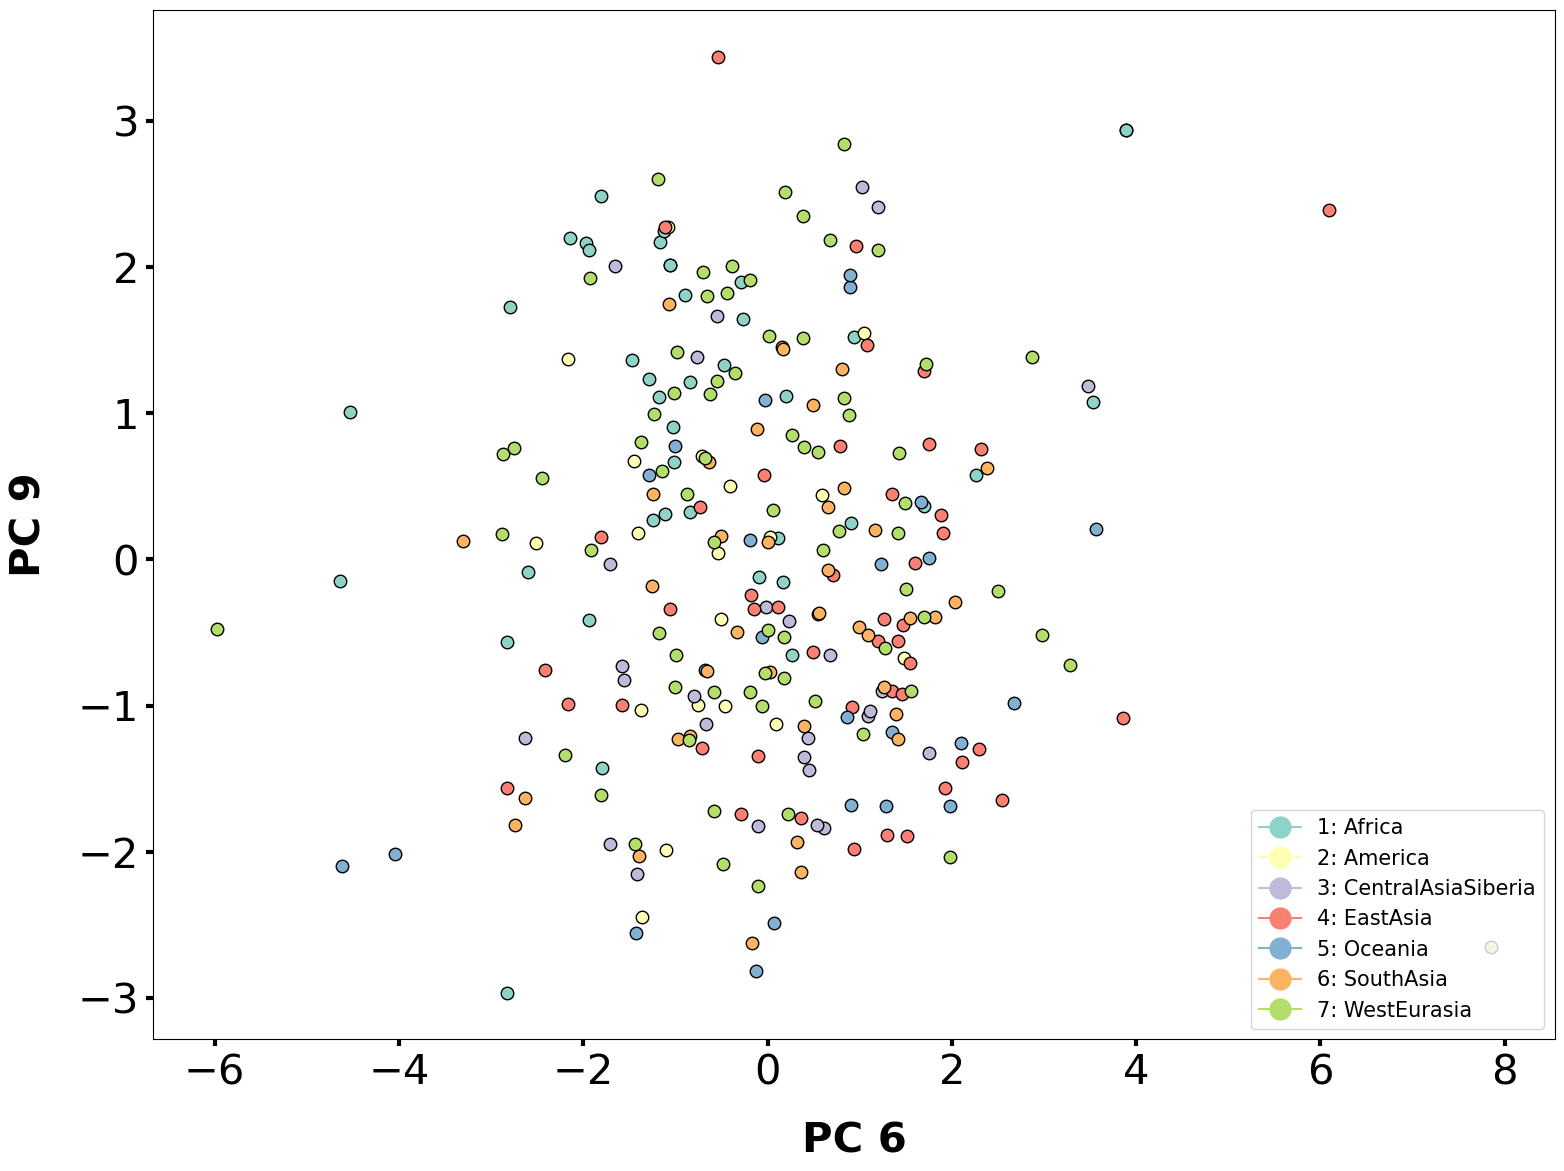

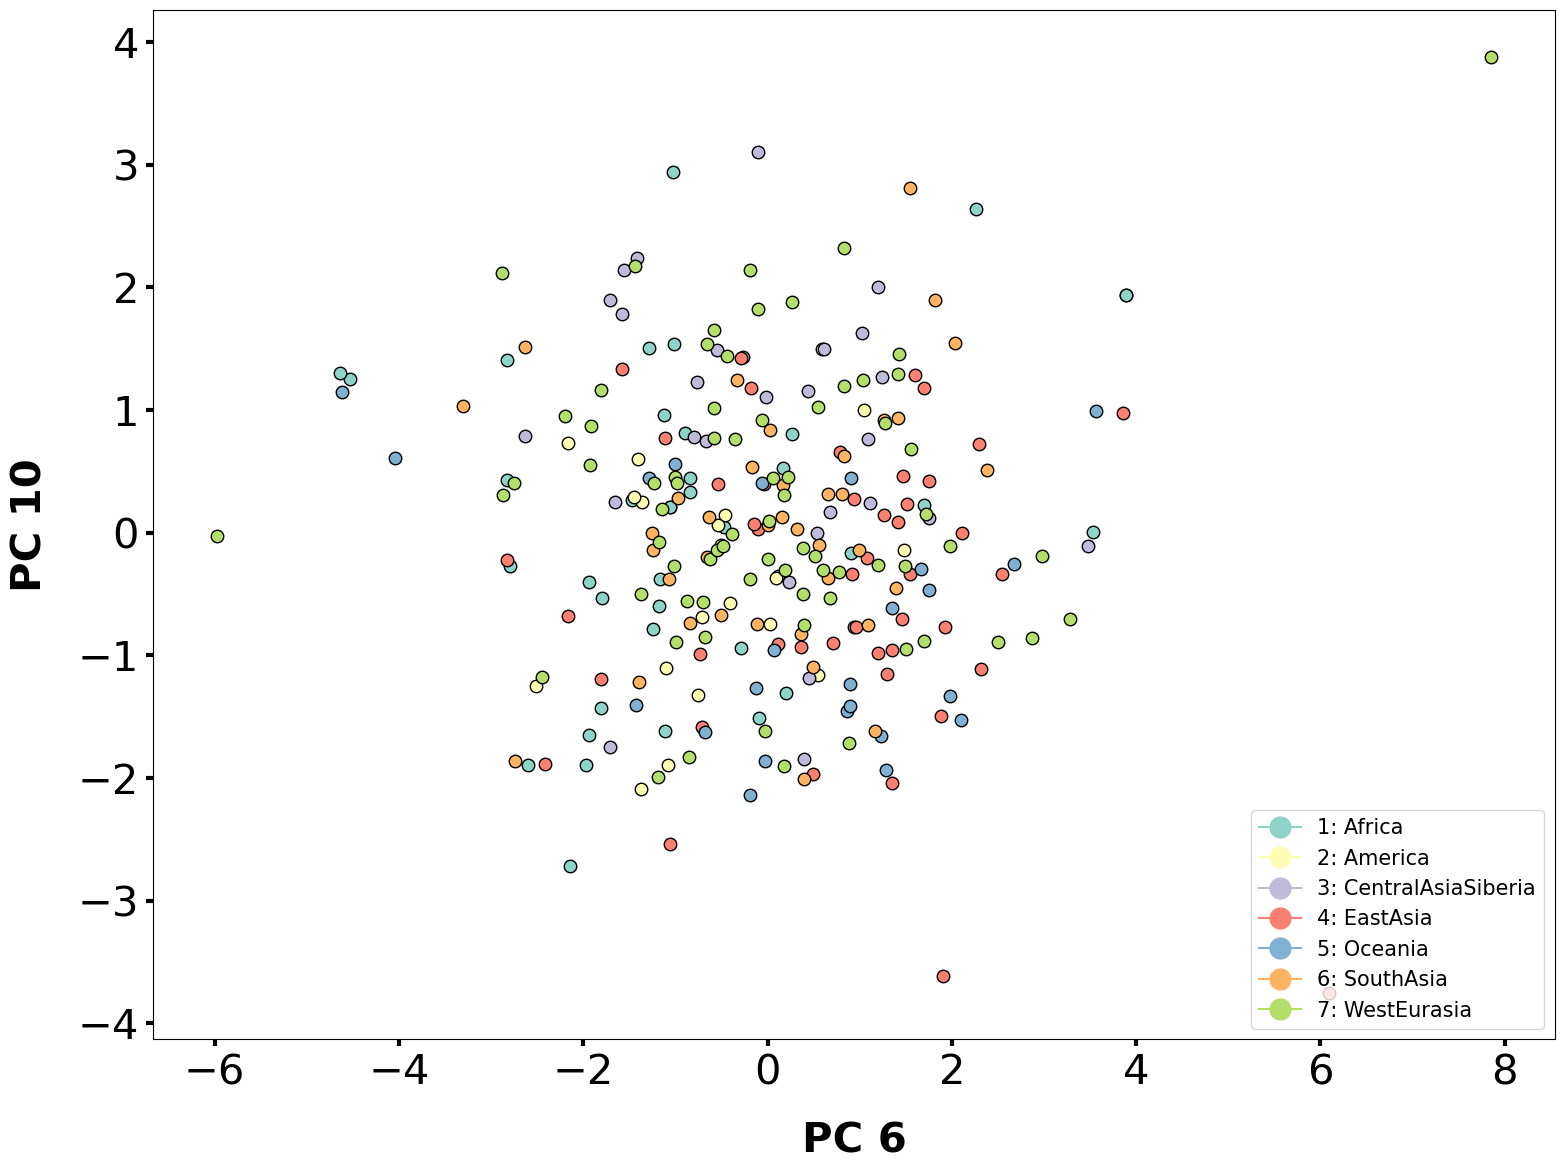

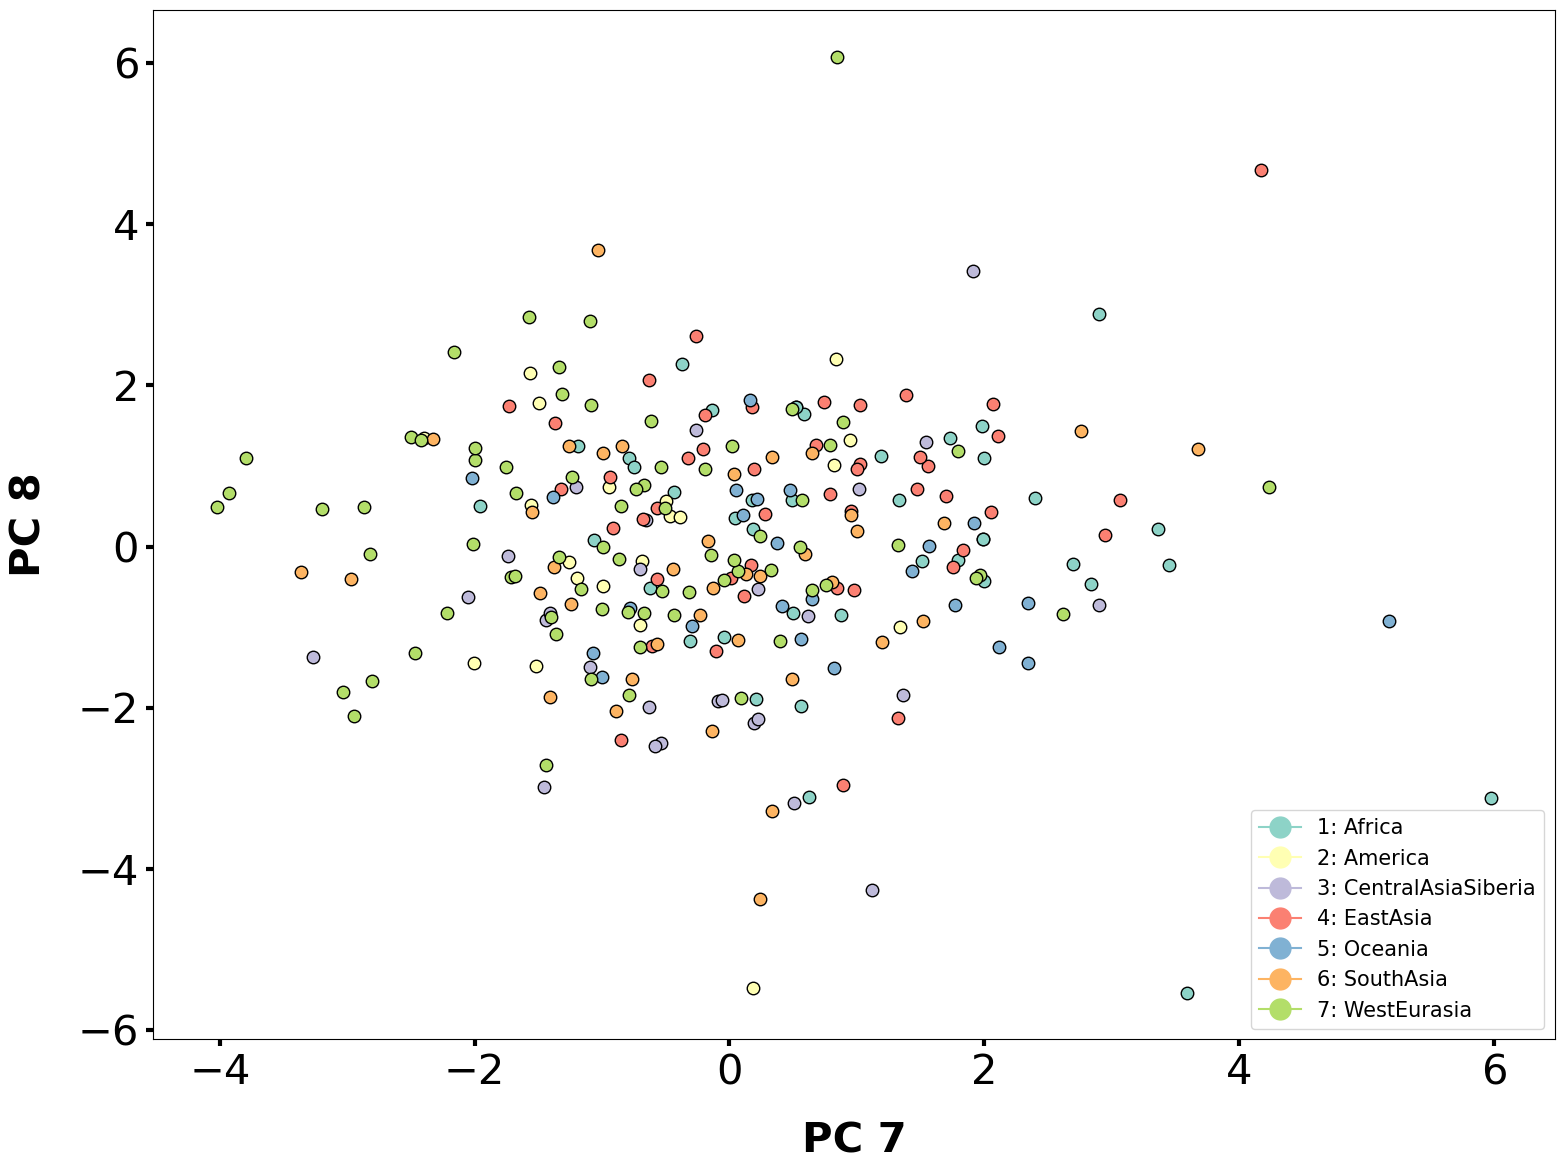

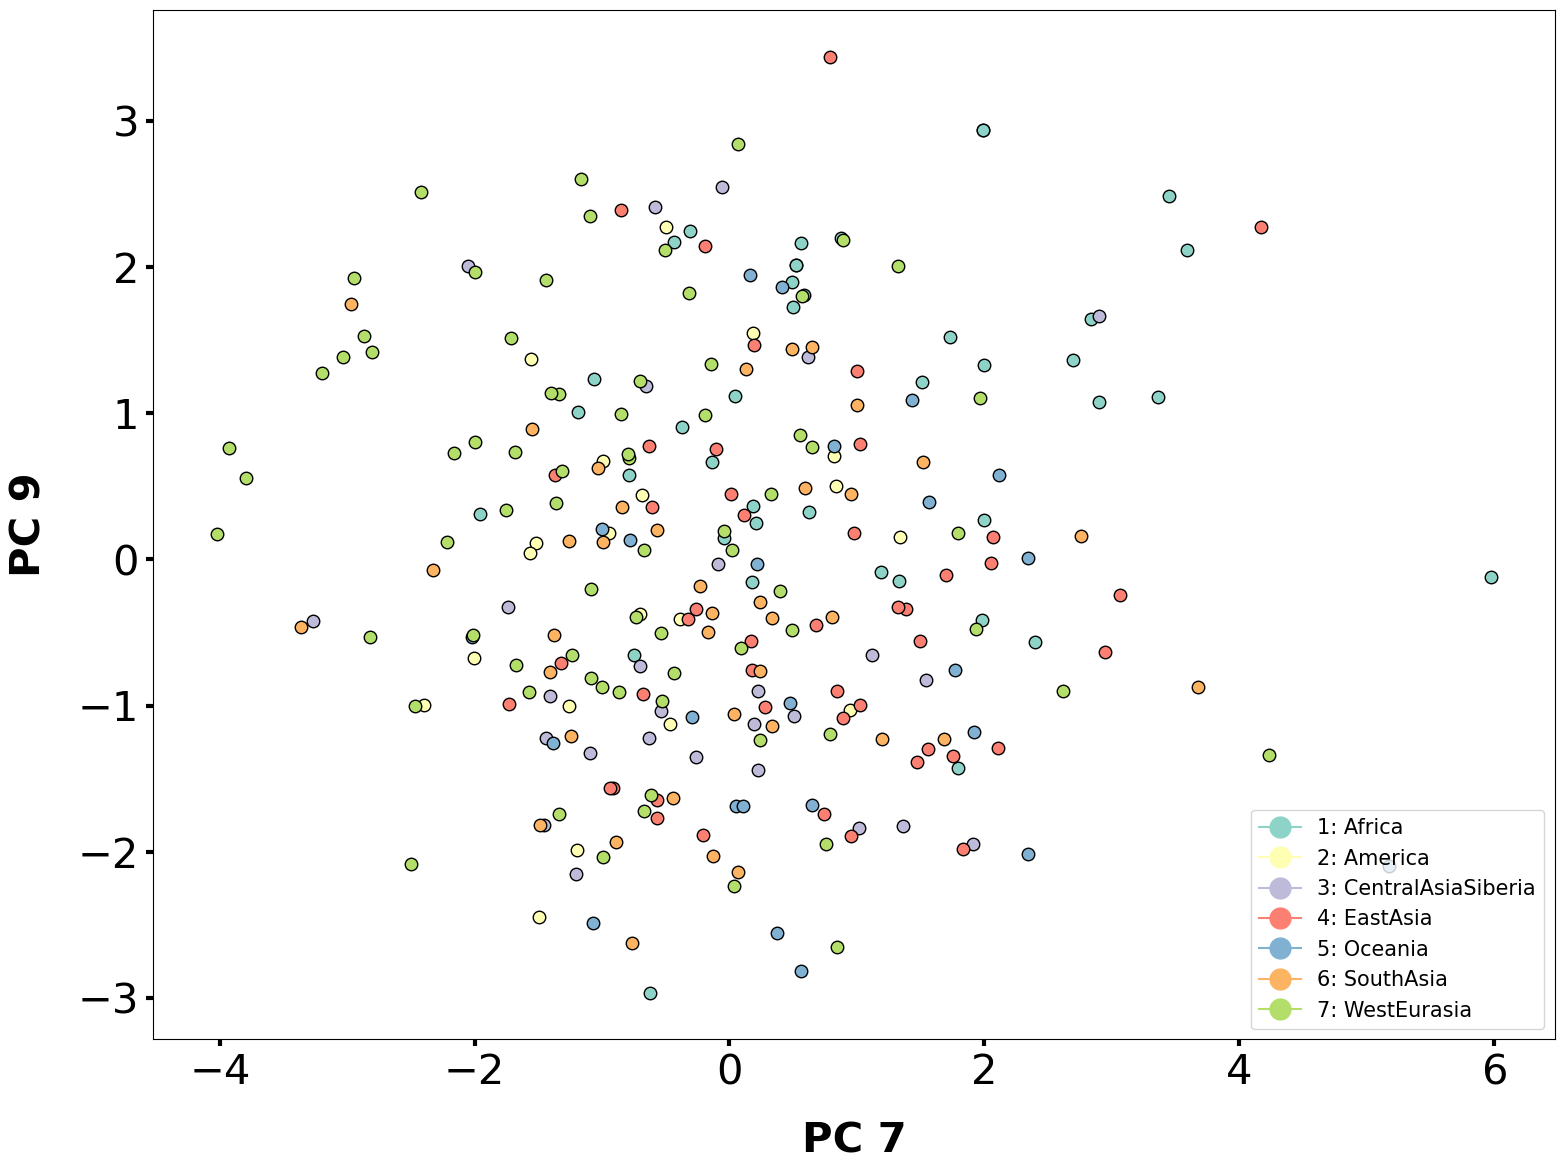

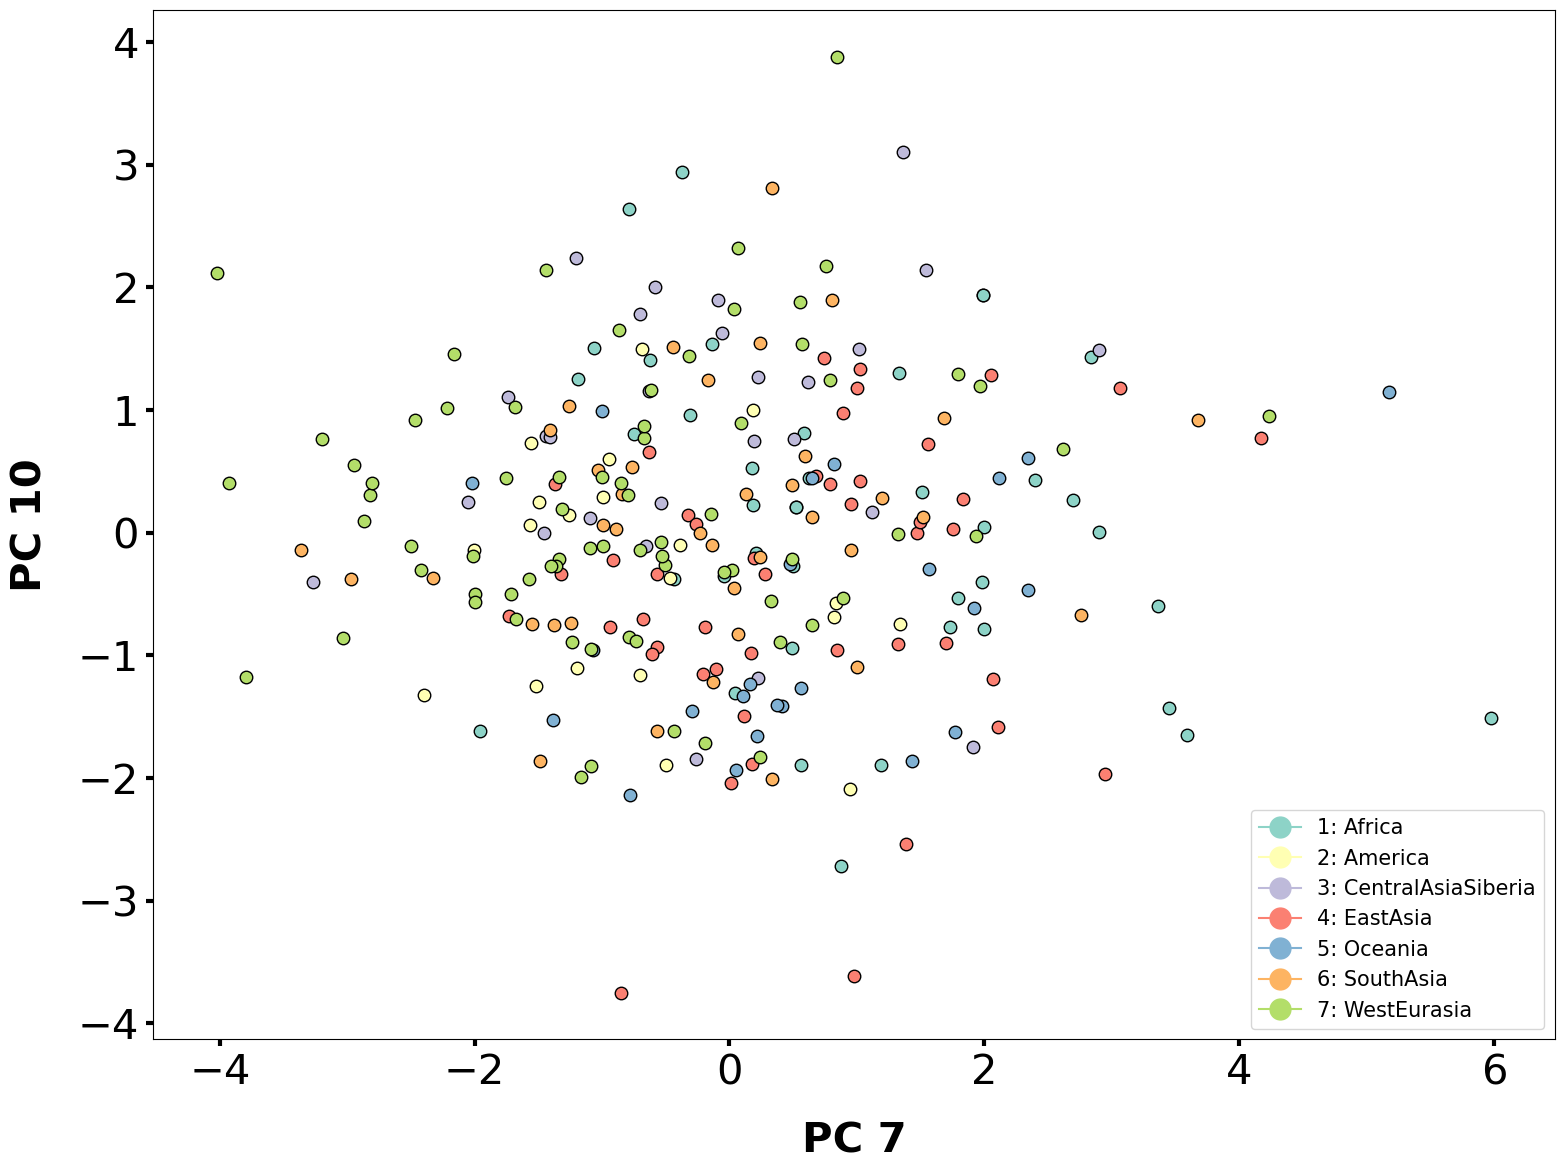

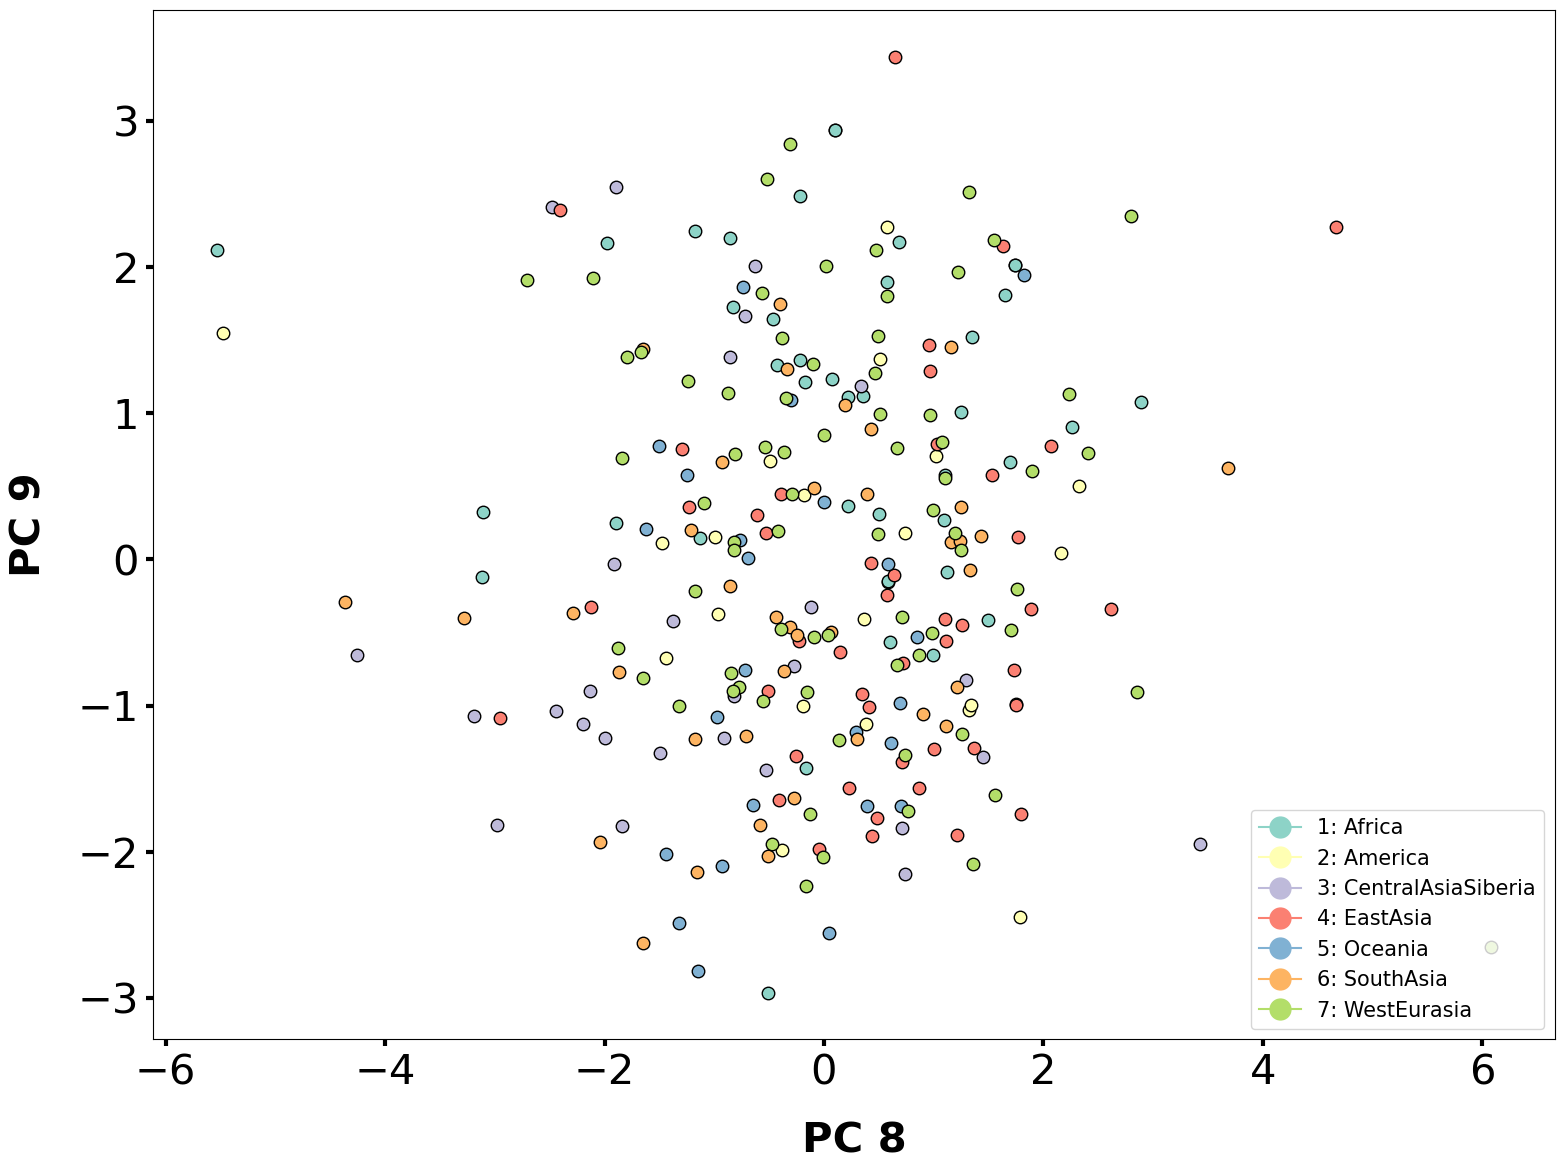

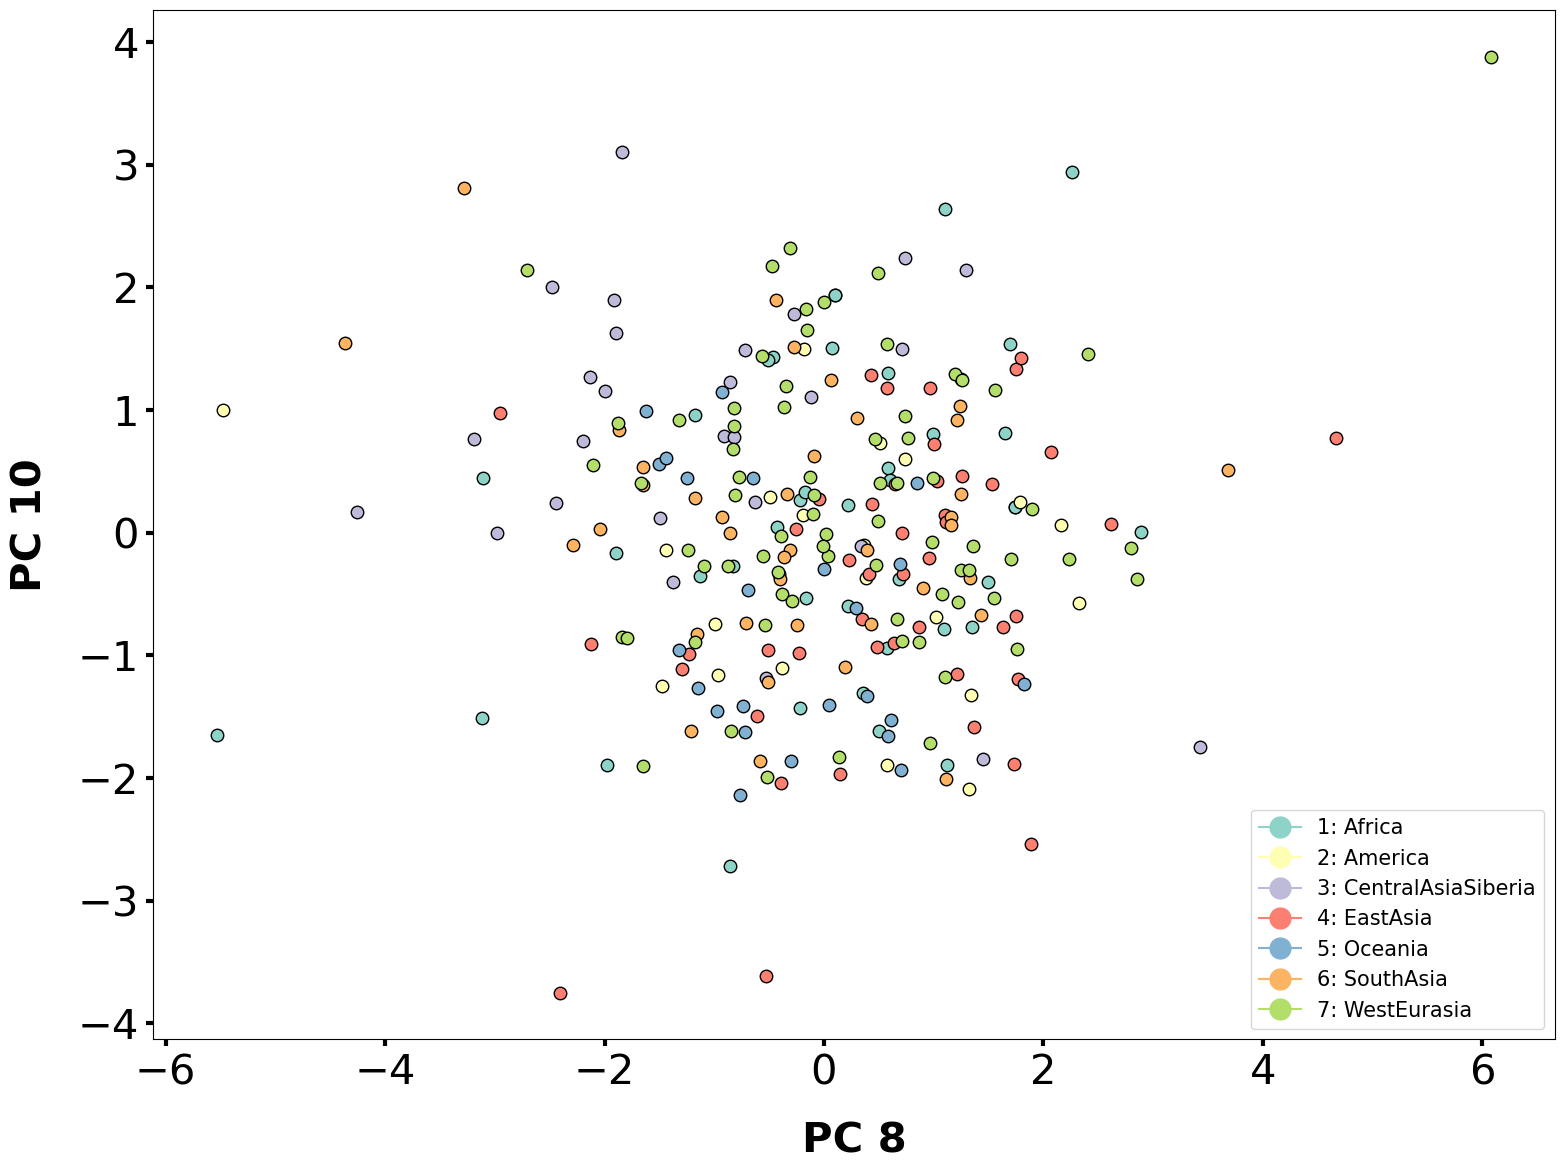

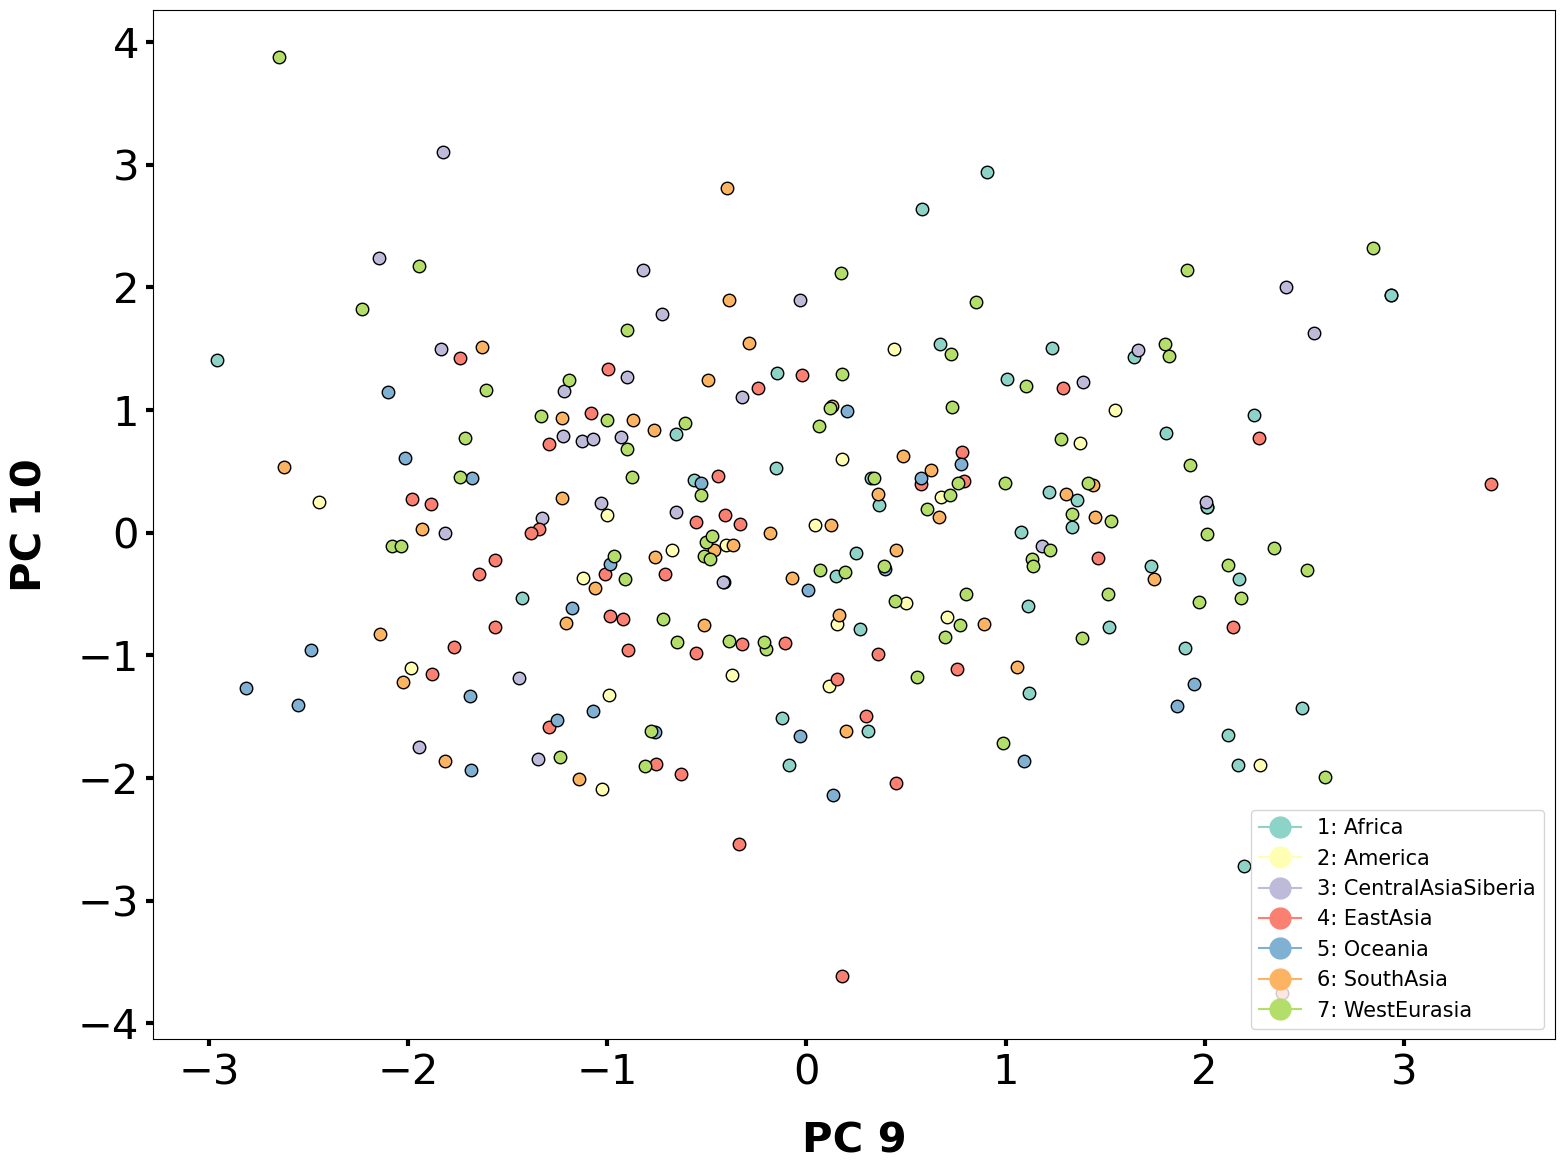

In [64]:
components = [1,2,3,4,5,6,7,8,9,10]

combinations_components = list(combinations(components,2))
for i in combinations_components:
    plot_scatter_cluster(data=df_pca, abscissa='component_'+str(i[0]), ordinate='component_'+str(i[1]), label_horizontal='PC '+ str(i[0]), label_vertical='PC '+str(i[1]), factor='Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    #print(str(i[0]))
#    plot_scatter_cluster(data=df_pca, abscissa='component_8', ordinate='component_9', label_horizontal='Component 1', label_vertical='Component 3', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    